In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline



## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical
import os
import random
import sys



## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ioann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import glob
ravdess_clean_list = glob.glob('clean/Users/ioann/radvess-XYMA/*.wav')

In [3]:
def build_ravdess_index(file_list):
    
    emotion_key = {'01': 'p', '02': 'p', '03': 'p', '04': 'n', '05': 'n', '06': 'n', '07': 'oth', '08': 'p'}
  
    df = { 'label': [] }
   

    for file in file_list:
        props = file.split('-')
        
        df['label'].append(emotion_key[props[3]])
        

        
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [4]:
emotion_list = build_ravdess_index(ravdess_clean_list)
label = pd.DataFrame(emotion_list)

In [5]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/radvess-XYMA/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [6]:
df = pd.DataFrame(df['feature'].values.tolist())
df


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-1.411359,-2.769772,-2.042008,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,0.788761,2.570493,2.558635,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,-1.133367,-2.019846,-1.024787,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,-0.299306,-0.004270,-1.408215,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.505697,0.424780,0.972097,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,4.583356,5.935799,4.206937,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-4.285201,-0.391933,-1.683185,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,1.513685,1.524577,2.985039,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,1.575394,2.135275,1.080048,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.434052,3.164500,5.605457,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855


In [7]:
def build_ravdess_gender(file_list):
    
   
    df = { 'gender': [] }
   

    for file in file_list:
        

        props = file.split('-')
        if int(props[7][:2]) % 2 == 0:
            df['gender'].append('F')
        else:
            df['gender'].append('M')

       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties


In [8]:
gender_list=build_ravdess_gender(ravdess_clean_list)
gender = pd.DataFrame(gender_list)

In [9]:
def build_ravdess_onesub(file_list):
    
   
    df = { 'session': [] }
   

    for file in file_list:
        

        props = file.split('-')
        df['session'].append(props[7])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [10]:
actor_list=build_ravdess_onesub(ravdess_clean_list)
session = pd.DataFrame(actor_list)

In [11]:
#to ravdess
newdf = pd.concat([df,label,gender,session], axis=1)

rnewdf = newdf.rename(index=str, columns={"0": "label"})
no_ravdess=rnewdf.fillna(0)
no_ravdess

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,p,M,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,p,F,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,p,M,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,p,F,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,p,M,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,p,F,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,p,M,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,p,F,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,p,M,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,p,F,10.wav


In [12]:
import re
file_path =  '/Users/ioann/iemocap/IEMOCAP_full_release/Session1/dialog/EmoEvaluation/Ses01F_impro01.txt'
useful_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)
with open(file_path) as f:
    file_content = f.read()
    
info_lines = re.findall(useful_regex, file_content)

In [13]:
import os


info_line = re.compile(r'\[.+\]\n', re.IGNORECASE)

start_times, end_times, wav_file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []

for sess in range(1, 6):
    emo_evaluation_dir = '/Users/ioann/iemocap/IEMOCAP_full_release/Session{}/dialog/EmoEvaluation/'.format(sess)
    evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
    for file in evaluation_files:
        with open(emo_evaluation_dir + file) as f:
            content = f.read()
        info_lines = re.findall(info_line, content)
        for line in info_lines[1:]:  # the first line is a header
            start_end_time, wav_file_name, emotion, val_act_dom = line.strip().split('\t')
            start_time, end_time = start_end_time[1:-1].split('-')
            val, act, dom = val_act_dom[1:-1].split(',')
            val, act, dom = float(val), float(act), float(dom)
            start_time, end_time = float(start_time), float(end_time)
            start_times.append(start_time)
            end_times.append(end_time)
            wav_file_names.append(wav_file_name)
            emotions.append(emotion)
            vals.append(val)
            acts.append(act)
            doms.append(dom)

In [14]:
import pandas as pd

df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'wav_file', 'emotion', 'val', 'act', 'dom'])

df_iemocap['start_time'] = start_times
df_iemocap['end_time'] = end_times
df_iemocap['wav_file'] = wav_file_names
df_iemocap['emotion'] = emotions
df_iemocap['val'] = vals
df_iemocap['act'] = acts
df_iemocap['dom'] = doms

df_iemocap.tail()

,start_time,end_time,wav_file,emotion,val,act,dom
10034,236.57,244.83,Ses05M_script03_2_M041,ang,1.0,4.5,5.0
10035,244.84,246.58,Ses05M_script03_2_M042,ang,1.0,4.5,4.5
10036,246.59,248.83,Ses05M_script03_2_M043,ang,1.5,4.0,4.5
10037,255.86,260.33,Ses05M_script03_2_M044,ang,1.0,5.0,5.0
10038,260.34,266.35,Ses05M_script03_2_M045,ang,1.0,5.0,5.0


In [15]:
import pandas as pd
import math

labels_df = pd.read_csv('/Users/ioann/df_iemocap.csv')
iemocap_dir = '/Users/ioann/iemocap/IEMOCAP_full_release/'

In [16]:
#build audio vectors
sr = 44100
audio_vectors = {}
for sess in (range(1, 3)): 
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('/Users/ioann/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

 26%|██▌       | 8/31 [01:07<03:07,  8.15s/it]

An exception occured for Ses02F_script01_1.pk


100%|██████████| 31/31 [04:56<00:00, 11.85s/it]


In [17]:
#build audio vectors
sr = 44100
audio_vectors = {}
for sess in (range(3, 5)):  # using one session due to memory constraint, can replace [5] with range(1, 6)
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('/Users/ioann/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

100%|██████████| 30/30 [05:57<00:00, 12.21s/it]


In [18]:
#build audio vectors
sr = 44100
audio_vectors = {}
for sess in [5]:  # using one session due to memory constraint, can replace [5] with range(1, 6)
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('/Users/ioann/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

100%|██████████| 31/31 [06:06<00:00, 12.73s/it]


In [19]:
columns = ['wav_file', 'label', 'feature_mfccs']
df_features = pd.DataFrame(columns=columns)

In [20]:
emotion_dict ={'ang': 'n',
                'hap': 'p',
                'exc': 'p',
                'sad': 'n',
                'fru': 'n',
                'fea': 'n',
                'sur': 'p',
                'neu': 'p',
                'xxx': 'oth',
                'oth': 'oth'}

  

data_dir = '/Users/ioann/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [21]:
labels_df = pd.read_csv(labels_path)

for sess in (range(1, 6)):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):           
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]

                feature_list = [wav_file_name, label]  # wav_file, label
                
               # mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
                mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0) 

               
                #feature_list.append(np.mean(mfccs))  # rmse_mean
                feature_list.append(mfccs)
               

                

               
                
                df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
            except:
                print('Some exception occured')


767it [00:25, 24.49it/s]

Some exception occured


1819it [00:59, 30.76it/s]
1811it [01:02, 35.36it/s]
1222it [00:40, 29.32it/s]

Some exception occured


2136it [01:11, 29.94it/s]
2103it [01:13, 28.73it/s]
2170it [01:14, 29.16it/s]


In [22]:
new

NameError: name 'new' is not defined

In [23]:
df3 = pd.DataFrame(df_features['feature_mfccs'].values.tolist())
df3
new=df_features.drop('feature_mfccs', 1)
new

,wav_file,label
0,Ses01F_impro01_F000,p
1,Ses01F_impro01_F001,p
2,Ses01F_impro01_F002,p
3,Ses01F_impro01_F003,oth
4,Ses01F_impro01_F004,oth
5,Ses01F_impro01_F005,p
6,Ses01F_impro01_F006,n
7,Ses01F_impro01_F007,n
8,Ses01F_impro01_F008,n
9,Ses01F_impro01_F009,n


In [24]:
iemocap = pd.concat([df3, new], axis=1)
iemocap

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,wav_file,label
0,-509.126997,181.965860,-48.599549,31.576114,32.012172,-21.222346,18.036352,4.219425,-12.454106,13.210400,...,1.754320,1.556140,5.038047,2.334538,2.539351,5.077994,1.888022,0.402842,Ses01F_impro01_F000,p
1,-516.757101,166.037926,-13.698110,7.455778,24.127481,-5.943733,8.448324,6.310700,-8.912027,6.515647,...,-0.599042,-1.689963,-0.042121,2.508860,2.382482,2.270472,0.708341,-1.324735,Ses01F_impro01_F001,p
2,-535.808389,197.637881,-35.971572,16.028582,27.252961,-17.289227,12.078187,6.596235,-9.104317,9.304528,...,0.227568,-0.231600,2.007883,1.608188,2.511622,3.101419,-0.276906,-1.303641,Ses01F_impro01_F002,p
3,-499.505437,173.583604,-26.196286,18.929305,35.394134,-10.336557,5.948212,3.568846,-12.046869,7.196558,...,2.905106,0.806051,1.458800,3.587927,3.186033,1.861609,-0.167564,-0.764474,Ses01F_impro01_F003,oth
4,-430.813999,159.862295,-15.155569,11.889576,36.357437,1.025977,0.410147,-2.455916,-13.638808,-3.154461,...,3.201370,1.396090,0.352647,0.841803,2.117443,2.855314,1.949633,1.237270,Ses01F_impro01_F004,oth
5,-386.503557,153.880057,-8.654504,11.462919,17.005921,-13.288454,3.486613,2.020962,-12.496160,-4.236066,...,2.594824,1.138751,2.050575,1.679837,1.086065,1.729483,1.243465,1.516248,Ses01F_impro01_F005,p
6,-338.679136,167.576578,-23.725968,-4.789725,25.580598,-6.741570,-4.581353,2.351062,-8.508468,-5.835905,...,2.349536,0.781537,2.358782,3.684598,3.777222,3.235100,1.707252,1.858535,Ses01F_impro01_F006,n
7,-411.708022,166.322311,-27.537525,5.647182,26.333488,-7.406942,5.228053,0.618157,-13.344606,0.691763,...,-0.252111,-0.830246,0.461917,0.633769,0.435840,0.628173,0.029110,-0.212034,Ses01F_impro01_F007,n
8,-364.805749,181.675440,-37.499601,5.804351,33.771206,-14.981616,-6.293604,2.465651,-8.561474,-1.129350,...,-1.965341,-3.290352,-0.378126,0.940950,1.865115,1.188642,-0.756106,0.850033,Ses01F_impro01_F008,n
9,-438.489636,160.395622,-24.566140,4.215405,23.486020,-8.647269,5.627794,4.042671,-10.475144,3.386079,...,-0.066850,-0.594847,0.921930,2.700348,3.346706,1.956133,0.429507,1.637339,Ses01F_impro01_F009,n


In [25]:
df3

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-509.126997,181.965860,-48.599549,31.576114,32.012172,-21.222346,18.036352,4.219425,-12.454106,13.210400,...,-1.538607,2.361050,1.754320,1.556140,5.038047,2.334538,2.539351,5.077994,1.888022,0.402842
1,-516.757101,166.037926,-13.698110,7.455778,24.127481,-5.943733,8.448324,6.310700,-8.912027,6.515647,...,-0.200320,-0.469727,-0.599042,-1.689963,-0.042121,2.508860,2.382482,2.270472,0.708341,-1.324735
2,-535.808389,197.637881,-35.971572,16.028582,27.252961,-17.289227,12.078187,6.596235,-9.104317,9.304528,...,-0.805395,1.045605,0.227568,-0.231600,2.007883,1.608188,2.511622,3.101419,-0.276906,-1.303641
3,-499.505437,173.583604,-26.196286,18.929305,35.394134,-10.336557,5.948212,3.568846,-12.046869,7.196558,...,-2.648540,0.256012,2.905106,0.806051,1.458800,3.587927,3.186033,1.861609,-0.167564,-0.764474
4,-430.813999,159.862295,-15.155569,11.889576,36.357437,1.025977,0.410147,-2.455916,-13.638808,-3.154461,...,-0.761237,1.874628,3.201370,1.396090,0.352647,0.841803,2.117443,2.855314,1.949633,1.237270
5,-386.503557,153.880057,-8.654504,11.462919,17.005921,-13.288454,3.486613,2.020962,-12.496160,-4.236066,...,-3.797975,1.039531,2.594824,1.138751,2.050575,1.679837,1.086065,1.729483,1.243465,1.516248
6,-338.679136,167.576578,-23.725968,-4.789725,25.580598,-6.741570,-4.581353,2.351062,-8.508468,-5.835905,...,-1.393701,2.189362,2.349536,0.781537,2.358782,3.684598,3.777222,3.235100,1.707252,1.858535
7,-411.708022,166.322311,-27.537525,5.647182,26.333488,-7.406942,5.228053,0.618157,-13.344606,0.691763,...,-1.476885,0.076237,-0.252111,-0.830246,0.461917,0.633769,0.435840,0.628173,0.029110,-0.212034
8,-364.805749,181.675440,-37.499601,5.804351,33.771206,-14.981616,-6.293604,2.465651,-8.561474,-1.129350,...,-1.283447,0.418868,-1.965341,-3.290352,-0.378126,0.940950,1.865115,1.188642,-0.756106,0.850033
9,-438.489636,160.395622,-24.566140,4.215405,23.486020,-8.647269,5.627794,4.042671,-10.475144,3.386079,...,-1.455696,-0.133780,-0.066850,-0.594847,0.921930,2.700348,3.346706,1.956133,0.429507,1.637339


In [26]:
def build_ravdess_onesub(file_list):
    
   
    df = { 'gender': [] }
   

    for file in file_list:
        

        props = file.split('_')
        df['gender'].append(props[-1][0])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [27]:
wav_list=iemocap['wav_file'].values.tolist()
actor_list=build_ravdess_onesub(wav_list)
gender= pd.DataFrame(actor_list)

In [28]:
new_df = pd.concat([iemocap,gender], axis=1)

iem=new_df.fillna(0)
iem

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,wav_file,label,gender
0,-509.126997,181.965860,-48.599549,31.576114,32.012172,-21.222346,18.036352,4.219425,-12.454106,13.210400,...,1.556140,5.038047,2.334538,2.539351,5.077994,1.888022,0.402842,Ses01F_impro01_F000,p,F
1,-516.757101,166.037926,-13.698110,7.455778,24.127481,-5.943733,8.448324,6.310700,-8.912027,6.515647,...,-1.689963,-0.042121,2.508860,2.382482,2.270472,0.708341,-1.324735,Ses01F_impro01_F001,p,F
2,-535.808389,197.637881,-35.971572,16.028582,27.252961,-17.289227,12.078187,6.596235,-9.104317,9.304528,...,-0.231600,2.007883,1.608188,2.511622,3.101419,-0.276906,-1.303641,Ses01F_impro01_F002,p,F
3,-499.505437,173.583604,-26.196286,18.929305,35.394134,-10.336557,5.948212,3.568846,-12.046869,7.196558,...,0.806051,1.458800,3.587927,3.186033,1.861609,-0.167564,-0.764474,Ses01F_impro01_F003,oth,F
4,-430.813999,159.862295,-15.155569,11.889576,36.357437,1.025977,0.410147,-2.455916,-13.638808,-3.154461,...,1.396090,0.352647,0.841803,2.117443,2.855314,1.949633,1.237270,Ses01F_impro01_F004,oth,F
5,-386.503557,153.880057,-8.654504,11.462919,17.005921,-13.288454,3.486613,2.020962,-12.496160,-4.236066,...,1.138751,2.050575,1.679837,1.086065,1.729483,1.243465,1.516248,Ses01F_impro01_F005,p,F
6,-338.679136,167.576578,-23.725968,-4.789725,25.580598,-6.741570,-4.581353,2.351062,-8.508468,-5.835905,...,0.781537,2.358782,3.684598,3.777222,3.235100,1.707252,1.858535,Ses01F_impro01_F006,n,F
7,-411.708022,166.322311,-27.537525,5.647182,26.333488,-7.406942,5.228053,0.618157,-13.344606,0.691763,...,-0.830246,0.461917,0.633769,0.435840,0.628173,0.029110,-0.212034,Ses01F_impro01_F007,n,F
8,-364.805749,181.675440,-37.499601,5.804351,33.771206,-14.981616,-6.293604,2.465651,-8.561474,-1.129350,...,-3.290352,-0.378126,0.940950,1.865115,1.188642,-0.756106,0.850033,Ses01F_impro01_F008,n,F
9,-438.489636,160.395622,-24.566140,4.215405,23.486020,-8.647269,5.627794,4.042671,-10.475144,3.386079,...,-0.594847,0.921930,2.700348,3.346706,1.956133,0.429507,1.637339,Ses01F_impro01_F009,n,F


In [29]:
def build_onesub(file_list):
    
   
    df = { 'session': [] }
   

    for file in file_list:
        

        props = file.split('_')
        df['session'].append(props[0][:-1])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [30]:
wav_list=iem['wav_file'].values.tolist()
session_list=build_onesub(wav_list)
session = pd.DataFrame(session_list)
session

,session
0,Ses01
1,Ses01
2,Ses01
3,Ses01
4,Ses01
5,Ses01
6,Ses01
7,Ses01
8,Ses01
9,Ses01


In [31]:
new_df = pd.concat([iem,session], axis=1)

no_iemocap=new_df.fillna(0)
no_iemocap=no_iemocap.drop('wav_file',1)
no_iemocap

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-509.126997,181.965860,-48.599549,31.576114,32.012172,-21.222346,18.036352,4.219425,-12.454106,13.210400,...,1.556140,5.038047,2.334538,2.539351,5.077994,1.888022,0.402842,p,F,Ses01
1,-516.757101,166.037926,-13.698110,7.455778,24.127481,-5.943733,8.448324,6.310700,-8.912027,6.515647,...,-1.689963,-0.042121,2.508860,2.382482,2.270472,0.708341,-1.324735,p,F,Ses01
2,-535.808389,197.637881,-35.971572,16.028582,27.252961,-17.289227,12.078187,6.596235,-9.104317,9.304528,...,-0.231600,2.007883,1.608188,2.511622,3.101419,-0.276906,-1.303641,p,F,Ses01
3,-499.505437,173.583604,-26.196286,18.929305,35.394134,-10.336557,5.948212,3.568846,-12.046869,7.196558,...,0.806051,1.458800,3.587927,3.186033,1.861609,-0.167564,-0.764474,oth,F,Ses01
4,-430.813999,159.862295,-15.155569,11.889576,36.357437,1.025977,0.410147,-2.455916,-13.638808,-3.154461,...,1.396090,0.352647,0.841803,2.117443,2.855314,1.949633,1.237270,oth,F,Ses01
5,-386.503557,153.880057,-8.654504,11.462919,17.005921,-13.288454,3.486613,2.020962,-12.496160,-4.236066,...,1.138751,2.050575,1.679837,1.086065,1.729483,1.243465,1.516248,p,F,Ses01
6,-338.679136,167.576578,-23.725968,-4.789725,25.580598,-6.741570,-4.581353,2.351062,-8.508468,-5.835905,...,0.781537,2.358782,3.684598,3.777222,3.235100,1.707252,1.858535,n,F,Ses01
7,-411.708022,166.322311,-27.537525,5.647182,26.333488,-7.406942,5.228053,0.618157,-13.344606,0.691763,...,-0.830246,0.461917,0.633769,0.435840,0.628173,0.029110,-0.212034,n,F,Ses01
8,-364.805749,181.675440,-37.499601,5.804351,33.771206,-14.981616,-6.293604,2.465651,-8.561474,-1.129350,...,-3.290352,-0.378126,0.940950,1.865115,1.188642,-0.756106,0.850033,n,F,Ses01
9,-438.489636,160.395622,-24.566140,4.215405,23.486020,-8.647269,5.627794,4.042671,-10.475144,3.386079,...,-0.594847,0.921930,2.700348,3.346706,1.956133,0.429507,1.637339,n,F,Ses01


In [32]:
all_df.label[8000]

NameError: name 'all_df' is not defined

In [33]:
all_df=pd.concat([no_ravdess, no_iemocap], axis=0)
all_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,p,M,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,p,F,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,p,M,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,p,F,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,p,M,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,p,F,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,p,M,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,p,F,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,p,M,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,p,F,10.wav


In [34]:
df1 = np.random.rand(len(female_df)) < 0.9
train = female_df[df1]
test = female_df[~df1]

NameError: name 'female_df' is not defined

In [35]:
#########################33loso################################33

In [97]:
train=(all_df.loc[all_df['session'] != '14.wav'])


train=train.fillna(0)
train


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,p,M,01.wav
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,p,F,02.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,p,M,03.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,p,F,04.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,p,M,05.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,p,F,06.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,p,M,07.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,p,F,08.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,p,M,09.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,p,F,10.wav


In [98]:
test=(all_df.loc[all_df['session'] == '14.wav'])
test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
13,-765.338586,47.169830,1.476838,15.077700,-10.482029,-1.461810,-8.149069,-4.225049,-7.926242,0.051971,...,0.504372,1.259402,2.089944,3.679059,2.809832,1.927483,1.177062,p,F,14.wav
37,-758.803607,47.507746,0.662263,15.669156,-9.864690,0.650663,-9.771382,-3.538501,-5.353229,0.572840,...,4.203144,5.269466,3.508743,2.439296,0.907948,1.425131,0.822415,p,F,14.wav
61,-736.170714,44.505323,-1.482534,12.508673,-10.067212,1.579813,-11.444754,-5.585782,-6.508998,0.261858,...,0.359105,1.211572,1.118239,0.668191,0.862427,-0.495999,-1.383897,p,F,14.wav
85,-733.789581,49.109758,-1.238944,11.376764,-13.532211,1.802527,-11.489093,-5.978599,-6.016170,-1.369385,...,2.672024,1.504658,-1.173869,-0.671189,0.231764,1.457445,1.557786,p,F,14.wav
109,-717.940255,42.512325,-3.507046,10.343901,-10.758201,-5.596341,-12.191562,-5.427771,-7.966936,-3.565021,...,3.773887,4.536632,3.279435,2.298868,-0.364616,-1.044384,2.373961,p,F,14.wav
133,-786.486802,44.952117,-0.607115,16.311162,-9.530124,1.278653,-10.856513,-2.325773,-9.228474,-2.304691,...,2.391126,4.510631,5.612528,4.745951,2.567081,1.145995,1.284559,p,F,14.wav
157,-720.394362,30.010239,0.597360,11.818356,-11.773667,0.533813,-12.958367,-4.726010,-8.708796,-3.411098,...,0.976904,1.515043,1.181781,0.405817,1.260619,0.582546,-0.817902,p,F,14.wav
181,-731.142587,37.113275,-1.083926,13.441125,-11.181482,-0.683020,-11.431909,-6.703126,-8.385096,-3.593335,...,2.966538,1.572937,1.728136,0.411841,2.282372,-0.654163,-1.543423,p,F,14.wav
205,-782.289994,45.484215,2.465516,11.402321,-9.534454,-0.372680,-8.993029,-3.733855,-6.836928,1.009089,...,0.727349,1.460039,1.887978,3.435898,1.966468,2.771140,2.818037,p,F,14.wav
229,-774.063451,36.923533,-0.873402,13.461277,-8.497057,-1.265564,-10.628912,-3.042904,-9.039641,-2.324515,...,4.812795,4.542983,1.968380,0.181761,-0.435359,0.306050,-0.212025,p,F,14.wav


In [178]:
trainlabel=train.iloc[:,-3]
testlabel=test.iloc[:,-3]
trainfeatures=train.iloc[:,:-3]
testfeatures=test.iloc[:,:-3]

In [179]:
testlabel

0         p
1         p
2         p
3       oth
4       oth
5         p
6         n
7         n
8         n
9         n
10      oth
11        n
12        n
13        n
14        p
15        n
30        n
31        n
32        n
33        p
34        n
35        n
36        p
37      oth
38        n
39      oth
40        n
41      oth
42        n
43        n
       ... 
1744    oth
1745    oth
1746    oth
1747      n
1748    oth
1749      n
1750    oth
1751    oth
1752    oth
1753    oth
1754      n
1755      n
1756      n
1757      n
1758      n
1759      n
1760      n
1761      n
1762      n
1763      n
1764    oth
1765      n
1766      n
1767      n
1768      n
1769      n
1770      n
1771      n
1772      n
1773      n
Name: label, Length: 873, dtype: object

In [180]:
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

In [181]:
y_test

array(['p', 'p', 'p', 'oth', 'oth', 'p', 'n', 'n', 'n', 'n', 'oth', 'n',
       'n', 'n', 'p', 'n', 'n', 'n', 'n', 'p', 'n', 'n', 'p', 'oth', 'n',
       'oth', 'n', 'oth', 'n', 'n', 'n', 'n', 'p', 'n', 'p', 'n', 'n',
       'p', 'p', 'p', 'oth', 'p', 'p', 'p', 'oth', 'p', 'p', 'p', 'oth',
       'p', 'p', 'oth', 'p', 'p', 'p', 'p', 'p', 'oth', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'n', 'oth', 'oth', 'p', 'p', 'n', 'oth',
       'p', 'oth', 'oth', 'oth', 'p', 'p', 'oth', 'n', 'n', 'n', 'n',
       'oth', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'oth', 'n', 'n', 'n', 'oth',
       'n', 'n', 'oth', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'oth', 'n', 'n', 'n', 'oth', 'oth', 'n', 'p', 'p',
       'n', 'n', 'n', 'n', 'p', 'n', 'n', 'n', 'n', 'n', 'n', 'p', 'oth',
       'p', 'p', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'p', 'n', 'p', 'oth',
       'p', 'p', 'p', 'p', 'oth', 'oth', 'oth', 'p', 'p

In [182]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder



lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [183]:
#for cnn
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [184]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
model = Sequential()



model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [185]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 40, 256)           1536      
_________________________________________________________________
activation_21 (Activation)   (None, 40, 256)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 40, 128)           163968    
_________________________________________________________________
activation_22 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 5, 128)           

In [187]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=400, validation_data=(x_testcnn, y_test))

Train on 11616 samples, validate on 873 samples
Epoch 1/400
11616/11616 [==============================] - ETA: 2:19 - loss: 2.4025 - accuracy: 0.37 - ETA: 19s - loss: 1.5883 - accuracy: 0.3611 - ETA: 12s - loss: 1.4577 - accuracy: 0.345 - ETA: 9s - loss: 1.4046 - accuracy: 0.355 - ETA: 8s - loss: 1.3647 - accuracy: 0.35 - ETA: 7s - loss: 1.3268 - accuracy: 0.34 - ETA: 6s - loss: 1.3072 - accuracy: 0.35 - ETA: 6s - loss: 1.3018 - accuracy: 0.35 - ETA: 5s - loss: 1.2798 - accuracy: 0.36 - ETA: 5s - loss: 1.2766 - accuracy: 0.36 - ETA: 5s - loss: 1.2679 - accuracy: 0.36 - ETA: 5s - loss: 1.2621 - accuracy: 0.36 - ETA: 4s - loss: 1.2629 - accuracy: 0.36 - ETA: 4s - loss: 1.2557 - accuracy: 0.36 - ETA: 4s - loss: 1.2524 - accuracy: 0.36 - ETA: 4s - loss: 1.2408 - accuracy: 0.36 - ETA: 4s - loss: 1.2454 - accuracy: 0.35 - ETA: 4s - loss: 1.2393 - accuracy: 0.36 - ETA: 4s - loss: 1.2374 - accuracy: 0.36 - ETA: 3s - loss: 1.2326 - accuracy: 0.36 - ETA: 3s - loss: 1.2318 - accuracy: 0.36 - ETA

11616/11616 [==============================] - ETA: 5s - loss: 1.0388 - accuracy: 0.37 - ETA: 4s - loss: 1.0748 - accuracy: 0.42 - ETA: 4s - loss: 1.0583 - accuracy: 0.42 - ETA: 4s - loss: 1.0440 - accuracy: 0.43 - ETA: 4s - loss: 1.0479 - accuracy: 0.43 - ETA: 3s - loss: 1.0523 - accuracy: 0.42 - ETA: 3s - loss: 1.0534 - accuracy: 0.42 - ETA: 3s - loss: 1.0488 - accuracy: 0.42 - ETA: 3s - loss: 1.0453 - accuracy: 0.43 - ETA: 3s - loss: 1.0492 - accuracy: 0.43 - ETA: 3s - loss: 1.0533 - accuracy: 0.43 - ETA: 3s - loss: 1.0544 - accuracy: 0.43 - ETA: 3s - loss: 1.0549 - accuracy: 0.43 - ETA: 3s - loss: 1.0538 - accuracy: 0.43 - ETA: 3s - loss: 1.0507 - accuracy: 0.43 - ETA: 3s - loss: 1.0512 - accuracy: 0.43 - ETA: 3s - loss: 1.0501 - accuracy: 0.43 - ETA: 3s - loss: 1.0485 - accuracy: 0.43 - ETA: 3s - loss: 1.0518 - accuracy: 0.43 - ETA: 3s - loss: 1.0509 - accuracy: 0.43 - ETA: 3s - loss: 1.0511 - accuracy: 0.43 - ETA: 3s - loss: 1.0524 - accuracy: 0.43 - ETA: 3s - loss: 1.0518 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8842 - accuracy: 0.62 - ETA: 4s - loss: 1.0113 - accuracy: 0.49 - ETA: 4s - loss: 1.0341 - accuracy: 0.46 - ETA: 4s - loss: 1.0286 - accuracy: 0.45 - ETA: 4s - loss: 1.0336 - accuracy: 0.46 - ETA: 3s - loss: 1.0277 - accuracy: 0.46 - ETA: 3s - loss: 1.0227 - accuracy: 0.46 - ETA: 3s - loss: 1.0283 - accuracy: 0.46 - ETA: 3s - loss: 1.0292 - accuracy: 0.46 - ETA: 3s - loss: 1.0249 - accuracy: 0.46 - ETA: 3s - loss: 1.0219 - accuracy: 0.47 - ETA: 3s - loss: 1.0189 - accuracy: 0.47 - ETA: 3s - loss: 1.0225 - accuracy: 0.46 - ETA: 3s - loss: 1.0248 - accuracy: 0.46 - ETA: 3s - loss: 1.0235 - accuracy: 0.46 - ETA: 3s - loss: 1.0212 - accuracy: 0.46 - ETA: 3s - loss: 1.0244 - accuracy: 0.46 - ETA: 3s - loss: 1.0241 - accuracy: 0.46 - ETA: 3s - loss: 1.0253 - accuracy: 0.46 - ETA: 3s - loss: 1.0258 - accuracy: 0.46 - ETA: 3s - loss: 1.0260 - accuracy: 0.45 - ETA: 3s - loss: 1.0297 - accuracy: 0.45 - ETA: 3s - loss: 1.0303 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9750 - accuracy: 0.50 - ETA: 4s - loss: 1.0017 - accuracy: 0.47 - ETA: 4s - loss: 1.0042 - accuracy: 0.46 - ETA: 4s - loss: 1.0116 - accuracy: 0.47 - ETA: 3s - loss: 1.0149 - accuracy: 0.45 - ETA: 3s - loss: 1.0157 - accuracy: 0.46 - ETA: 3s - loss: 1.0174 - accuracy: 0.45 - ETA: 3s - loss: 1.0227 - accuracy: 0.45 - ETA: 3s - loss: 1.0089 - accuracy: 0.47 - ETA: 3s - loss: 1.0137 - accuracy: 0.47 - ETA: 3s - loss: 1.0134 - accuracy: 0.47 - ETA: 3s - loss: 1.0087 - accuracy: 0.47 - ETA: 3s - loss: 1.0117 - accuracy: 0.47 - ETA: 3s - loss: 1.0135 - accuracy: 0.47 - ETA: 3s - loss: 1.0160 - accuracy: 0.46 - ETA: 3s - loss: 1.0164 - accuracy: 0.46 - ETA: 3s - loss: 1.0203 - accuracy: 0.46 - ETA: 3s - loss: 1.0208 - accuracy: 0.46 - ETA: 3s - loss: 1.0203 - accuracy: 0.46 - ETA: 3s - loss: 1.0228 - accuracy: 0.45 - ETA: 3s - loss: 1.0243 - accuracy: 0.45 - ETA: 3s - loss: 1.0228 - accuracy: 0.45 - ETA: 3s - loss: 1.0246 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0369 - accuracy: 0.43 - ETA: 4s - loss: 1.0440 - accuracy: 0.43 - ETA: 4s - loss: 1.0180 - accuracy: 0.45 - ETA: 4s - loss: 1.0171 - accuracy: 0.45 - ETA: 3s - loss: 1.0130 - accuracy: 0.45 - ETA: 3s - loss: 1.0061 - accuracy: 0.46 - ETA: 3s - loss: 1.0085 - accuracy: 0.47 - ETA: 3s - loss: 1.0061 - accuracy: 0.48 - ETA: 3s - loss: 1.0056 - accuracy: 0.48 - ETA: 3s - loss: 1.0148 - accuracy: 0.47 - ETA: 3s - loss: 1.0146 - accuracy: 0.46 - ETA: 3s - loss: 1.0146 - accuracy: 0.47 - ETA: 3s - loss: 1.0133 - accuracy: 0.46 - ETA: 3s - loss: 1.0133 - accuracy: 0.47 - ETA: 3s - loss: 1.0102 - accuracy: 0.48 - ETA: 3s - loss: 1.0068 - accuracy: 0.48 - ETA: 3s - loss: 1.0076 - accuracy: 0.48 - ETA: 3s - loss: 1.0075 - accuracy: 0.48 - ETA: 3s - loss: 1.0092 - accuracy: 0.48 - ETA: 3s - loss: 1.0106 - accuracy: 0.48 - ETA: 3s - loss: 1.0120 - accuracy: 0.47 - ETA: 3s - loss: 1.0100 - accuracy: 0.48 - ETA: 3s - loss: 1.0094 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0882 - accuracy: 0.50 - ETA: 4s - loss: 0.9580 - accuracy: 0.56 - ETA: 4s - loss: 0.9783 - accuracy: 0.51 - ETA: 4s - loss: 1.0029 - accuracy: 0.48 - ETA: 4s - loss: 1.0108 - accuracy: 0.48 - ETA: 3s - loss: 1.0147 - accuracy: 0.48 - ETA: 3s - loss: 1.0102 - accuracy: 0.47 - ETA: 3s - loss: 1.0115 - accuracy: 0.48 - ETA: 3s - loss: 1.0086 - accuracy: 0.48 - ETA: 3s - loss: 1.0100 - accuracy: 0.48 - ETA: 3s - loss: 1.0080 - accuracy: 0.48 - ETA: 3s - loss: 1.0087 - accuracy: 0.48 - ETA: 3s - loss: 1.0119 - accuracy: 0.47 - ETA: 3s - loss: 1.0126 - accuracy: 0.47 - ETA: 3s - loss: 1.0134 - accuracy: 0.47 - ETA: 3s - loss: 1.0123 - accuracy: 0.47 - ETA: 3s - loss: 1.0097 - accuracy: 0.47 - ETA: 3s - loss: 1.0092 - accuracy: 0.47 - ETA: 3s - loss: 1.0097 - accuracy: 0.47 - ETA: 3s - loss: 1.0110 - accuracy: 0.47 - ETA: 3s - loss: 1.0070 - accuracy: 0.48 - ETA: 3s - loss: 1.0085 - accuracy: 0.47 - ETA: 3s - loss: 1.0096 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7079 - accuracy: 0.81 - ETA: 4s - loss: 1.0387 - accuracy: 0.43 - ETA: 4s - loss: 0.9858 - accuracy: 0.48 - ETA: 4s - loss: 0.9933 - accuracy: 0.48 - ETA: 3s - loss: 0.9999 - accuracy: 0.48 - ETA: 3s - loss: 1.0002 - accuracy: 0.48 - ETA: 3s - loss: 1.0022 - accuracy: 0.48 - ETA: 3s - loss: 1.0059 - accuracy: 0.48 - ETA: 3s - loss: 1.0044 - accuracy: 0.49 - ETA: 3s - loss: 1.0048 - accuracy: 0.49 - ETA: 3s - loss: 0.9953 - accuracy: 0.49 - ETA: 3s - loss: 0.9953 - accuracy: 0.49 - ETA: 3s - loss: 0.9971 - accuracy: 0.49 - ETA: 3s - loss: 0.9998 - accuracy: 0.49 - ETA: 3s - loss: 0.9970 - accuracy: 0.49 - ETA: 3s - loss: 0.9975 - accuracy: 0.49 - ETA: 3s - loss: 0.9981 - accuracy: 0.49 - ETA: 3s - loss: 0.9972 - accuracy: 0.49 - ETA: 3s - loss: 0.9957 - accuracy: 0.49 - ETA: 3s - loss: 0.9967 - accuracy: 0.49 - ETA: 3s - loss: 0.9981 - accuracy: 0.49 - ETA: 3s - loss: 0.9974 - accuracy: 0.49 - ETA: 3s - loss: 0.9968 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0960 - accuracy: 0.31 - ETA: 4s - loss: 0.9788 - accuracy: 0.51 - ETA: 4s - loss: 0.9896 - accuracy: 0.50 - ETA: 4s - loss: 0.9831 - accuracy: 0.51 - ETA: 3s - loss: 0.9877 - accuracy: 0.50 - ETA: 3s - loss: 0.9928 - accuracy: 0.49 - ETA: 3s - loss: 0.9943 - accuracy: 0.50 - ETA: 3s - loss: 0.9981 - accuracy: 0.49 - ETA: 3s - loss: 0.9877 - accuracy: 0.50 - ETA: 3s - loss: 0.9900 - accuracy: 0.50 - ETA: 3s - loss: 0.9859 - accuracy: 0.50 - ETA: 3s - loss: 0.9835 - accuracy: 0.51 - ETA: 3s - loss: 0.9760 - accuracy: 0.51 - ETA: 3s - loss: 0.9771 - accuracy: 0.51 - ETA: 3s - loss: 0.9758 - accuracy: 0.51 - ETA: 3s - loss: 0.9758 - accuracy: 0.51 - ETA: 3s - loss: 0.9750 - accuracy: 0.51 - ETA: 3s - loss: 0.9790 - accuracy: 0.51 - ETA: 3s - loss: 0.9745 - accuracy: 0.51 - ETA: 3s - loss: 0.9740 - accuracy: 0.51 - ETA: 3s - loss: 0.9767 - accuracy: 0.51 - ETA: 3s - loss: 0.9756 - accuracy: 0.52 - ETA: 3s - loss: 0.9778 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9131 - accuracy: 0.50 - ETA: 4s - loss: 0.9728 - accuracy: 0.54 - ETA: 4s - loss: 0.9976 - accuracy: 0.50 - ETA: 4s - loss: 0.9797 - accuracy: 0.52 - ETA: 4s - loss: 0.9795 - accuracy: 0.52 - ETA: 3s - loss: 0.9718 - accuracy: 0.52 - ETA: 3s - loss: 0.9858 - accuracy: 0.51 - ETA: 3s - loss: 0.9829 - accuracy: 0.51 - ETA: 3s - loss: 0.9808 - accuracy: 0.51 - ETA: 3s - loss: 0.9841 - accuracy: 0.51 - ETA: 3s - loss: 0.9889 - accuracy: 0.51 - ETA: 3s - loss: 0.9938 - accuracy: 0.50 - ETA: 3s - loss: 0.9914 - accuracy: 0.50 - ETA: 3s - loss: 0.9961 - accuracy: 0.50 - ETA: 3s - loss: 0.9965 - accuracy: 0.50 - ETA: 3s - loss: 0.9955 - accuracy: 0.50 - ETA: 3s - loss: 0.9935 - accuracy: 0.50 - ETA: 3s - loss: 0.9921 - accuracy: 0.50 - ETA: 3s - loss: 0.9912 - accuracy: 0.50 - ETA: 3s - loss: 0.9902 - accuracy: 0.50 - ETA: 3s - loss: 0.9899 - accuracy: 0.50 - ETA: 3s - loss: 0.9901 - accuracy: 0.50 - ETA: 3s - loss: 0.9888 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0384 - accuracy: 0.50 - ETA: 4s - loss: 0.9924 - accuracy: 0.50 - ETA: 4s - loss: 1.0065 - accuracy: 0.48 - ETA: 4s - loss: 1.0038 - accuracy: 0.50 - ETA: 3s - loss: 0.9947 - accuracy: 0.51 - ETA: 3s - loss: 0.9747 - accuracy: 0.52 - ETA: 3s - loss: 0.9733 - accuracy: 0.52 - ETA: 3s - loss: 0.9688 - accuracy: 0.52 - ETA: 3s - loss: 0.9693 - accuracy: 0.52 - ETA: 3s - loss: 0.9773 - accuracy: 0.51 - ETA: 3s - loss: 0.9808 - accuracy: 0.51 - ETA: 3s - loss: 0.9857 - accuracy: 0.51 - ETA: 3s - loss: 0.9836 - accuracy: 0.50 - ETA: 3s - loss: 0.9858 - accuracy: 0.50 - ETA: 3s - loss: 0.9889 - accuracy: 0.50 - ETA: 3s - loss: 0.9888 - accuracy: 0.50 - ETA: 3s - loss: 0.9854 - accuracy: 0.50 - ETA: 3s - loss: 0.9864 - accuracy: 0.50 - ETA: 3s - loss: 0.9862 - accuracy: 0.50 - ETA: 3s - loss: 0.9842 - accuracy: 0.50 - ETA: 3s - loss: 0.9821 - accuracy: 0.51 - ETA: 3s - loss: 0.9844 - accuracy: 0.50 - ETA: 3s - loss: 0.9855 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8159 - accuracy: 0.75 - ETA: 4s - loss: 0.9331 - accuracy: 0.55 - ETA: 4s - loss: 0.9514 - accuracy: 0.51 - ETA: 4s - loss: 0.9609 - accuracy: 0.51 - ETA: 3s - loss: 0.9693 - accuracy: 0.52 - ETA: 3s - loss: 0.9694 - accuracy: 0.53 - ETA: 3s - loss: 0.9634 - accuracy: 0.53 - ETA: 3s - loss: 0.9667 - accuracy: 0.52 - ETA: 3s - loss: 0.9636 - accuracy: 0.52 - ETA: 3s - loss: 0.9676 - accuracy: 0.52 - ETA: 3s - loss: 0.9690 - accuracy: 0.52 - ETA: 3s - loss: 0.9662 - accuracy: 0.52 - ETA: 3s - loss: 0.9650 - accuracy: 0.53 - ETA: 3s - loss: 0.9668 - accuracy: 0.53 - ETA: 3s - loss: 0.9690 - accuracy: 0.53 - ETA: 3s - loss: 0.9695 - accuracy: 0.53 - ETA: 3s - loss: 0.9647 - accuracy: 0.53 - ETA: 3s - loss: 0.9674 - accuracy: 0.53 - ETA: 3s - loss: 0.9688 - accuracy: 0.53 - ETA: 3s - loss: 0.9673 - accuracy: 0.52 - ETA: 3s - loss: 0.9706 - accuracy: 0.52 - ETA: 3s - loss: 0.9730 - accuracy: 0.52 - ETA: 3s - loss: 0.9695 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9719 - accuracy: 0.50 - ETA: 4s - loss: 0.9685 - accuracy: 0.53 - ETA: 4s - loss: 0.9734 - accuracy: 0.52 - ETA: 4s - loss: 0.9628 - accuracy: 0.52 - ETA: 3s - loss: 0.9572 - accuracy: 0.53 - ETA: 3s - loss: 0.9612 - accuracy: 0.53 - ETA: 3s - loss: 0.9711 - accuracy: 0.52 - ETA: 3s - loss: 0.9649 - accuracy: 0.53 - ETA: 3s - loss: 0.9643 - accuracy: 0.52 - ETA: 3s - loss: 0.9693 - accuracy: 0.52 - ETA: 3s - loss: 0.9635 - accuracy: 0.52 - ETA: 3s - loss: 0.9689 - accuracy: 0.52 - ETA: 3s - loss: 0.9677 - accuracy: 0.52 - ETA: 3s - loss: 0.9669 - accuracy: 0.52 - ETA: 3s - loss: 0.9686 - accuracy: 0.52 - ETA: 3s - loss: 0.9665 - accuracy: 0.52 - ETA: 3s - loss: 0.9644 - accuracy: 0.52 - ETA: 3s - loss: 0.9646 - accuracy: 0.52 - ETA: 3s - loss: 0.9593 - accuracy: 0.52 - ETA: 3s - loss: 0.9576 - accuracy: 0.52 - ETA: 3s - loss: 0.9571 - accuracy: 0.52 - ETA: 3s - loss: 0.9567 - accuracy: 0.52 - ETA: 3s - loss: 0.9568 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8835 - accuracy: 0.56 - ETA: 4s - loss: 0.9112 - accuracy: 0.58 - ETA: 4s - loss: 0.9591 - accuracy: 0.53 - ETA: 4s - loss: 0.9656 - accuracy: 0.54 - ETA: 3s - loss: 0.9614 - accuracy: 0.54 - ETA: 3s - loss: 0.9694 - accuracy: 0.53 - ETA: 3s - loss: 0.9679 - accuracy: 0.53 - ETA: 3s - loss: 0.9675 - accuracy: 0.53 - ETA: 3s - loss: 0.9654 - accuracy: 0.53 - ETA: 3s - loss: 0.9708 - accuracy: 0.52 - ETA: 3s - loss: 0.9705 - accuracy: 0.53 - ETA: 3s - loss: 0.9701 - accuracy: 0.53 - ETA: 3s - loss: 0.9679 - accuracy: 0.53 - ETA: 3s - loss: 0.9671 - accuracy: 0.53 - ETA: 3s - loss: 0.9690 - accuracy: 0.53 - ETA: 3s - loss: 0.9710 - accuracy: 0.52 - ETA: 3s - loss: 0.9683 - accuracy: 0.52 - ETA: 3s - loss: 0.9677 - accuracy: 0.52 - ETA: 3s - loss: 0.9687 - accuracy: 0.52 - ETA: 3s - loss: 0.9677 - accuracy: 0.52 - ETA: 3s - loss: 0.9665 - accuracy: 0.52 - ETA: 3s - loss: 0.9652 - accuracy: 0.53 - ETA: 3s - loss: 0.9637 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9578 - accuracy: 0.50 - ETA: 4s - loss: 0.9415 - accuracy: 0.55 - ETA: 4s - loss: 0.9361 - accuracy: 0.54 - ETA: 4s - loss: 0.9462 - accuracy: 0.53 - ETA: 4s - loss: 0.9413 - accuracy: 0.53 - ETA: 3s - loss: 0.9431 - accuracy: 0.53 - ETA: 3s - loss: 0.9408 - accuracy: 0.54 - ETA: 3s - loss: 0.9477 - accuracy: 0.53 - ETA: 3s - loss: 0.9483 - accuracy: 0.53 - ETA: 3s - loss: 0.9489 - accuracy: 0.53 - ETA: 3s - loss: 0.9532 - accuracy: 0.53 - ETA: 3s - loss: 0.9541 - accuracy: 0.53 - ETA: 3s - loss: 0.9524 - accuracy: 0.53 - ETA: 3s - loss: 0.9535 - accuracy: 0.53 - ETA: 3s - loss: 0.9501 - accuracy: 0.53 - ETA: 3s - loss: 0.9490 - accuracy: 0.53 - ETA: 3s - loss: 0.9474 - accuracy: 0.53 - ETA: 3s - loss: 0.9456 - accuracy: 0.53 - ETA: 3s - loss: 0.9435 - accuracy: 0.53 - ETA: 3s - loss: 0.9441 - accuracy: 0.53 - ETA: 3s - loss: 0.9446 - accuracy: 0.53 - ETA: 3s - loss: 0.9410 - accuracy: 0.54 - ETA: 3s - loss: 0.9424 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9513 - accuracy: 0.37 - ETA: 4s - loss: 0.9835 - accuracy: 0.48 - ETA: 4s - loss: 0.9468 - accuracy: 0.53 - ETA: 3s - loss: 0.9481 - accuracy: 0.52 - ETA: 3s - loss: 0.9429 - accuracy: 0.54 - ETA: 3s - loss: 0.9305 - accuracy: 0.55 - ETA: 3s - loss: 0.9391 - accuracy: 0.55 - ETA: 3s - loss: 0.9364 - accuracy: 0.55 - ETA: 3s - loss: 0.9350 - accuracy: 0.55 - ETA: 3s - loss: 0.9338 - accuracy: 0.54 - ETA: 3s - loss: 0.9305 - accuracy: 0.55 - ETA: 3s - loss: 0.9273 - accuracy: 0.55 - ETA: 3s - loss: 0.9317 - accuracy: 0.55 - ETA: 3s - loss: 0.9270 - accuracy: 0.55 - ETA: 3s - loss: 0.9313 - accuracy: 0.55 - ETA: 3s - loss: 0.9317 - accuracy: 0.55 - ETA: 3s - loss: 0.9347 - accuracy: 0.54 - ETA: 3s - loss: 0.9387 - accuracy: 0.54 - ETA: 3s - loss: 0.9402 - accuracy: 0.54 - ETA: 3s - loss: 0.9425 - accuracy: 0.54 - ETA: 3s - loss: 0.9413 - accuracy: 0.54 - ETA: 3s - loss: 0.9424 - accuracy: 0.54 - ETA: 3s - loss: 0.9395 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7750 - accuracy: 0.62 - ETA: 4s - loss: 0.9285 - accuracy: 0.51 - ETA: 4s - loss: 0.9245 - accuracy: 0.52 - ETA: 4s - loss: 0.9251 - accuracy: 0.53 - ETA: 3s - loss: 0.9254 - accuracy: 0.54 - ETA: 3s - loss: 0.9219 - accuracy: 0.55 - ETA: 3s - loss: 0.9271 - accuracy: 0.55 - ETA: 3s - loss: 0.9319 - accuracy: 0.54 - ETA: 3s - loss: 0.9354 - accuracy: 0.54 - ETA: 3s - loss: 0.9393 - accuracy: 0.54 - ETA: 3s - loss: 0.9350 - accuracy: 0.54 - ETA: 3s - loss: 0.9370 - accuracy: 0.54 - ETA: 3s - loss: 0.9347 - accuracy: 0.54 - ETA: 3s - loss: 0.9391 - accuracy: 0.54 - ETA: 3s - loss: 0.9441 - accuracy: 0.53 - ETA: 3s - loss: 0.9427 - accuracy: 0.54 - ETA: 3s - loss: 0.9417 - accuracy: 0.54 - ETA: 3s - loss: 0.9433 - accuracy: 0.54 - ETA: 3s - loss: 0.9431 - accuracy: 0.54 - ETA: 3s - loss: 0.9424 - accuracy: 0.54 - ETA: 3s - loss: 0.9417 - accuracy: 0.54 - ETA: 3s - loss: 0.9406 - accuracy: 0.54 - ETA: 3s - loss: 0.9405 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9833 - accuracy: 0.50 - ETA: 4s - loss: 0.9640 - accuracy: 0.50 - ETA: 4s - loss: 0.9571 - accuracy: 0.51 - ETA: 4s - loss: 0.9532 - accuracy: 0.52 - ETA: 4s - loss: 0.9381 - accuracy: 0.53 - ETA: 4s - loss: 0.9499 - accuracy: 0.52 - ETA: 3s - loss: 0.9478 - accuracy: 0.52 - ETA: 3s - loss: 0.9408 - accuracy: 0.53 - ETA: 3s - loss: 0.9377 - accuracy: 0.53 - ETA: 3s - loss: 0.9421 - accuracy: 0.52 - ETA: 3s - loss: 0.9439 - accuracy: 0.52 - ETA: 3s - loss: 0.9461 - accuracy: 0.52 - ETA: 3s - loss: 0.9466 - accuracy: 0.52 - ETA: 3s - loss: 0.9441 - accuracy: 0.52 - ETA: 3s - loss: 0.9428 - accuracy: 0.52 - ETA: 3s - loss: 0.9419 - accuracy: 0.52 - ETA: 3s - loss: 0.9439 - accuracy: 0.52 - ETA: 3s - loss: 0.9444 - accuracy: 0.52 - ETA: 3s - loss: 0.9439 - accuracy: 0.52 - ETA: 3s - loss: 0.9419 - accuracy: 0.53 - ETA: 3s - loss: 0.9420 - accuracy: 0.53 - ETA: 3s - loss: 0.9417 - accuracy: 0.53 - ETA: 3s - loss: 0.9413 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9289 - accuracy: 0.56 - ETA: 4s - loss: 0.9317 - accuracy: 0.53 - ETA: 4s - loss: 0.9350 - accuracy: 0.53 - ETA: 4s - loss: 0.9271 - accuracy: 0.54 - ETA: 3s - loss: 0.9140 - accuracy: 0.55 - ETA: 3s - loss: 0.9152 - accuracy: 0.56 - ETA: 3s - loss: 0.9243 - accuracy: 0.55 - ETA: 3s - loss: 0.9210 - accuracy: 0.55 - ETA: 3s - loss: 0.9167 - accuracy: 0.56 - ETA: 3s - loss: 0.9193 - accuracy: 0.55 - ETA: 3s - loss: 0.9295 - accuracy: 0.55 - ETA: 3s - loss: 0.9241 - accuracy: 0.55 - ETA: 3s - loss: 0.9259 - accuracy: 0.55 - ETA: 3s - loss: 0.9240 - accuracy: 0.55 - ETA: 3s - loss: 0.9247 - accuracy: 0.55 - ETA: 3s - loss: 0.9236 - accuracy: 0.55 - ETA: 3s - loss: 0.9206 - accuracy: 0.55 - ETA: 3s - loss: 0.9208 - accuracy: 0.55 - ETA: 3s - loss: 0.9233 - accuracy: 0.55 - ETA: 3s - loss: 0.9223 - accuracy: 0.55 - ETA: 3s - loss: 0.9222 - accuracy: 0.55 - ETA: 3s - loss: 0.9237 - accuracy: 0.55 - ETA: 3s - loss: 0.9235 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9240 - accuracy: 0.56 - ETA: 4s - loss: 0.9314 - accuracy: 0.54 - ETA: 4s - loss: 0.9755 - accuracy: 0.50 - ETA: 4s - loss: 0.9667 - accuracy: 0.51 - ETA: 4s - loss: 0.9450 - accuracy: 0.53 - ETA: 4s - loss: 0.9436 - accuracy: 0.53 - ETA: 3s - loss: 0.9362 - accuracy: 0.54 - ETA: 3s - loss: 0.9380 - accuracy: 0.54 - ETA: 3s - loss: 0.9368 - accuracy: 0.54 - ETA: 3s - loss: 0.9347 - accuracy: 0.54 - ETA: 3s - loss: 0.9362 - accuracy: 0.53 - ETA: 3s - loss: 0.9375 - accuracy: 0.53 - ETA: 3s - loss: 0.9367 - accuracy: 0.53 - ETA: 3s - loss: 0.9371 - accuracy: 0.53 - ETA: 3s - loss: 0.9347 - accuracy: 0.53 - ETA: 3s - loss: 0.9358 - accuracy: 0.53 - ETA: 3s - loss: 0.9299 - accuracy: 0.53 - ETA: 3s - loss: 0.9340 - accuracy: 0.53 - ETA: 3s - loss: 0.9343 - accuracy: 0.53 - ETA: 3s - loss: 0.9298 - accuracy: 0.53 - ETA: 3s - loss: 0.9299 - accuracy: 0.54 - ETA: 3s - loss: 0.9287 - accuracy: 0.54 - ETA: 3s - loss: 0.9318 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8113 - accuracy: 0.68 - ETA: 4s - loss: 0.9386 - accuracy: 0.55 - ETA: 4s - loss: 0.9362 - accuracy: 0.56 - ETA: 4s - loss: 0.9261 - accuracy: 0.57 - ETA: 4s - loss: 0.9433 - accuracy: 0.55 - ETA: 4s - loss: 0.9429 - accuracy: 0.54 - ETA: 4s - loss: 0.9430 - accuracy: 0.54 - ETA: 3s - loss: 0.9478 - accuracy: 0.54 - ETA: 3s - loss: 0.9393 - accuracy: 0.55 - ETA: 3s - loss: 0.9361 - accuracy: 0.54 - ETA: 3s - loss: 0.9339 - accuracy: 0.54 - ETA: 3s - loss: 0.9309 - accuracy: 0.54 - ETA: 3s - loss: 0.9309 - accuracy: 0.54 - ETA: 3s - loss: 0.9294 - accuracy: 0.55 - ETA: 3s - loss: 0.9299 - accuracy: 0.55 - ETA: 3s - loss: 0.9291 - accuracy: 0.55 - ETA: 3s - loss: 0.9264 - accuracy: 0.55 - ETA: 3s - loss: 0.9278 - accuracy: 0.54 - ETA: 3s - loss: 0.9315 - accuracy: 0.54 - ETA: 3s - loss: 0.9329 - accuracy: 0.54 - ETA: 3s - loss: 0.9296 - accuracy: 0.54 - ETA: 3s - loss: 0.9295 - accuracy: 0.54 - ETA: 3s - loss: 0.9274 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8886 - accuracy: 0.56 - ETA: 4s - loss: 0.9345 - accuracy: 0.56 - ETA: 4s - loss: 0.9245 - accuracy: 0.54 - ETA: 4s - loss: 0.9382 - accuracy: 0.53 - ETA: 3s - loss: 0.9266 - accuracy: 0.54 - ETA: 3s - loss: 0.9242 - accuracy: 0.54 - ETA: 3s - loss: 0.9355 - accuracy: 0.53 - ETA: 3s - loss: 0.9260 - accuracy: 0.55 - ETA: 3s - loss: 0.9217 - accuracy: 0.55 - ETA: 3s - loss: 0.9214 - accuracy: 0.56 - ETA: 3s - loss: 0.9187 - accuracy: 0.56 - ETA: 3s - loss: 0.9184 - accuracy: 0.56 - ETA: 3s - loss: 0.9152 - accuracy: 0.56 - ETA: 3s - loss: 0.9198 - accuracy: 0.55 - ETA: 3s - loss: 0.9251 - accuracy: 0.55 - ETA: 3s - loss: 0.9222 - accuracy: 0.55 - ETA: 3s - loss: 0.9245 - accuracy: 0.54 - ETA: 3s - loss: 0.9222 - accuracy: 0.55 - ETA: 3s - loss: 0.9167 - accuracy: 0.55 - ETA: 3s - loss: 0.9148 - accuracy: 0.55 - ETA: 3s - loss: 0.9162 - accuracy: 0.55 - ETA: 3s - loss: 0.9200 - accuracy: 0.54 - ETA: 3s - loss: 0.9199 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8824 - accuracy: 0.50 - ETA: 4s - loss: 0.8858 - accuracy: 0.60 - ETA: 4s - loss: 0.8980 - accuracy: 0.57 - ETA: 4s - loss: 0.9041 - accuracy: 0.56 - ETA: 3s - loss: 0.9044 - accuracy: 0.56 - ETA: 3s - loss: 0.9032 - accuracy: 0.56 - ETA: 3s - loss: 0.8988 - accuracy: 0.56 - ETA: 3s - loss: 0.8957 - accuracy: 0.56 - ETA: 3s - loss: 0.8936 - accuracy: 0.57 - ETA: 3s - loss: 0.9040 - accuracy: 0.56 - ETA: 3s - loss: 0.9035 - accuracy: 0.57 - ETA: 3s - loss: 0.9047 - accuracy: 0.56 - ETA: 3s - loss: 0.9023 - accuracy: 0.57 - ETA: 3s - loss: 0.9042 - accuracy: 0.56 - ETA: 3s - loss: 0.9090 - accuracy: 0.56 - ETA: 3s - loss: 0.9062 - accuracy: 0.56 - ETA: 3s - loss: 0.9105 - accuracy: 0.56 - ETA: 3s - loss: 0.9114 - accuracy: 0.56 - ETA: 3s - loss: 0.9151 - accuracy: 0.56 - ETA: 3s - loss: 0.9198 - accuracy: 0.55 - ETA: 3s - loss: 0.9206 - accuracy: 0.55 - ETA: 3s - loss: 0.9207 - accuracy: 0.55 - ETA: 3s - loss: 0.9216 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9969 - accuracy: 0.43 - ETA: 4s - loss: 0.9200 - accuracy: 0.51 - ETA: 4s - loss: 0.9413 - accuracy: 0.51 - ETA: 4s - loss: 0.9446 - accuracy: 0.51 - ETA: 4s - loss: 0.9353 - accuracy: 0.53 - ETA: 3s - loss: 0.9396 - accuracy: 0.54 - ETA: 3s - loss: 0.9400 - accuracy: 0.53 - ETA: 3s - loss: 0.9298 - accuracy: 0.54 - ETA: 3s - loss: 0.9292 - accuracy: 0.54 - ETA: 3s - loss: 0.9219 - accuracy: 0.55 - ETA: 3s - loss: 0.9219 - accuracy: 0.55 - ETA: 3s - loss: 0.9204 - accuracy: 0.55 - ETA: 3s - loss: 0.9209 - accuracy: 0.55 - ETA: 3s - loss: 0.9207 - accuracy: 0.55 - ETA: 3s - loss: 0.9214 - accuracy: 0.55 - ETA: 3s - loss: 0.9190 - accuracy: 0.56 - ETA: 3s - loss: 0.9185 - accuracy: 0.56 - ETA: 3s - loss: 0.9175 - accuracy: 0.56 - ETA: 3s - loss: 0.9185 - accuracy: 0.56 - ETA: 3s - loss: 0.9171 - accuracy: 0.56 - ETA: 3s - loss: 0.9141 - accuracy: 0.56 - ETA: 3s - loss: 0.9145 - accuracy: 0.56 - ETA: 3s - loss: 0.9142 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0957 - accuracy: 0.43 - ETA: 4s - loss: 0.9162 - accuracy: 0.56 - ETA: 3s - loss: 0.9163 - accuracy: 0.57 - ETA: 3s - loss: 0.9132 - accuracy: 0.57 - ETA: 3s - loss: 0.9171 - accuracy: 0.57 - ETA: 3s - loss: 0.9165 - accuracy: 0.57 - ETA: 3s - loss: 0.9160 - accuracy: 0.57 - ETA: 3s - loss: 0.9116 - accuracy: 0.58 - ETA: 3s - loss: 0.9149 - accuracy: 0.57 - ETA: 3s - loss: 0.9219 - accuracy: 0.57 - ETA: 3s - loss: 0.9216 - accuracy: 0.56 - ETA: 3s - loss: 0.9222 - accuracy: 0.56 - ETA: 3s - loss: 0.9271 - accuracy: 0.55 - ETA: 3s - loss: 0.9294 - accuracy: 0.55 - ETA: 3s - loss: 0.9254 - accuracy: 0.55 - ETA: 3s - loss: 0.9216 - accuracy: 0.55 - ETA: 3s - loss: 0.9186 - accuracy: 0.56 - ETA: 3s - loss: 0.9193 - accuracy: 0.56 - ETA: 3s - loss: 0.9206 - accuracy: 0.56 - ETA: 3s - loss: 0.9210 - accuracy: 0.56 - ETA: 3s - loss: 0.9186 - accuracy: 0.56 - ETA: 3s - loss: 0.9211 - accuracy: 0.56 - ETA: 3s - loss: 0.9189 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9603 - accuracy: 0.50 - ETA: 4s - loss: 0.8990 - accuracy: 0.58 - ETA: 4s - loss: 0.9101 - accuracy: 0.56 - ETA: 4s - loss: 0.9177 - accuracy: 0.56 - ETA: 3s - loss: 0.9093 - accuracy: 0.56 - ETA: 3s - loss: 0.9207 - accuracy: 0.55 - ETA: 3s - loss: 0.9270 - accuracy: 0.54 - ETA: 3s - loss: 0.9307 - accuracy: 0.54 - ETA: 3s - loss: 0.9242 - accuracy: 0.54 - ETA: 3s - loss: 0.9183 - accuracy: 0.55 - ETA: 3s - loss: 0.9262 - accuracy: 0.54 - ETA: 3s - loss: 0.9237 - accuracy: 0.54 - ETA: 3s - loss: 0.9196 - accuracy: 0.55 - ETA: 3s - loss: 0.9188 - accuracy: 0.55 - ETA: 3s - loss: 0.9235 - accuracy: 0.54 - ETA: 3s - loss: 0.9242 - accuracy: 0.54 - ETA: 3s - loss: 0.9239 - accuracy: 0.54 - ETA: 3s - loss: 0.9241 - accuracy: 0.54 - ETA: 3s - loss: 0.9217 - accuracy: 0.55 - ETA: 3s - loss: 0.9240 - accuracy: 0.54 - ETA: 3s - loss: 0.9212 - accuracy: 0.55 - ETA: 3s - loss: 0.9212 - accuracy: 0.55 - ETA: 3s - loss: 0.9203 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8250 - accuracy: 0.62 - ETA: 4s - loss: 0.9138 - accuracy: 0.53 - ETA: 4s - loss: 0.9106 - accuracy: 0.53 - ETA: 4s - loss: 0.9047 - accuracy: 0.54 - ETA: 4s - loss: 0.9151 - accuracy: 0.54 - ETA: 3s - loss: 0.9270 - accuracy: 0.54 - ETA: 3s - loss: 0.9223 - accuracy: 0.55 - ETA: 3s - loss: 0.9240 - accuracy: 0.54 - ETA: 3s - loss: 0.9204 - accuracy: 0.54 - ETA: 3s - loss: 0.9205 - accuracy: 0.54 - ETA: 3s - loss: 0.9159 - accuracy: 0.55 - ETA: 3s - loss: 0.9120 - accuracy: 0.55 - ETA: 3s - loss: 0.9146 - accuracy: 0.55 - ETA: 3s - loss: 0.9163 - accuracy: 0.54 - ETA: 3s - loss: 0.9198 - accuracy: 0.54 - ETA: 3s - loss: 0.9178 - accuracy: 0.55 - ETA: 3s - loss: 0.9153 - accuracy: 0.55 - ETA: 3s - loss: 0.9146 - accuracy: 0.55 - ETA: 3s - loss: 0.9125 - accuracy: 0.55 - ETA: 3s - loss: 0.9149 - accuracy: 0.54 - ETA: 3s - loss: 0.9152 - accuracy: 0.55 - ETA: 3s - loss: 0.9131 - accuracy: 0.55 - ETA: 3s - loss: 0.9093 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9000 - accuracy: 0.62 - ETA: 4s - loss: 0.9451 - accuracy: 0.54 - ETA: 4s - loss: 0.9536 - accuracy: 0.52 - ETA: 4s - loss: 0.9398 - accuracy: 0.53 - ETA: 4s - loss: 0.9302 - accuracy: 0.53 - ETA: 3s - loss: 0.9148 - accuracy: 0.55 - ETA: 3s - loss: 0.9084 - accuracy: 0.55 - ETA: 3s - loss: 0.9020 - accuracy: 0.55 - ETA: 3s - loss: 0.9049 - accuracy: 0.55 - ETA: 3s - loss: 0.9011 - accuracy: 0.56 - ETA: 3s - loss: 0.9051 - accuracy: 0.55 - ETA: 3s - loss: 0.9059 - accuracy: 0.56 - ETA: 3s - loss: 0.9044 - accuracy: 0.56 - ETA: 3s - loss: 0.9045 - accuracy: 0.56 - ETA: 3s - loss: 0.9053 - accuracy: 0.55 - ETA: 3s - loss: 0.9052 - accuracy: 0.55 - ETA: 3s - loss: 0.9048 - accuracy: 0.55 - ETA: 3s - loss: 0.9039 - accuracy: 0.55 - ETA: 3s - loss: 0.9052 - accuracy: 0.55 - ETA: 3s - loss: 0.9062 - accuracy: 0.55 - ETA: 3s - loss: 0.9064 - accuracy: 0.55 - ETA: 3s - loss: 0.9079 - accuracy: 0.55 - ETA: 3s - loss: 0.9077 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7604 - accuracy: 0.75 - ETA: 4s - loss: 0.8846 - accuracy: 0.59 - ETA: 4s - loss: 0.8949 - accuracy: 0.59 - ETA: 4s - loss: 0.8953 - accuracy: 0.59 - ETA: 3s - loss: 0.8965 - accuracy: 0.57 - ETA: 3s - loss: 0.9060 - accuracy: 0.56 - ETA: 3s - loss: 0.9034 - accuracy: 0.56 - ETA: 3s - loss: 0.8921 - accuracy: 0.57 - ETA: 3s - loss: 0.8928 - accuracy: 0.57 - ETA: 3s - loss: 0.8909 - accuracy: 0.58 - ETA: 3s - loss: 0.8878 - accuracy: 0.58 - ETA: 3s - loss: 0.8892 - accuracy: 0.58 - ETA: 3s - loss: 0.8888 - accuracy: 0.58 - ETA: 3s - loss: 0.8896 - accuracy: 0.58 - ETA: 3s - loss: 0.8893 - accuracy: 0.57 - ETA: 3s - loss: 0.8906 - accuracy: 0.57 - ETA: 3s - loss: 0.8907 - accuracy: 0.58 - ETA: 3s - loss: 0.8935 - accuracy: 0.57 - ETA: 3s - loss: 0.8964 - accuracy: 0.57 - ETA: 3s - loss: 0.9006 - accuracy: 0.57 - ETA: 3s - loss: 0.9003 - accuracy: 0.57 - ETA: 3s - loss: 0.9030 - accuracy: 0.56 - ETA: 3s - loss: 0.9010 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7578 - accuracy: 0.68 - ETA: 4s - loss: 0.8403 - accuracy: 0.60 - ETA: 4s - loss: 0.8614 - accuracy: 0.57 - ETA: 4s - loss: 0.8767 - accuracy: 0.56 - ETA: 4s - loss: 0.9029 - accuracy: 0.55 - ETA: 3s - loss: 0.9024 - accuracy: 0.55 - ETA: 3s - loss: 0.8941 - accuracy: 0.55 - ETA: 3s - loss: 0.9063 - accuracy: 0.53 - ETA: 3s - loss: 0.8996 - accuracy: 0.55 - ETA: 3s - loss: 0.9074 - accuracy: 0.54 - ETA: 3s - loss: 0.9091 - accuracy: 0.54 - ETA: 3s - loss: 0.9143 - accuracy: 0.54 - ETA: 3s - loss: 0.9158 - accuracy: 0.54 - ETA: 3s - loss: 0.9164 - accuracy: 0.54 - ETA: 3s - loss: 0.9205 - accuracy: 0.54 - ETA: 3s - loss: 0.9218 - accuracy: 0.54 - ETA: 3s - loss: 0.9190 - accuracy: 0.54 - ETA: 3s - loss: 0.9184 - accuracy: 0.54 - ETA: 3s - loss: 0.9164 - accuracy: 0.54 - ETA: 3s - loss: 0.9152 - accuracy: 0.54 - ETA: 3s - loss: 0.9117 - accuracy: 0.55 - ETA: 3s - loss: 0.9142 - accuracy: 0.55 - ETA: 3s - loss: 0.9158 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9979 - accuracy: 0.50 - ETA: 4s - loss: 0.8660 - accuracy: 0.57 - ETA: 4s - loss: 0.8707 - accuracy: 0.56 - ETA: 4s - loss: 0.8888 - accuracy: 0.56 - ETA: 3s - loss: 0.8850 - accuracy: 0.57 - ETA: 3s - loss: 0.8931 - accuracy: 0.56 - ETA: 3s - loss: 0.9000 - accuracy: 0.56 - ETA: 3s - loss: 0.9013 - accuracy: 0.57 - ETA: 3s - loss: 0.9002 - accuracy: 0.56 - ETA: 3s - loss: 0.9096 - accuracy: 0.55 - ETA: 3s - loss: 0.9034 - accuracy: 0.56 - ETA: 3s - loss: 0.9065 - accuracy: 0.56 - ETA: 3s - loss: 0.9023 - accuracy: 0.56 - ETA: 3s - loss: 0.9002 - accuracy: 0.56 - ETA: 3s - loss: 0.9006 - accuracy: 0.56 - ETA: 3s - loss: 0.9016 - accuracy: 0.56 - ETA: 3s - loss: 0.9011 - accuracy: 0.56 - ETA: 3s - loss: 0.9073 - accuracy: 0.56 - ETA: 3s - loss: 0.9045 - accuracy: 0.56 - ETA: 3s - loss: 0.9074 - accuracy: 0.56 - ETA: 3s - loss: 0.9049 - accuracy: 0.56 - ETA: 3s - loss: 0.9038 - accuracy: 0.56 - ETA: 3s - loss: 0.9027 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9553 - accuracy: 0.37 - ETA: 4s - loss: 0.9106 - accuracy: 0.53 - ETA: 4s - loss: 0.8756 - accuracy: 0.56 - ETA: 4s - loss: 0.8818 - accuracy: 0.58 - ETA: 3s - loss: 0.9061 - accuracy: 0.55 - ETA: 3s - loss: 0.9013 - accuracy: 0.54 - ETA: 3s - loss: 0.9006 - accuracy: 0.55 - ETA: 3s - loss: 0.8999 - accuracy: 0.54 - ETA: 3s - loss: 0.9025 - accuracy: 0.54 - ETA: 3s - loss: 0.9014 - accuracy: 0.55 - ETA: 3s - loss: 0.8987 - accuracy: 0.55 - ETA: 3s - loss: 0.8963 - accuracy: 0.56 - ETA: 3s - loss: 0.8956 - accuracy: 0.56 - ETA: 3s - loss: 0.8988 - accuracy: 0.56 - ETA: 3s - loss: 0.8991 - accuracy: 0.56 - ETA: 3s - loss: 0.8983 - accuracy: 0.55 - ETA: 3s - loss: 0.8962 - accuracy: 0.56 - ETA: 3s - loss: 0.8974 - accuracy: 0.56 - ETA: 3s - loss: 0.8954 - accuracy: 0.56 - ETA: 3s - loss: 0.8945 - accuracy: 0.56 - ETA: 3s - loss: 0.8927 - accuracy: 0.56 - ETA: 3s - loss: 0.8881 - accuracy: 0.57 - ETA: 3s - loss: 0.8924 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7829 - accuracy: 0.68 - ETA: 4s - loss: 0.8516 - accuracy: 0.59 - ETA: 4s - loss: 0.9081 - accuracy: 0.54 - ETA: 4s - loss: 0.9005 - accuracy: 0.55 - ETA: 4s - loss: 0.8859 - accuracy: 0.57 - ETA: 3s - loss: 0.8881 - accuracy: 0.58 - ETA: 3s - loss: 0.8973 - accuracy: 0.57 - ETA: 3s - loss: 0.9053 - accuracy: 0.56 - ETA: 3s - loss: 0.9003 - accuracy: 0.57 - ETA: 3s - loss: 0.8994 - accuracy: 0.57 - ETA: 3s - loss: 0.9063 - accuracy: 0.56 - ETA: 3s - loss: 0.9053 - accuracy: 0.56 - ETA: 3s - loss: 0.9045 - accuracy: 0.56 - ETA: 3s - loss: 0.9055 - accuracy: 0.56 - ETA: 3s - loss: 0.9013 - accuracy: 0.56 - ETA: 3s - loss: 0.8992 - accuracy: 0.56 - ETA: 3s - loss: 0.9002 - accuracy: 0.56 - ETA: 3s - loss: 0.9014 - accuracy: 0.56 - ETA: 3s - loss: 0.9016 - accuracy: 0.56 - ETA: 3s - loss: 0.9009 - accuracy: 0.56 - ETA: 3s - loss: 0.9002 - accuracy: 0.56 - ETA: 3s - loss: 0.8980 - accuracy: 0.57 - ETA: 3s - loss: 0.8949 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9012 - accuracy: 0.56 - ETA: 4s - loss: 0.9332 - accuracy: 0.56 - ETA: 4s - loss: 0.9207 - accuracy: 0.56 - ETA: 4s - loss: 0.9095 - accuracy: 0.56 - ETA: 3s - loss: 0.9165 - accuracy: 0.55 - ETA: 3s - loss: 0.8987 - accuracy: 0.56 - ETA: 3s - loss: 0.9014 - accuracy: 0.56 - ETA: 3s - loss: 0.8916 - accuracy: 0.57 - ETA: 3s - loss: 0.8905 - accuracy: 0.57 - ETA: 3s - loss: 0.8945 - accuracy: 0.57 - ETA: 3s - loss: 0.8977 - accuracy: 0.57 - ETA: 3s - loss: 0.8970 - accuracy: 0.57 - ETA: 3s - loss: 0.9034 - accuracy: 0.56 - ETA: 3s - loss: 0.8994 - accuracy: 0.57 - ETA: 3s - loss: 0.8977 - accuracy: 0.57 - ETA: 3s - loss: 0.8967 - accuracy: 0.57 - ETA: 3s - loss: 0.9005 - accuracy: 0.56 - ETA: 3s - loss: 0.9023 - accuracy: 0.56 - ETA: 3s - loss: 0.8982 - accuracy: 0.57 - ETA: 3s - loss: 0.8963 - accuracy: 0.57 - ETA: 3s - loss: 0.8993 - accuracy: 0.56 - ETA: 3s - loss: 0.9038 - accuracy: 0.56 - ETA: 3s - loss: 0.9030 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7608 - accuracy: 0.62 - ETA: 4s - loss: 0.8383 - accuracy: 0.61 - ETA: 4s - loss: 0.8841 - accuracy: 0.57 - ETA: 4s - loss: 0.8675 - accuracy: 0.58 - ETA: 3s - loss: 0.8848 - accuracy: 0.57 - ETA: 3s - loss: 0.8857 - accuracy: 0.57 - ETA: 3s - loss: 0.8975 - accuracy: 0.56 - ETA: 3s - loss: 0.8938 - accuracy: 0.57 - ETA: 3s - loss: 0.8953 - accuracy: 0.56 - ETA: 3s - loss: 0.8996 - accuracy: 0.55 - ETA: 3s - loss: 0.9040 - accuracy: 0.55 - ETA: 3s - loss: 0.9071 - accuracy: 0.55 - ETA: 3s - loss: 0.9111 - accuracy: 0.55 - ETA: 3s - loss: 0.9042 - accuracy: 0.55 - ETA: 3s - loss: 0.9082 - accuracy: 0.55 - ETA: 3s - loss: 0.9084 - accuracy: 0.55 - ETA: 3s - loss: 0.9077 - accuracy: 0.55 - ETA: 3s - loss: 0.9077 - accuracy: 0.55 - ETA: 3s - loss: 0.9086 - accuracy: 0.55 - ETA: 3s - loss: 0.9025 - accuracy: 0.55 - ETA: 3s - loss: 0.9038 - accuracy: 0.55 - ETA: 3s - loss: 0.9028 - accuracy: 0.55 - ETA: 3s - loss: 0.9052 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9146 - accuracy: 0.62 - ETA: 4s - loss: 0.8778 - accuracy: 0.56 - ETA: 4s - loss: 0.8538 - accuracy: 0.58 - ETA: 4s - loss: 0.8762 - accuracy: 0.56 - ETA: 4s - loss: 0.8796 - accuracy: 0.56 - ETA: 4s - loss: 0.8938 - accuracy: 0.55 - ETA: 3s - loss: 0.9031 - accuracy: 0.55 - ETA: 3s - loss: 0.8985 - accuracy: 0.56 - ETA: 3s - loss: 0.9006 - accuracy: 0.56 - ETA: 3s - loss: 0.9027 - accuracy: 0.56 - ETA: 3s - loss: 0.8973 - accuracy: 0.57 - ETA: 3s - loss: 0.8945 - accuracy: 0.57 - ETA: 3s - loss: 0.9000 - accuracy: 0.56 - ETA: 3s - loss: 0.8968 - accuracy: 0.57 - ETA: 3s - loss: 0.8985 - accuracy: 0.57 - ETA: 3s - loss: 0.8982 - accuracy: 0.57 - ETA: 3s - loss: 0.8986 - accuracy: 0.56 - ETA: 3s - loss: 0.8977 - accuracy: 0.57 - ETA: 3s - loss: 0.8960 - accuracy: 0.57 - ETA: 3s - loss: 0.8987 - accuracy: 0.56 - ETA: 3s - loss: 0.9020 - accuracy: 0.56 - ETA: 3s - loss: 0.9017 - accuracy: 0.56 - ETA: 3s - loss: 0.8983 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0297 - accuracy: 0.43 - ETA: 4s - loss: 0.9079 - accuracy: 0.52 - ETA: 4s - loss: 0.9165 - accuracy: 0.54 - ETA: 4s - loss: 0.9161 - accuracy: 0.55 - ETA: 3s - loss: 0.9212 - accuracy: 0.54 - ETA: 3s - loss: 0.9163 - accuracy: 0.55 - ETA: 3s - loss: 0.9113 - accuracy: 0.56 - ETA: 3s - loss: 0.9156 - accuracy: 0.56 - ETA: 3s - loss: 0.9077 - accuracy: 0.57 - ETA: 3s - loss: 0.9052 - accuracy: 0.57 - ETA: 3s - loss: 0.9089 - accuracy: 0.56 - ETA: 3s - loss: 0.9096 - accuracy: 0.56 - ETA: 3s - loss: 0.9093 - accuracy: 0.56 - ETA: 3s - loss: 0.9073 - accuracy: 0.57 - ETA: 3s - loss: 0.9030 - accuracy: 0.57 - ETA: 3s - loss: 0.9034 - accuracy: 0.57 - ETA: 3s - loss: 0.9020 - accuracy: 0.57 - ETA: 3s - loss: 0.8996 - accuracy: 0.58 - ETA: 3s - loss: 0.9042 - accuracy: 0.57 - ETA: 3s - loss: 0.9019 - accuracy: 0.57 - ETA: 3s - loss: 0.9006 - accuracy: 0.57 - ETA: 3s - loss: 0.9003 - accuracy: 0.57 - ETA: 3s - loss: 0.9012 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9174 - accuracy: 0.43 - ETA: 4s - loss: 0.8532 - accuracy: 0.59 - ETA: 4s - loss: 0.8317 - accuracy: 0.61 - ETA: 4s - loss: 0.8645 - accuracy: 0.59 - ETA: 3s - loss: 0.8890 - accuracy: 0.58 - ETA: 3s - loss: 0.8889 - accuracy: 0.58 - ETA: 3s - loss: 0.8834 - accuracy: 0.58 - ETA: 3s - loss: 0.8849 - accuracy: 0.58 - ETA: 3s - loss: 0.8790 - accuracy: 0.58 - ETA: 3s - loss: 0.8806 - accuracy: 0.58 - ETA: 3s - loss: 0.8888 - accuracy: 0.57 - ETA: 3s - loss: 0.8914 - accuracy: 0.57 - ETA: 3s - loss: 0.8902 - accuracy: 0.57 - ETA: 3s - loss: 0.8900 - accuracy: 0.57 - ETA: 3s - loss: 0.8837 - accuracy: 0.58 - ETA: 3s - loss: 0.8812 - accuracy: 0.58 - ETA: 3s - loss: 0.8848 - accuracy: 0.58 - ETA: 3s - loss: 0.8875 - accuracy: 0.57 - ETA: 3s - loss: 0.8869 - accuracy: 0.57 - ETA: 3s - loss: 0.8851 - accuracy: 0.58 - ETA: 3s - loss: 0.8856 - accuracy: 0.58 - ETA: 3s - loss: 0.8882 - accuracy: 0.58 - ETA: 3s - loss: 0.8871 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7643 - accuracy: 0.75 - ETA: 4s - loss: 0.8979 - accuracy: 0.57 - ETA: 4s - loss: 0.8854 - accuracy: 0.58 - ETA: 4s - loss: 0.8476 - accuracy: 0.59 - ETA: 4s - loss: 0.8669 - accuracy: 0.58 - ETA: 3s - loss: 0.8751 - accuracy: 0.57 - ETA: 3s - loss: 0.8780 - accuracy: 0.56 - ETA: 3s - loss: 0.8805 - accuracy: 0.56 - ETA: 3s - loss: 0.8888 - accuracy: 0.56 - ETA: 3s - loss: 0.8916 - accuracy: 0.55 - ETA: 3s - loss: 0.8879 - accuracy: 0.56 - ETA: 3s - loss: 0.8876 - accuracy: 0.56 - ETA: 3s - loss: 0.8871 - accuracy: 0.56 - ETA: 3s - loss: 0.8939 - accuracy: 0.55 - ETA: 3s - loss: 0.8979 - accuracy: 0.55 - ETA: 3s - loss: 0.8954 - accuracy: 0.55 - ETA: 3s - loss: 0.8946 - accuracy: 0.56 - ETA: 3s - loss: 0.8927 - accuracy: 0.56 - ETA: 3s - loss: 0.8915 - accuracy: 0.56 - ETA: 3s - loss: 0.8910 - accuracy: 0.56 - ETA: 3s - loss: 0.8926 - accuracy: 0.56 - ETA: 3s - loss: 0.8923 - accuracy: 0.56 - ETA: 3s - loss: 0.8951 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.0451 - accuracy: 0.56 - ETA: 4s - loss: 0.8983 - accuracy: 0.59 - ETA: 4s - loss: 0.9031 - accuracy: 0.57 - ETA: 4s - loss: 0.8969 - accuracy: 0.57 - ETA: 3s - loss: 0.8976 - accuracy: 0.57 - ETA: 3s - loss: 0.8832 - accuracy: 0.58 - ETA: 3s - loss: 0.8882 - accuracy: 0.57 - ETA: 3s - loss: 0.8938 - accuracy: 0.56 - ETA: 3s - loss: 0.8808 - accuracy: 0.57 - ETA: 3s - loss: 0.8799 - accuracy: 0.58 - ETA: 3s - loss: 0.8829 - accuracy: 0.57 - ETA: 3s - loss: 0.8817 - accuracy: 0.58 - ETA: 3s - loss: 0.8813 - accuracy: 0.58 - ETA: 3s - loss: 0.8851 - accuracy: 0.57 - ETA: 3s - loss: 0.8860 - accuracy: 0.57 - ETA: 3s - loss: 0.8840 - accuracy: 0.57 - ETA: 3s - loss: 0.8866 - accuracy: 0.57 - ETA: 3s - loss: 0.8852 - accuracy: 0.57 - ETA: 3s - loss: 0.8859 - accuracy: 0.57 - ETA: 3s - loss: 0.8855 - accuracy: 0.57 - ETA: 3s - loss: 0.8835 - accuracy: 0.57 - ETA: 3s - loss: 0.8825 - accuracy: 0.57 - ETA: 3s - loss: 0.8824 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0187 - accuracy: 0.43 - ETA: 4s - loss: 0.8816 - accuracy: 0.54 - ETA: 4s - loss: 0.8845 - accuracy: 0.54 - ETA: 4s - loss: 0.9019 - accuracy: 0.54 - ETA: 3s - loss: 0.9006 - accuracy: 0.54 - ETA: 3s - loss: 0.8950 - accuracy: 0.54 - ETA: 3s - loss: 0.8890 - accuracy: 0.55 - ETA: 3s - loss: 0.8848 - accuracy: 0.56 - ETA: 3s - loss: 0.8810 - accuracy: 0.57 - ETA: 3s - loss: 0.8815 - accuracy: 0.57 - ETA: 3s - loss: 0.8859 - accuracy: 0.57 - ETA: 3s - loss: 0.8886 - accuracy: 0.57 - ETA: 3s - loss: 0.8908 - accuracy: 0.57 - ETA: 3s - loss: 0.8864 - accuracy: 0.57 - ETA: 3s - loss: 0.8850 - accuracy: 0.57 - ETA: 3s - loss: 0.8875 - accuracy: 0.57 - ETA: 3s - loss: 0.8870 - accuracy: 0.57 - ETA: 3s - loss: 0.8832 - accuracy: 0.57 - ETA: 3s - loss: 0.8826 - accuracy: 0.58 - ETA: 3s - loss: 0.8772 - accuracy: 0.58 - ETA: 3s - loss: 0.8774 - accuracy: 0.58 - ETA: 3s - loss: 0.8786 - accuracy: 0.58 - ETA: 3s - loss: 0.8805 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.0094 - accuracy: 0.50 - ETA: 4s - loss: 0.9007 - accuracy: 0.55 - ETA: 4s - loss: 0.8794 - accuracy: 0.58 - ETA: 4s - loss: 0.8406 - accuracy: 0.60 - ETA: 4s - loss: 0.8536 - accuracy: 0.60 - ETA: 4s - loss: 0.8763 - accuracy: 0.58 - ETA: 4s - loss: 0.8835 - accuracy: 0.58 - ETA: 3s - loss: 0.8790 - accuracy: 0.58 - ETA: 3s - loss: 0.8771 - accuracy: 0.58 - ETA: 3s - loss: 0.8717 - accuracy: 0.58 - ETA: 3s - loss: 0.8792 - accuracy: 0.58 - ETA: 3s - loss: 0.8804 - accuracy: 0.58 - ETA: 3s - loss: 0.8753 - accuracy: 0.58 - ETA: 3s - loss: 0.8750 - accuracy: 0.58 - ETA: 3s - loss: 0.8733 - accuracy: 0.58 - ETA: 3s - loss: 0.8686 - accuracy: 0.58 - ETA: 3s - loss: 0.8708 - accuracy: 0.58 - ETA: 3s - loss: 0.8723 - accuracy: 0.57 - ETA: 3s - loss: 0.8694 - accuracy: 0.58 - ETA: 3s - loss: 0.8728 - accuracy: 0.58 - ETA: 3s - loss: 0.8739 - accuracy: 0.58 - ETA: 3s - loss: 0.8776 - accuracy: 0.58 - ETA: 3s - loss: 0.8772 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9338 - accuracy: 0.56 - ETA: 4s - loss: 0.8535 - accuracy: 0.61 - ETA: 4s - loss: 0.8901 - accuracy: 0.58 - ETA: 4s - loss: 0.8974 - accuracy: 0.59 - ETA: 3s - loss: 0.8827 - accuracy: 0.60 - ETA: 3s - loss: 0.8786 - accuracy: 0.59 - ETA: 3s - loss: 0.8893 - accuracy: 0.58 - ETA: 3s - loss: 0.8870 - accuracy: 0.58 - ETA: 3s - loss: 0.8838 - accuracy: 0.59 - ETA: 3s - loss: 0.8921 - accuracy: 0.58 - ETA: 3s - loss: 0.8893 - accuracy: 0.58 - ETA: 3s - loss: 0.8794 - accuracy: 0.58 - ETA: 3s - loss: 0.8754 - accuracy: 0.58 - ETA: 3s - loss: 0.8776 - accuracy: 0.58 - ETA: 3s - loss: 0.8779 - accuracy: 0.58 - ETA: 3s - loss: 0.8800 - accuracy: 0.58 - ETA: 3s - loss: 0.8785 - accuracy: 0.58 - ETA: 3s - loss: 0.8817 - accuracy: 0.58 - ETA: 3s - loss: 0.8814 - accuracy: 0.58 - ETA: 3s - loss: 0.8829 - accuracy: 0.58 - ETA: 3s - loss: 0.8836 - accuracy: 0.57 - ETA: 3s - loss: 0.8813 - accuracy: 0.58 - ETA: 3s - loss: 0.8781 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6736 - accuracy: 0.75 - ETA: 4s - loss: 0.9393 - accuracy: 0.50 - ETA: 4s - loss: 0.9228 - accuracy: 0.52 - ETA: 4s - loss: 0.8923 - accuracy: 0.57 - ETA: 3s - loss: 0.8805 - accuracy: 0.58 - ETA: 3s - loss: 0.8772 - accuracy: 0.58 - ETA: 3s - loss: 0.8669 - accuracy: 0.59 - ETA: 3s - loss: 0.8714 - accuracy: 0.60 - ETA: 3s - loss: 0.8765 - accuracy: 0.59 - ETA: 3s - loss: 0.8848 - accuracy: 0.58 - ETA: 3s - loss: 0.8898 - accuracy: 0.58 - ETA: 3s - loss: 0.8844 - accuracy: 0.59 - ETA: 3s - loss: 0.8818 - accuracy: 0.59 - ETA: 3s - loss: 0.8805 - accuracy: 0.59 - ETA: 3s - loss: 0.8779 - accuracy: 0.59 - ETA: 3s - loss: 0.8751 - accuracy: 0.59 - ETA: 3s - loss: 0.8731 - accuracy: 0.59 - ETA: 3s - loss: 0.8739 - accuracy: 0.59 - ETA: 3s - loss: 0.8718 - accuracy: 0.59 - ETA: 3s - loss: 0.8728 - accuracy: 0.59 - ETA: 3s - loss: 0.8720 - accuracy: 0.59 - ETA: 3s - loss: 0.8713 - accuracy: 0.59 - ETA: 3s - loss: 0.8746 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8832 - accuracy: 0.62 - ETA: 4s - loss: 0.7560 - accuracy: 0.66 - ETA: 4s - loss: 0.8215 - accuracy: 0.61 - ETA: 4s - loss: 0.8475 - accuracy: 0.59 - ETA: 4s - loss: 0.8571 - accuracy: 0.59 - ETA: 4s - loss: 0.8538 - accuracy: 0.60 - ETA: 3s - loss: 0.8474 - accuracy: 0.60 - ETA: 3s - loss: 0.8422 - accuracy: 0.61 - ETA: 3s - loss: 0.8476 - accuracy: 0.60 - ETA: 3s - loss: 0.8442 - accuracy: 0.61 - ETA: 3s - loss: 0.8462 - accuracy: 0.61 - ETA: 3s - loss: 0.8546 - accuracy: 0.60 - ETA: 3s - loss: 0.8596 - accuracy: 0.59 - ETA: 3s - loss: 0.8618 - accuracy: 0.59 - ETA: 3s - loss: 0.8605 - accuracy: 0.59 - ETA: 3s - loss: 0.8642 - accuracy: 0.59 - ETA: 3s - loss: 0.8637 - accuracy: 0.59 - ETA: 3s - loss: 0.8669 - accuracy: 0.59 - ETA: 3s - loss: 0.8687 - accuracy: 0.58 - ETA: 3s - loss: 0.8663 - accuracy: 0.58 - ETA: 3s - loss: 0.8697 - accuracy: 0.58 - ETA: 3s - loss: 0.8651 - accuracy: 0.59 - ETA: 3s - loss: 0.8668 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7321 - accuracy: 0.56 - ETA: 4s - loss: 0.8591 - accuracy: 0.59 - ETA: 4s - loss: 0.8478 - accuracy: 0.60 - ETA: 4s - loss: 0.8439 - accuracy: 0.60 - ETA: 3s - loss: 0.8574 - accuracy: 0.59 - ETA: 3s - loss: 0.8408 - accuracy: 0.60 - ETA: 3s - loss: 0.8566 - accuracy: 0.60 - ETA: 3s - loss: 0.8679 - accuracy: 0.59 - ETA: 3s - loss: 0.8762 - accuracy: 0.58 - ETA: 3s - loss: 0.8809 - accuracy: 0.58 - ETA: 3s - loss: 0.8781 - accuracy: 0.58 - ETA: 3s - loss: 0.8772 - accuracy: 0.58 - ETA: 3s - loss: 0.8809 - accuracy: 0.57 - ETA: 3s - loss: 0.8764 - accuracy: 0.58 - ETA: 3s - loss: 0.8811 - accuracy: 0.57 - ETA: 3s - loss: 0.8796 - accuracy: 0.58 - ETA: 3s - loss: 0.8794 - accuracy: 0.58 - ETA: 3s - loss: 0.8756 - accuracy: 0.58 - ETA: 3s - loss: 0.8760 - accuracy: 0.57 - ETA: 3s - loss: 0.8743 - accuracy: 0.57 - ETA: 3s - loss: 0.8761 - accuracy: 0.57 - ETA: 3s - loss: 0.8749 - accuracy: 0.57 - ETA: 3s - loss: 0.8782 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.1255 - accuracy: 0.37 - ETA: 4s - loss: 0.8513 - accuracy: 0.59 - ETA: 4s - loss: 0.8527 - accuracy: 0.60 - ETA: 4s - loss: 0.8592 - accuracy: 0.59 - ETA: 4s - loss: 0.8445 - accuracy: 0.60 - ETA: 4s - loss: 0.8572 - accuracy: 0.60 - ETA: 4s - loss: 0.8476 - accuracy: 0.61 - ETA: 4s - loss: 0.8552 - accuracy: 0.60 - ETA: 3s - loss: 0.8587 - accuracy: 0.60 - ETA: 3s - loss: 0.8558 - accuracy: 0.60 - ETA: 3s - loss: 0.8563 - accuracy: 0.60 - ETA: 3s - loss: 0.8607 - accuracy: 0.59 - ETA: 3s - loss: 0.8683 - accuracy: 0.59 - ETA: 3s - loss: 0.8615 - accuracy: 0.59 - ETA: 3s - loss: 0.8617 - accuracy: 0.59 - ETA: 3s - loss: 0.8627 - accuracy: 0.59 - ETA: 3s - loss: 0.8637 - accuracy: 0.59 - ETA: 3s - loss: 0.8612 - accuracy: 0.59 - ETA: 3s - loss: 0.8597 - accuracy: 0.59 - ETA: 3s - loss: 0.8595 - accuracy: 0.59 - ETA: 3s - loss: 0.8636 - accuracy: 0.59 - ETA: 3s - loss: 0.8662 - accuracy: 0.59 - ETA: 3s - loss: 0.8683 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6952 - accuracy: 0.75 - ETA: 4s - loss: 0.8382 - accuracy: 0.63 - ETA: 4s - loss: 0.8131 - accuracy: 0.60 - ETA: 4s - loss: 0.8289 - accuracy: 0.59 - ETA: 4s - loss: 0.8373 - accuracy: 0.59 - ETA: 3s - loss: 0.8518 - accuracy: 0.59 - ETA: 3s - loss: 0.8446 - accuracy: 0.59 - ETA: 3s - loss: 0.8510 - accuracy: 0.59 - ETA: 3s - loss: 0.8522 - accuracy: 0.59 - ETA: 3s - loss: 0.8547 - accuracy: 0.59 - ETA: 3s - loss: 0.8552 - accuracy: 0.59 - ETA: 3s - loss: 0.8563 - accuracy: 0.59 - ETA: 3s - loss: 0.8570 - accuracy: 0.59 - ETA: 3s - loss: 0.8513 - accuracy: 0.60 - ETA: 3s - loss: 0.8586 - accuracy: 0.60 - ETA: 3s - loss: 0.8634 - accuracy: 0.59 - ETA: 3s - loss: 0.8664 - accuracy: 0.59 - ETA: 3s - loss: 0.8669 - accuracy: 0.59 - ETA: 3s - loss: 0.8653 - accuracy: 0.59 - ETA: 3s - loss: 0.8655 - accuracy: 0.59 - ETA: 3s - loss: 0.8670 - accuracy: 0.59 - ETA: 3s - loss: 0.8727 - accuracy: 0.59 - ETA: 3s - loss: 0.8754 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9977 - accuracy: 0.50 - ETA: 4s - loss: 0.8411 - accuracy: 0.57 - ETA: 4s - loss: 0.8183 - accuracy: 0.60 - ETA: 4s - loss: 0.8478 - accuracy: 0.59 - ETA: 3s - loss: 0.8690 - accuracy: 0.57 - ETA: 3s - loss: 0.8668 - accuracy: 0.58 - ETA: 3s - loss: 0.8597 - accuracy: 0.59 - ETA: 3s - loss: 0.8644 - accuracy: 0.59 - ETA: 3s - loss: 0.8629 - accuracy: 0.60 - ETA: 3s - loss: 0.8606 - accuracy: 0.60 - ETA: 3s - loss: 0.8580 - accuracy: 0.60 - ETA: 3s - loss: 0.8629 - accuracy: 0.60 - ETA: 3s - loss: 0.8637 - accuracy: 0.60 - ETA: 3s - loss: 0.8603 - accuracy: 0.60 - ETA: 3s - loss: 0.8627 - accuracy: 0.60 - ETA: 3s - loss: 0.8658 - accuracy: 0.59 - ETA: 3s - loss: 0.8691 - accuracy: 0.59 - ETA: 3s - loss: 0.8694 - accuracy: 0.59 - ETA: 3s - loss: 0.8685 - accuracy: 0.59 - ETA: 3s - loss: 0.8690 - accuracy: 0.59 - ETA: 3s - loss: 0.8685 - accuracy: 0.59 - ETA: 3s - loss: 0.8672 - accuracy: 0.59 - ETA: 3s - loss: 0.8701 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7289 - accuracy: 0.75 - ETA: 4s - loss: 0.8617 - accuracy: 0.65 - ETA: 4s - loss: 0.8758 - accuracy: 0.59 - ETA: 4s - loss: 0.8760 - accuracy: 0.59 - ETA: 3s - loss: 0.8622 - accuracy: 0.60 - ETA: 3s - loss: 0.8617 - accuracy: 0.60 - ETA: 3s - loss: 0.8622 - accuracy: 0.59 - ETA: 3s - loss: 0.8667 - accuracy: 0.59 - ETA: 3s - loss: 0.8745 - accuracy: 0.58 - ETA: 3s - loss: 0.8691 - accuracy: 0.59 - ETA: 3s - loss: 0.8707 - accuracy: 0.59 - ETA: 3s - loss: 0.8676 - accuracy: 0.59 - ETA: 3s - loss: 0.8644 - accuracy: 0.59 - ETA: 3s - loss: 0.8587 - accuracy: 0.60 - ETA: 3s - loss: 0.8626 - accuracy: 0.60 - ETA: 3s - loss: 0.8569 - accuracy: 0.60 - ETA: 3s - loss: 0.8608 - accuracy: 0.60 - ETA: 3s - loss: 0.8595 - accuracy: 0.60 - ETA: 3s - loss: 0.8642 - accuracy: 0.59 - ETA: 3s - loss: 0.8616 - accuracy: 0.59 - ETA: 3s - loss: 0.8620 - accuracy: 0.59 - ETA: 3s - loss: 0.8575 - accuracy: 0.60 - ETA: 3s - loss: 0.8536 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0380 - accuracy: 0.56 - ETA: 4s - loss: 0.8697 - accuracy: 0.60 - ETA: 4s - loss: 0.8793 - accuracy: 0.58 - ETA: 4s - loss: 0.8550 - accuracy: 0.59 - ETA: 4s - loss: 0.8622 - accuracy: 0.58 - ETA: 3s - loss: 0.8722 - accuracy: 0.57 - ETA: 3s - loss: 0.8895 - accuracy: 0.56 - ETA: 3s - loss: 0.8927 - accuracy: 0.56 - ETA: 3s - loss: 0.9013 - accuracy: 0.55 - ETA: 3s - loss: 0.9008 - accuracy: 0.55 - ETA: 3s - loss: 0.8949 - accuracy: 0.56 - ETA: 3s - loss: 0.8982 - accuracy: 0.56 - ETA: 3s - loss: 0.8871 - accuracy: 0.56 - ETA: 3s - loss: 0.8874 - accuracy: 0.56 - ETA: 3s - loss: 0.8904 - accuracy: 0.57 - ETA: 3s - loss: 0.8899 - accuracy: 0.56 - ETA: 3s - loss: 0.8933 - accuracy: 0.56 - ETA: 3s - loss: 0.8938 - accuracy: 0.56 - ETA: 3s - loss: 0.8884 - accuracy: 0.56 - ETA: 3s - loss: 0.8903 - accuracy: 0.56 - ETA: 3s - loss: 0.8904 - accuracy: 0.57 - ETA: 3s - loss: 0.8859 - accuracy: 0.57 - ETA: 3s - loss: 0.8830 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7526 - accuracy: 0.68 - ETA: 4s - loss: 0.9189 - accuracy: 0.54 - ETA: 4s - loss: 0.8708 - accuracy: 0.57 - ETA: 4s - loss: 0.8820 - accuracy: 0.57 - ETA: 3s - loss: 0.8702 - accuracy: 0.57 - ETA: 3s - loss: 0.8539 - accuracy: 0.59 - ETA: 3s - loss: 0.8563 - accuracy: 0.59 - ETA: 3s - loss: 0.8599 - accuracy: 0.59 - ETA: 3s - loss: 0.8537 - accuracy: 0.59 - ETA: 3s - loss: 0.8561 - accuracy: 0.59 - ETA: 3s - loss: 0.8566 - accuracy: 0.59 - ETA: 3s - loss: 0.8597 - accuracy: 0.59 - ETA: 3s - loss: 0.8634 - accuracy: 0.58 - ETA: 3s - loss: 0.8643 - accuracy: 0.58 - ETA: 3s - loss: 0.8610 - accuracy: 0.59 - ETA: 3s - loss: 0.8632 - accuracy: 0.59 - ETA: 3s - loss: 0.8625 - accuracy: 0.59 - ETA: 3s - loss: 0.8612 - accuracy: 0.59 - ETA: 3s - loss: 0.8590 - accuracy: 0.59 - ETA: 3s - loss: 0.8621 - accuracy: 0.59 - ETA: 3s - loss: 0.8589 - accuracy: 0.59 - ETA: 3s - loss: 0.8562 - accuracy: 0.59 - ETA: 3s - loss: 0.8544 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6521 - accuracy: 0.81 - ETA: 4s - loss: 0.8308 - accuracy: 0.59 - ETA: 4s - loss: 0.8457 - accuracy: 0.60 - ETA: 4s - loss: 0.8633 - accuracy: 0.58 - ETA: 4s - loss: 0.8502 - accuracy: 0.58 - ETA: 4s - loss: 0.8535 - accuracy: 0.58 - ETA: 3s - loss: 0.8529 - accuracy: 0.59 - ETA: 3s - loss: 0.8421 - accuracy: 0.59 - ETA: 3s - loss: 0.8403 - accuracy: 0.59 - ETA: 3s - loss: 0.8352 - accuracy: 0.60 - ETA: 3s - loss: 0.8465 - accuracy: 0.59 - ETA: 3s - loss: 0.8474 - accuracy: 0.59 - ETA: 3s - loss: 0.8464 - accuracy: 0.59 - ETA: 3s - loss: 0.8404 - accuracy: 0.60 - ETA: 3s - loss: 0.8401 - accuracy: 0.59 - ETA: 3s - loss: 0.8404 - accuracy: 0.59 - ETA: 3s - loss: 0.8423 - accuracy: 0.59 - ETA: 3s - loss: 0.8421 - accuracy: 0.59 - ETA: 3s - loss: 0.8450 - accuracy: 0.59 - ETA: 3s - loss: 0.8428 - accuracy: 0.59 - ETA: 3s - loss: 0.8405 - accuracy: 0.59 - ETA: 3s - loss: 0.8395 - accuracy: 0.59 - ETA: 3s - loss: 0.8388 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9363 - accuracy: 0.62 - ETA: 4s - loss: 0.8375 - accuracy: 0.60 - ETA: 4s - loss: 0.8333 - accuracy: 0.60 - ETA: 4s - loss: 0.8306 - accuracy: 0.60 - ETA: 3s - loss: 0.8412 - accuracy: 0.59 - ETA: 3s - loss: 0.8598 - accuracy: 0.59 - ETA: 3s - loss: 0.8537 - accuracy: 0.60 - ETA: 3s - loss: 0.8514 - accuracy: 0.60 - ETA: 3s - loss: 0.8429 - accuracy: 0.60 - ETA: 3s - loss: 0.8376 - accuracy: 0.60 - ETA: 3s - loss: 0.8356 - accuracy: 0.60 - ETA: 3s - loss: 0.8398 - accuracy: 0.59 - ETA: 3s - loss: 0.8383 - accuracy: 0.60 - ETA: 3s - loss: 0.8432 - accuracy: 0.60 - ETA: 3s - loss: 0.8420 - accuracy: 0.60 - ETA: 3s - loss: 0.8422 - accuracy: 0.60 - ETA: 3s - loss: 0.8412 - accuracy: 0.60 - ETA: 3s - loss: 0.8395 - accuracy: 0.60 - ETA: 3s - loss: 0.8443 - accuracy: 0.60 - ETA: 3s - loss: 0.8471 - accuracy: 0.60 - ETA: 3s - loss: 0.8512 - accuracy: 0.59 - ETA: 3s - loss: 0.8536 - accuracy: 0.59 - ETA: 3s - loss: 0.8518 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8717 - accuracy: 0.56 - ETA: 4s - loss: 0.7924 - accuracy: 0.62 - ETA: 4s - loss: 0.8102 - accuracy: 0.61 - ETA: 4s - loss: 0.8337 - accuracy: 0.60 - ETA: 3s - loss: 0.8442 - accuracy: 0.60 - ETA: 3s - loss: 0.8476 - accuracy: 0.59 - ETA: 3s - loss: 0.8438 - accuracy: 0.60 - ETA: 3s - loss: 0.8471 - accuracy: 0.60 - ETA: 3s - loss: 0.8384 - accuracy: 0.60 - ETA: 3s - loss: 0.8413 - accuracy: 0.60 - ETA: 3s - loss: 0.8424 - accuracy: 0.60 - ETA: 3s - loss: 0.8411 - accuracy: 0.60 - ETA: 3s - loss: 0.8403 - accuracy: 0.60 - ETA: 3s - loss: 0.8424 - accuracy: 0.60 - ETA: 3s - loss: 0.8442 - accuracy: 0.60 - ETA: 3s - loss: 0.8523 - accuracy: 0.60 - ETA: 3s - loss: 0.8553 - accuracy: 0.59 - ETA: 3s - loss: 0.8525 - accuracy: 0.59 - ETA: 3s - loss: 0.8541 - accuracy: 0.59 - ETA: 3s - loss: 0.8507 - accuracy: 0.59 - ETA: 3s - loss: 0.8520 - accuracy: 0.59 - ETA: 3s - loss: 0.8473 - accuracy: 0.59 - ETA: 3s - loss: 0.8497 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7106 - accuracy: 0.68 - ETA: 4s - loss: 0.8713 - accuracy: 0.56 - ETA: 4s - loss: 0.8820 - accuracy: 0.56 - ETA: 4s - loss: 0.8615 - accuracy: 0.59 - ETA: 4s - loss: 0.8720 - accuracy: 0.58 - ETA: 4s - loss: 0.8686 - accuracy: 0.59 - ETA: 4s - loss: 0.8611 - accuracy: 0.60 - ETA: 4s - loss: 0.8666 - accuracy: 0.59 - ETA: 4s - loss: 0.8724 - accuracy: 0.59 - ETA: 3s - loss: 0.8619 - accuracy: 0.59 - ETA: 3s - loss: 0.8690 - accuracy: 0.58 - ETA: 3s - loss: 0.8680 - accuracy: 0.58 - ETA: 3s - loss: 0.8665 - accuracy: 0.58 - ETA: 3s - loss: 0.8667 - accuracy: 0.58 - ETA: 3s - loss: 0.8655 - accuracy: 0.58 - ETA: 3s - loss: 0.8667 - accuracy: 0.58 - ETA: 3s - loss: 0.8627 - accuracy: 0.58 - ETA: 3s - loss: 0.8636 - accuracy: 0.58 - ETA: 3s - loss: 0.8616 - accuracy: 0.58 - ETA: 3s - loss: 0.8566 - accuracy: 0.59 - ETA: 3s - loss: 0.8607 - accuracy: 0.59 - ETA: 3s - loss: 0.8579 - accuracy: 0.59 - ETA: 3s - loss: 0.8551 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8689 - accuracy: 0.56 - ETA: 4s - loss: 0.9018 - accuracy: 0.55 - ETA: 4s - loss: 0.8569 - accuracy: 0.57 - ETA: 4s - loss: 0.8640 - accuracy: 0.57 - ETA: 3s - loss: 0.8588 - accuracy: 0.58 - ETA: 3s - loss: 0.8579 - accuracy: 0.58 - ETA: 3s - loss: 0.8670 - accuracy: 0.58 - ETA: 3s - loss: 0.8713 - accuracy: 0.58 - ETA: 3s - loss: 0.8748 - accuracy: 0.58 - ETA: 3s - loss: 0.8728 - accuracy: 0.58 - ETA: 3s - loss: 0.8739 - accuracy: 0.58 - ETA: 3s - loss: 0.8689 - accuracy: 0.59 - ETA: 3s - loss: 0.8677 - accuracy: 0.58 - ETA: 3s - loss: 0.8724 - accuracy: 0.58 - ETA: 3s - loss: 0.8696 - accuracy: 0.58 - ETA: 3s - loss: 0.8708 - accuracy: 0.59 - ETA: 3s - loss: 0.8675 - accuracy: 0.59 - ETA: 3s - loss: 0.8687 - accuracy: 0.59 - ETA: 3s - loss: 0.8674 - accuracy: 0.59 - ETA: 3s - loss: 0.8709 - accuracy: 0.58 - ETA: 3s - loss: 0.8723 - accuracy: 0.58 - ETA: 3s - loss: 0.8675 - accuracy: 0.59 - ETA: 3s - loss: 0.8681 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5391 - accuracy: 0.87 - ETA: 4s - loss: 0.8142 - accuracy: 0.61 - ETA: 4s - loss: 0.8590 - accuracy: 0.56 - ETA: 4s - loss: 0.8490 - accuracy: 0.57 - ETA: 4s - loss: 0.8390 - accuracy: 0.59 - ETA: 4s - loss: 0.8352 - accuracy: 0.60 - ETA: 4s - loss: 0.8387 - accuracy: 0.59 - ETA: 4s - loss: 0.8393 - accuracy: 0.59 - ETA: 3s - loss: 0.8384 - accuracy: 0.59 - ETA: 3s - loss: 0.8300 - accuracy: 0.60 - ETA: 3s - loss: 0.8291 - accuracy: 0.60 - ETA: 3s - loss: 0.8222 - accuracy: 0.61 - ETA: 3s - loss: 0.8201 - accuracy: 0.61 - ETA: 3s - loss: 0.8250 - accuracy: 0.61 - ETA: 3s - loss: 0.8191 - accuracy: 0.61 - ETA: 3s - loss: 0.8187 - accuracy: 0.61 - ETA: 3s - loss: 0.8217 - accuracy: 0.61 - ETA: 3s - loss: 0.8221 - accuracy: 0.61 - ETA: 3s - loss: 0.8276 - accuracy: 0.61 - ETA: 3s - loss: 0.8285 - accuracy: 0.61 - ETA: 3s - loss: 0.8327 - accuracy: 0.60 - ETA: 3s - loss: 0.8288 - accuracy: 0.61 - ETA: 3s - loss: 0.8329 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8478 - accuracy: 0.56 - ETA: 4s - loss: 0.8467 - accuracy: 0.60 - ETA: 4s - loss: 0.8526 - accuracy: 0.61 - ETA: 4s - loss: 0.8461 - accuracy: 0.60 - ETA: 3s - loss: 0.8378 - accuracy: 0.60 - ETA: 3s - loss: 0.8217 - accuracy: 0.61 - ETA: 3s - loss: 0.8236 - accuracy: 0.61 - ETA: 3s - loss: 0.8262 - accuracy: 0.61 - ETA: 3s - loss: 0.8313 - accuracy: 0.60 - ETA: 3s - loss: 0.8333 - accuracy: 0.60 - ETA: 3s - loss: 0.8365 - accuracy: 0.60 - ETA: 3s - loss: 0.8361 - accuracy: 0.59 - ETA: 3s - loss: 0.8391 - accuracy: 0.59 - ETA: 3s - loss: 0.8403 - accuracy: 0.59 - ETA: 3s - loss: 0.8373 - accuracy: 0.59 - ETA: 3s - loss: 0.8391 - accuracy: 0.59 - ETA: 3s - loss: 0.8430 - accuracy: 0.59 - ETA: 3s - loss: 0.8415 - accuracy: 0.59 - ETA: 3s - loss: 0.8423 - accuracy: 0.59 - ETA: 3s - loss: 0.8413 - accuracy: 0.59 - ETA: 3s - loss: 0.8414 - accuracy: 0.59 - ETA: 3s - loss: 0.8403 - accuracy: 0.59 - ETA: 3s - loss: 0.8421 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8694 - accuracy: 0.56 - ETA: 4s - loss: 0.8691 - accuracy: 0.57 - ETA: 4s - loss: 0.8373 - accuracy: 0.60 - ETA: 4s - loss: 0.8309 - accuracy: 0.61 - ETA: 3s - loss: 0.8491 - accuracy: 0.59 - ETA: 3s - loss: 0.8526 - accuracy: 0.59 - ETA: 3s - loss: 0.8452 - accuracy: 0.59 - ETA: 3s - loss: 0.8524 - accuracy: 0.58 - ETA: 3s - loss: 0.8525 - accuracy: 0.58 - ETA: 3s - loss: 0.8507 - accuracy: 0.59 - ETA: 3s - loss: 0.8535 - accuracy: 0.59 - ETA: 3s - loss: 0.8529 - accuracy: 0.59 - ETA: 3s - loss: 0.8619 - accuracy: 0.58 - ETA: 3s - loss: 0.8636 - accuracy: 0.58 - ETA: 3s - loss: 0.8609 - accuracy: 0.58 - ETA: 3s - loss: 0.8584 - accuracy: 0.58 - ETA: 3s - loss: 0.8587 - accuracy: 0.58 - ETA: 3s - loss: 0.8601 - accuracy: 0.58 - ETA: 3s - loss: 0.8592 - accuracy: 0.58 - ETA: 3s - loss: 0.8577 - accuracy: 0.59 - ETA: 3s - loss: 0.8551 - accuracy: 0.59 - ETA: 3s - loss: 0.8562 - accuracy: 0.59 - ETA: 3s - loss: 0.8540 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9221 - accuracy: 0.62 - ETA: 4s - loss: 0.8742 - accuracy: 0.59 - ETA: 4s - loss: 0.8700 - accuracy: 0.59 - ETA: 4s - loss: 0.8611 - accuracy: 0.60 - ETA: 4s - loss: 0.8553 - accuracy: 0.60 - ETA: 4s - loss: 0.8589 - accuracy: 0.60 - ETA: 4s - loss: 0.8544 - accuracy: 0.60 - ETA: 3s - loss: 0.8610 - accuracy: 0.60 - ETA: 3s - loss: 0.8455 - accuracy: 0.61 - ETA: 3s - loss: 0.8409 - accuracy: 0.61 - ETA: 3s - loss: 0.8460 - accuracy: 0.61 - ETA: 3s - loss: 0.8436 - accuracy: 0.61 - ETA: 3s - loss: 0.8411 - accuracy: 0.61 - ETA: 3s - loss: 0.8422 - accuracy: 0.61 - ETA: 3s - loss: 0.8426 - accuracy: 0.60 - ETA: 3s - loss: 0.8402 - accuracy: 0.60 - ETA: 3s - loss: 0.8396 - accuracy: 0.60 - ETA: 3s - loss: 0.8390 - accuracy: 0.60 - ETA: 3s - loss: 0.8412 - accuracy: 0.60 - ETA: 3s - loss: 0.8422 - accuracy: 0.60 - ETA: 3s - loss: 0.8443 - accuracy: 0.60 - ETA: 3s - loss: 0.8406 - accuracy: 0.60 - ETA: 3s - loss: 0.8428 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7916 - accuracy: 0.62 - ETA: 4s - loss: 0.8543 - accuracy: 0.58 - ETA: 4s - loss: 0.8005 - accuracy: 0.61 - ETA: 4s - loss: 0.8111 - accuracy: 0.61 - ETA: 3s - loss: 0.8258 - accuracy: 0.60 - ETA: 3s - loss: 0.8040 - accuracy: 0.62 - ETA: 3s - loss: 0.8143 - accuracy: 0.61 - ETA: 3s - loss: 0.8174 - accuracy: 0.61 - ETA: 3s - loss: 0.8194 - accuracy: 0.61 - ETA: 3s - loss: 0.8156 - accuracy: 0.61 - ETA: 3s - loss: 0.8187 - accuracy: 0.61 - ETA: 3s - loss: 0.8279 - accuracy: 0.60 - ETA: 3s - loss: 0.8277 - accuracy: 0.61 - ETA: 3s - loss: 0.8283 - accuracy: 0.61 - ETA: 3s - loss: 0.8309 - accuracy: 0.60 - ETA: 3s - loss: 0.8305 - accuracy: 0.60 - ETA: 3s - loss: 0.8299 - accuracy: 0.60 - ETA: 3s - loss: 0.8272 - accuracy: 0.61 - ETA: 3s - loss: 0.8276 - accuracy: 0.61 - ETA: 3s - loss: 0.8278 - accuracy: 0.61 - ETA: 3s - loss: 0.8293 - accuracy: 0.61 - ETA: 3s - loss: 0.8278 - accuracy: 0.61 - ETA: 3s - loss: 0.8323 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.1493 - accuracy: 0.56 - ETA: 4s - loss: 0.8333 - accuracy: 0.61 - ETA: 4s - loss: 0.8399 - accuracy: 0.60 - ETA: 4s - loss: 0.8538 - accuracy: 0.59 - ETA: 3s - loss: 0.8519 - accuracy: 0.59 - ETA: 3s - loss: 0.8422 - accuracy: 0.60 - ETA: 3s - loss: 0.8317 - accuracy: 0.61 - ETA: 3s - loss: 0.8293 - accuracy: 0.61 - ETA: 3s - loss: 0.8296 - accuracy: 0.61 - ETA: 3s - loss: 0.8315 - accuracy: 0.60 - ETA: 3s - loss: 0.8263 - accuracy: 0.60 - ETA: 3s - loss: 0.8222 - accuracy: 0.60 - ETA: 3s - loss: 0.8250 - accuracy: 0.60 - ETA: 3s - loss: 0.8223 - accuracy: 0.61 - ETA: 3s - loss: 0.8275 - accuracy: 0.60 - ETA: 3s - loss: 0.8328 - accuracy: 0.60 - ETA: 3s - loss: 0.8292 - accuracy: 0.60 - ETA: 3s - loss: 0.8287 - accuracy: 0.60 - ETA: 3s - loss: 0.8278 - accuracy: 0.60 - ETA: 3s - loss: 0.8270 - accuracy: 0.61 - ETA: 3s - loss: 0.8273 - accuracy: 0.61 - ETA: 3s - loss: 0.8275 - accuracy: 0.61 - ETA: 3s - loss: 0.8270 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9106 - accuracy: 0.62 - ETA: 4s - loss: 0.8284 - accuracy: 0.62 - ETA: 3s - loss: 0.8439 - accuracy: 0.61 - ETA: 3s - loss: 0.8059 - accuracy: 0.63 - ETA: 3s - loss: 0.8107 - accuracy: 0.62 - ETA: 3s - loss: 0.8343 - accuracy: 0.60 - ETA: 3s - loss: 0.8290 - accuracy: 0.60 - ETA: 3s - loss: 0.8206 - accuracy: 0.61 - ETA: 3s - loss: 0.8232 - accuracy: 0.61 - ETA: 3s - loss: 0.8318 - accuracy: 0.60 - ETA: 3s - loss: 0.8302 - accuracy: 0.60 - ETA: 3s - loss: 0.8254 - accuracy: 0.60 - ETA: 3s - loss: 0.8254 - accuracy: 0.60 - ETA: 3s - loss: 0.8284 - accuracy: 0.60 - ETA: 3s - loss: 0.8307 - accuracy: 0.60 - ETA: 3s - loss: 0.8318 - accuracy: 0.60 - ETA: 3s - loss: 0.8314 - accuracy: 0.60 - ETA: 3s - loss: 0.8318 - accuracy: 0.60 - ETA: 3s - loss: 0.8302 - accuracy: 0.60 - ETA: 3s - loss: 0.8321 - accuracy: 0.60 - ETA: 3s - loss: 0.8345 - accuracy: 0.60 - ETA: 3s - loss: 0.8343 - accuracy: 0.60 - ETA: 3s - loss: 0.8366 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9543 - accuracy: 0.31 - ETA: 4s - loss: 0.8447 - accuracy: 0.57 - ETA: 4s - loss: 0.8337 - accuracy: 0.60 - ETA: 4s - loss: 0.8656 - accuracy: 0.57 - ETA: 3s - loss: 0.8559 - accuracy: 0.57 - ETA: 3s - loss: 0.8548 - accuracy: 0.58 - ETA: 3s - loss: 0.8492 - accuracy: 0.58 - ETA: 3s - loss: 0.8414 - accuracy: 0.58 - ETA: 3s - loss: 0.8471 - accuracy: 0.58 - ETA: 3s - loss: 0.8500 - accuracy: 0.58 - ETA: 3s - loss: 0.8412 - accuracy: 0.59 - ETA: 3s - loss: 0.8376 - accuracy: 0.59 - ETA: 3s - loss: 0.8348 - accuracy: 0.59 - ETA: 3s - loss: 0.8376 - accuracy: 0.59 - ETA: 3s - loss: 0.8348 - accuracy: 0.59 - ETA: 3s - loss: 0.8336 - accuracy: 0.59 - ETA: 3s - loss: 0.8367 - accuracy: 0.59 - ETA: 3s - loss: 0.8366 - accuracy: 0.59 - ETA: 3s - loss: 0.8366 - accuracy: 0.59 - ETA: 3s - loss: 0.8346 - accuracy: 0.59 - ETA: 3s - loss: 0.8308 - accuracy: 0.60 - ETA: 3s - loss: 0.8325 - accuracy: 0.60 - ETA: 3s - loss: 0.8314 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9019 - accuracy: 0.62 - ETA: 4s - loss: 0.8443 - accuracy: 0.62 - ETA: 4s - loss: 0.8543 - accuracy: 0.60 - ETA: 4s - loss: 0.8417 - accuracy: 0.60 - ETA: 3s - loss: 0.8457 - accuracy: 0.58 - ETA: 3s - loss: 0.8603 - accuracy: 0.57 - ETA: 3s - loss: 0.8643 - accuracy: 0.57 - ETA: 3s - loss: 0.8669 - accuracy: 0.57 - ETA: 3s - loss: 0.8632 - accuracy: 0.57 - ETA: 3s - loss: 0.8618 - accuracy: 0.58 - ETA: 3s - loss: 0.8586 - accuracy: 0.58 - ETA: 3s - loss: 0.8538 - accuracy: 0.59 - ETA: 3s - loss: 0.8557 - accuracy: 0.59 - ETA: 3s - loss: 0.8558 - accuracy: 0.59 - ETA: 3s - loss: 0.8564 - accuracy: 0.59 - ETA: 3s - loss: 0.8543 - accuracy: 0.59 - ETA: 3s - loss: 0.8573 - accuracy: 0.59 - ETA: 3s - loss: 0.8596 - accuracy: 0.59 - ETA: 3s - loss: 0.8572 - accuracy: 0.59 - ETA: 3s - loss: 0.8580 - accuracy: 0.59 - ETA: 3s - loss: 0.8580 - accuracy: 0.59 - ETA: 3s - loss: 0.8577 - accuracy: 0.59 - ETA: 3s - loss: 0.8552 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8493 - accuracy: 0.43 - ETA: 4s - loss: 0.8046 - accuracy: 0.60 - ETA: 4s - loss: 0.8376 - accuracy: 0.59 - ETA: 4s - loss: 0.8108 - accuracy: 0.62 - ETA: 4s - loss: 0.8150 - accuracy: 0.61 - ETA: 4s - loss: 0.8188 - accuracy: 0.60 - ETA: 4s - loss: 0.8135 - accuracy: 0.61 - ETA: 4s - loss: 0.8268 - accuracy: 0.60 - ETA: 3s - loss: 0.8394 - accuracy: 0.59 - ETA: 3s - loss: 0.8396 - accuracy: 0.58 - ETA: 3s - loss: 0.8351 - accuracy: 0.59 - ETA: 3s - loss: 0.8310 - accuracy: 0.59 - ETA: 3s - loss: 0.8360 - accuracy: 0.59 - ETA: 3s - loss: 0.8323 - accuracy: 0.59 - ETA: 3s - loss: 0.8335 - accuracy: 0.59 - ETA: 3s - loss: 0.8325 - accuracy: 0.59 - ETA: 3s - loss: 0.8318 - accuracy: 0.59 - ETA: 3s - loss: 0.8357 - accuracy: 0.59 - ETA: 3s - loss: 0.8376 - accuracy: 0.59 - ETA: 3s - loss: 0.8363 - accuracy: 0.59 - ETA: 3s - loss: 0.8373 - accuracy: 0.60 - ETA: 3s - loss: 0.8366 - accuracy: 0.60 - ETA: 3s - loss: 0.8367 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6599 - accuracy: 0.62 - ETA: 4s - loss: 0.7574 - accuracy: 0.64 - ETA: 4s - loss: 0.7881 - accuracy: 0.63 - ETA: 4s - loss: 0.7845 - accuracy: 0.64 - ETA: 3s - loss: 0.7931 - accuracy: 0.64 - ETA: 3s - loss: 0.8114 - accuracy: 0.63 - ETA: 3s - loss: 0.8225 - accuracy: 0.61 - ETA: 3s - loss: 0.8283 - accuracy: 0.61 - ETA: 3s - loss: 0.8309 - accuracy: 0.61 - ETA: 3s - loss: 0.8251 - accuracy: 0.61 - ETA: 3s - loss: 0.8314 - accuracy: 0.61 - ETA: 3s - loss: 0.8385 - accuracy: 0.60 - ETA: 3s - loss: 0.8394 - accuracy: 0.60 - ETA: 3s - loss: 0.8390 - accuracy: 0.60 - ETA: 3s - loss: 0.8366 - accuracy: 0.60 - ETA: 3s - loss: 0.8381 - accuracy: 0.60 - ETA: 3s - loss: 0.8362 - accuracy: 0.60 - ETA: 3s - loss: 0.8281 - accuracy: 0.61 - ETA: 3s - loss: 0.8281 - accuracy: 0.61 - ETA: 3s - loss: 0.8318 - accuracy: 0.61 - ETA: 3s - loss: 0.8357 - accuracy: 0.61 - ETA: 3s - loss: 0.8412 - accuracy: 0.60 - ETA: 3s - loss: 0.8435 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9408 - accuracy: 0.56 - ETA: 4s - loss: 0.9064 - accuracy: 0.56 - ETA: 4s - loss: 0.8466 - accuracy: 0.61 - ETA: 4s - loss: 0.8354 - accuracy: 0.61 - ETA: 4s - loss: 0.8119 - accuracy: 0.63 - ETA: 4s - loss: 0.8091 - accuracy: 0.64 - ETA: 3s - loss: 0.8145 - accuracy: 0.63 - ETA: 3s - loss: 0.8151 - accuracy: 0.62 - ETA: 3s - loss: 0.8130 - accuracy: 0.63 - ETA: 3s - loss: 0.8110 - accuracy: 0.63 - ETA: 3s - loss: 0.8173 - accuracy: 0.63 - ETA: 3s - loss: 0.8218 - accuracy: 0.62 - ETA: 3s - loss: 0.8159 - accuracy: 0.63 - ETA: 3s - loss: 0.8193 - accuracy: 0.63 - ETA: 3s - loss: 0.8225 - accuracy: 0.62 - ETA: 3s - loss: 0.8241 - accuracy: 0.62 - ETA: 3s - loss: 0.8278 - accuracy: 0.62 - ETA: 3s - loss: 0.8284 - accuracy: 0.62 - ETA: 3s - loss: 0.8294 - accuracy: 0.62 - ETA: 3s - loss: 0.8270 - accuracy: 0.62 - ETA: 3s - loss: 0.8264 - accuracy: 0.62 - ETA: 3s - loss: 0.8265 - accuracy: 0.62 - ETA: 3s - loss: 0.8217 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0318 - accuracy: 0.50 - ETA: 4s - loss: 0.8174 - accuracy: 0.63 - ETA: 4s - loss: 0.8528 - accuracy: 0.57 - ETA: 4s - loss: 0.8390 - accuracy: 0.59 - ETA: 3s - loss: 0.8366 - accuracy: 0.59 - ETA: 3s - loss: 0.8400 - accuracy: 0.58 - ETA: 3s - loss: 0.8427 - accuracy: 0.58 - ETA: 3s - loss: 0.8372 - accuracy: 0.59 - ETA: 3s - loss: 0.8263 - accuracy: 0.60 - ETA: 3s - loss: 0.8349 - accuracy: 0.60 - ETA: 3s - loss: 0.8386 - accuracy: 0.60 - ETA: 3s - loss: 0.8426 - accuracy: 0.59 - ETA: 3s - loss: 0.8377 - accuracy: 0.60 - ETA: 3s - loss: 0.8366 - accuracy: 0.60 - ETA: 3s - loss: 0.8410 - accuracy: 0.59 - ETA: 3s - loss: 0.8424 - accuracy: 0.59 - ETA: 3s - loss: 0.8392 - accuracy: 0.60 - ETA: 3s - loss: 0.8340 - accuracy: 0.60 - ETA: 3s - loss: 0.8282 - accuracy: 0.60 - ETA: 3s - loss: 0.8292 - accuracy: 0.60 - ETA: 3s - loss: 0.8273 - accuracy: 0.60 - ETA: 3s - loss: 0.8275 - accuracy: 0.60 - ETA: 3s - loss: 0.8290 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9932 - accuracy: 0.37 - ETA: 4s - loss: 0.8134 - accuracy: 0.60 - ETA: 4s - loss: 0.8138 - accuracy: 0.60 - ETA: 4s - loss: 0.8128 - accuracy: 0.61 - ETA: 4s - loss: 0.8024 - accuracy: 0.61 - ETA: 3s - loss: 0.7866 - accuracy: 0.62 - ETA: 3s - loss: 0.7850 - accuracy: 0.62 - ETA: 3s - loss: 0.7880 - accuracy: 0.62 - ETA: 3s - loss: 0.7899 - accuracy: 0.63 - ETA: 3s - loss: 0.7973 - accuracy: 0.63 - ETA: 3s - loss: 0.8078 - accuracy: 0.61 - ETA: 3s - loss: 0.8150 - accuracy: 0.61 - ETA: 3s - loss: 0.8159 - accuracy: 0.61 - ETA: 3s - loss: 0.8191 - accuracy: 0.61 - ETA: 3s - loss: 0.8179 - accuracy: 0.61 - ETA: 3s - loss: 0.8242 - accuracy: 0.60 - ETA: 3s - loss: 0.8247 - accuracy: 0.60 - ETA: 3s - loss: 0.8263 - accuracy: 0.60 - ETA: 3s - loss: 0.8249 - accuracy: 0.60 - ETA: 3s - loss: 0.8240 - accuracy: 0.61 - ETA: 3s - loss: 0.8251 - accuracy: 0.60 - ETA: 3s - loss: 0.8256 - accuracy: 0.60 - ETA: 3s - loss: 0.8245 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8144 - accuracy: 0.56 - ETA: 4s - loss: 0.8543 - accuracy: 0.60 - ETA: 4s - loss: 0.8637 - accuracy: 0.58 - ETA: 4s - loss: 0.8427 - accuracy: 0.58 - ETA: 3s - loss: 0.8451 - accuracy: 0.58 - ETA: 3s - loss: 0.8516 - accuracy: 0.58 - ETA: 3s - loss: 0.8418 - accuracy: 0.59 - ETA: 3s - loss: 0.8413 - accuracy: 0.60 - ETA: 3s - loss: 0.8405 - accuracy: 0.60 - ETA: 3s - loss: 0.8350 - accuracy: 0.60 - ETA: 3s - loss: 0.8381 - accuracy: 0.60 - ETA: 3s - loss: 0.8297 - accuracy: 0.60 - ETA: 3s - loss: 0.8352 - accuracy: 0.60 - ETA: 3s - loss: 0.8288 - accuracy: 0.60 - ETA: 3s - loss: 0.8283 - accuracy: 0.60 - ETA: 3s - loss: 0.8279 - accuracy: 0.60 - ETA: 3s - loss: 0.8265 - accuracy: 0.60 - ETA: 3s - loss: 0.8291 - accuracy: 0.60 - ETA: 3s - loss: 0.8255 - accuracy: 0.61 - ETA: 3s - loss: 0.8263 - accuracy: 0.61 - ETA: 3s - loss: 0.8241 - accuracy: 0.61 - ETA: 3s - loss: 0.8188 - accuracy: 0.61 - ETA: 3s - loss: 0.8170 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9543 - accuracy: 0.56 - ETA: 4s - loss: 0.8281 - accuracy: 0.64 - ETA: 4s - loss: 0.8040 - accuracy: 0.65 - ETA: 4s - loss: 0.8430 - accuracy: 0.61 - ETA: 4s - loss: 0.8317 - accuracy: 0.61 - ETA: 3s - loss: 0.8355 - accuracy: 0.61 - ETA: 3s - loss: 0.8324 - accuracy: 0.62 - ETA: 3s - loss: 0.8337 - accuracy: 0.62 - ETA: 3s - loss: 0.8259 - accuracy: 0.62 - ETA: 3s - loss: 0.8282 - accuracy: 0.62 - ETA: 3s - loss: 0.8291 - accuracy: 0.62 - ETA: 3s - loss: 0.8275 - accuracy: 0.61 - ETA: 3s - loss: 0.8280 - accuracy: 0.61 - ETA: 3s - loss: 0.8195 - accuracy: 0.62 - ETA: 3s - loss: 0.8165 - accuracy: 0.62 - ETA: 3s - loss: 0.8152 - accuracy: 0.62 - ETA: 3s - loss: 0.8154 - accuracy: 0.62 - ETA: 3s - loss: 0.8142 - accuracy: 0.62 - ETA: 3s - loss: 0.8147 - accuracy: 0.62 - ETA: 3s - loss: 0.8111 - accuracy: 0.62 - ETA: 3s - loss: 0.8126 - accuracy: 0.62 - ETA: 3s - loss: 0.8110 - accuracy: 0.62 - ETA: 3s - loss: 0.8099 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0894 - accuracy: 0.31 - ETA: 4s - loss: 0.7561 - accuracy: 0.68 - ETA: 4s - loss: 0.7644 - accuracy: 0.67 - ETA: 4s - loss: 0.7605 - accuracy: 0.67 - ETA: 3s - loss: 0.7710 - accuracy: 0.67 - ETA: 3s - loss: 0.7780 - accuracy: 0.65 - ETA: 3s - loss: 0.7772 - accuracy: 0.65 - ETA: 3s - loss: 0.7875 - accuracy: 0.64 - ETA: 3s - loss: 0.7893 - accuracy: 0.64 - ETA: 3s - loss: 0.7984 - accuracy: 0.63 - ETA: 3s - loss: 0.7994 - accuracy: 0.63 - ETA: 3s - loss: 0.8059 - accuracy: 0.62 - ETA: 3s - loss: 0.8027 - accuracy: 0.62 - ETA: 3s - loss: 0.8047 - accuracy: 0.63 - ETA: 3s - loss: 0.8054 - accuracy: 0.63 - ETA: 3s - loss: 0.8096 - accuracy: 0.62 - ETA: 3s - loss: 0.8111 - accuracy: 0.62 - ETA: 3s - loss: 0.8075 - accuracy: 0.62 - ETA: 3s - loss: 0.8069 - accuracy: 0.62 - ETA: 3s - loss: 0.8074 - accuracy: 0.62 - ETA: 3s - loss: 0.8123 - accuracy: 0.62 - ETA: 3s - loss: 0.8124 - accuracy: 0.62 - ETA: 3s - loss: 0.8130 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7504 - accuracy: 0.62 - ETA: 4s - loss: 0.8152 - accuracy: 0.66 - ETA: 4s - loss: 0.8434 - accuracy: 0.61 - ETA: 4s - loss: 0.8309 - accuracy: 0.62 - ETA: 3s - loss: 0.8257 - accuracy: 0.62 - ETA: 3s - loss: 0.8299 - accuracy: 0.61 - ETA: 3s - loss: 0.8233 - accuracy: 0.62 - ETA: 3s - loss: 0.8258 - accuracy: 0.61 - ETA: 3s - loss: 0.8380 - accuracy: 0.60 - ETA: 3s - loss: 0.8321 - accuracy: 0.61 - ETA: 3s - loss: 0.8235 - accuracy: 0.61 - ETA: 3s - loss: 0.8137 - accuracy: 0.62 - ETA: 3s - loss: 0.8087 - accuracy: 0.63 - ETA: 3s - loss: 0.8052 - accuracy: 0.63 - ETA: 3s - loss: 0.8086 - accuracy: 0.63 - ETA: 3s - loss: 0.8083 - accuracy: 0.63 - ETA: 3s - loss: 0.8109 - accuracy: 0.63 - ETA: 3s - loss: 0.8134 - accuracy: 0.62 - ETA: 3s - loss: 0.8167 - accuracy: 0.62 - ETA: 3s - loss: 0.8140 - accuracy: 0.62 - ETA: 3s - loss: 0.8126 - accuracy: 0.62 - ETA: 3s - loss: 0.8139 - accuracy: 0.62 - ETA: 3s - loss: 0.8152 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7817 - accuracy: 0.75 - ETA: 4s - loss: 0.7860 - accuracy: 0.68 - ETA: 4s - loss: 0.7402 - accuracy: 0.68 - ETA: 4s - loss: 0.7781 - accuracy: 0.65 - ETA: 3s - loss: 0.7939 - accuracy: 0.65 - ETA: 3s - loss: 0.7896 - accuracy: 0.65 - ETA: 3s - loss: 0.7878 - accuracy: 0.65 - ETA: 3s - loss: 0.7787 - accuracy: 0.65 - ETA: 3s - loss: 0.7954 - accuracy: 0.64 - ETA: 3s - loss: 0.7867 - accuracy: 0.64 - ETA: 3s - loss: 0.7881 - accuracy: 0.64 - ETA: 3s - loss: 0.7861 - accuracy: 0.64 - ETA: 3s - loss: 0.7961 - accuracy: 0.63 - ETA: 3s - loss: 0.8007 - accuracy: 0.63 - ETA: 3s - loss: 0.8048 - accuracy: 0.63 - ETA: 3s - loss: 0.8078 - accuracy: 0.62 - ETA: 3s - loss: 0.8147 - accuracy: 0.62 - ETA: 3s - loss: 0.8128 - accuracy: 0.62 - ETA: 3s - loss: 0.8076 - accuracy: 0.62 - ETA: 3s - loss: 0.8116 - accuracy: 0.62 - ETA: 3s - loss: 0.8059 - accuracy: 0.62 - ETA: 3s - loss: 0.8061 - accuracy: 0.62 - ETA: 3s - loss: 0.8106 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7802 - accuracy: 0.62 - ETA: 4s - loss: 0.7509 - accuracy: 0.65 - ETA: 4s - loss: 0.7801 - accuracy: 0.63 - ETA: 4s - loss: 0.7879 - accuracy: 0.62 - ETA: 4s - loss: 0.8063 - accuracy: 0.61 - ETA: 3s - loss: 0.8071 - accuracy: 0.61 - ETA: 3s - loss: 0.7988 - accuracy: 0.61 - ETA: 3s - loss: 0.8018 - accuracy: 0.61 - ETA: 3s - loss: 0.7938 - accuracy: 0.62 - ETA: 3s - loss: 0.7908 - accuracy: 0.62 - ETA: 3s - loss: 0.7855 - accuracy: 0.62 - ETA: 3s - loss: 0.7808 - accuracy: 0.62 - ETA: 3s - loss: 0.7789 - accuracy: 0.63 - ETA: 3s - loss: 0.7801 - accuracy: 0.63 - ETA: 3s - loss: 0.7833 - accuracy: 0.63 - ETA: 3s - loss: 0.7848 - accuracy: 0.63 - ETA: 3s - loss: 0.7915 - accuracy: 0.62 - ETA: 3s - loss: 0.7916 - accuracy: 0.62 - ETA: 3s - loss: 0.7924 - accuracy: 0.62 - ETA: 3s - loss: 0.7986 - accuracy: 0.62 - ETA: 3s - loss: 0.7999 - accuracy: 0.62 - ETA: 3s - loss: 0.7982 - accuracy: 0.62 - ETA: 3s - loss: 0.7983 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7118 - accuracy: 0.68 - ETA: 4s - loss: 0.8147 - accuracy: 0.62 - ETA: 5s - loss: 0.8378 - accuracy: 0.61 - ETA: 5s - loss: 0.8344 - accuracy: 0.61 - ETA: 5s - loss: 0.8290 - accuracy: 0.61 - ETA: 5s - loss: 0.8094 - accuracy: 0.62 - ETA: 4s - loss: 0.8181 - accuracy: 0.61 - ETA: 4s - loss: 0.8191 - accuracy: 0.61 - ETA: 4s - loss: 0.8334 - accuracy: 0.60 - ETA: 4s - loss: 0.8276 - accuracy: 0.60 - ETA: 4s - loss: 0.8210 - accuracy: 0.62 - ETA: 4s - loss: 0.8269 - accuracy: 0.61 - ETA: 4s - loss: 0.8247 - accuracy: 0.62 - ETA: 4s - loss: 0.8252 - accuracy: 0.61 - ETA: 4s - loss: 0.8297 - accuracy: 0.61 - ETA: 4s - loss: 0.8260 - accuracy: 0.61 - ETA: 4s - loss: 0.8307 - accuracy: 0.61 - ETA: 4s - loss: 0.8309 - accuracy: 0.60 - ETA: 4s - loss: 0.8295 - accuracy: 0.60 - ETA: 4s - loss: 0.8246 - accuracy: 0.61 - ETA: 4s - loss: 0.8269 - accuracy: 0.61 - ETA: 4s - loss: 0.8244 - accuracy: 0.61 - ETA: 4s - loss: 0.8238 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9287 - accuracy: 0.56 - ETA: 4s - loss: 0.7945 - accuracy: 0.63 - ETA: 4s - loss: 0.7995 - accuracy: 0.65 - ETA: 4s - loss: 0.8009 - accuracy: 0.64 - ETA: 4s - loss: 0.7875 - accuracy: 0.65 - ETA: 4s - loss: 0.7850 - accuracy: 0.65 - ETA: 4s - loss: 0.7868 - accuracy: 0.64 - ETA: 4s - loss: 0.8111 - accuracy: 0.62 - ETA: 4s - loss: 0.8126 - accuracy: 0.62 - ETA: 4s - loss: 0.8058 - accuracy: 0.63 - ETA: 4s - loss: 0.8041 - accuracy: 0.63 - ETA: 4s - loss: 0.8092 - accuracy: 0.63 - ETA: 4s - loss: 0.8098 - accuracy: 0.62 - ETA: 4s - loss: 0.8184 - accuracy: 0.62 - ETA: 4s - loss: 0.8187 - accuracy: 0.61 - ETA: 3s - loss: 0.8204 - accuracy: 0.61 - ETA: 3s - loss: 0.8201 - accuracy: 0.61 - ETA: 3s - loss: 0.8209 - accuracy: 0.61 - ETA: 3s - loss: 0.8189 - accuracy: 0.62 - ETA: 3s - loss: 0.8208 - accuracy: 0.62 - ETA: 3s - loss: 0.8156 - accuracy: 0.62 - ETA: 3s - loss: 0.8149 - accuracy: 0.62 - ETA: 3s - loss: 0.8128 - accu

11616/11616 [==============================] - ETA: 6s - loss: 1.1712 - accuracy: 0.37 - ETA: 4s - loss: 0.9286 - accuracy: 0.52 - ETA: 4s - loss: 0.8622 - accuracy: 0.56 - ETA: 4s - loss: 0.8310 - accuracy: 0.59 - ETA: 4s - loss: 0.8121 - accuracy: 0.60 - ETA: 4s - loss: 0.7970 - accuracy: 0.62 - ETA: 4s - loss: 0.7915 - accuracy: 0.61 - ETA: 4s - loss: 0.7938 - accuracy: 0.61 - ETA: 4s - loss: 0.7917 - accuracy: 0.61 - ETA: 4s - loss: 0.7991 - accuracy: 0.60 - ETA: 4s - loss: 0.8006 - accuracy: 0.60 - ETA: 4s - loss: 0.8062 - accuracy: 0.60 - ETA: 4s - loss: 0.8037 - accuracy: 0.60 - ETA: 4s - loss: 0.8079 - accuracy: 0.60 - ETA: 3s - loss: 0.8049 - accuracy: 0.61 - ETA: 3s - loss: 0.8040 - accuracy: 0.61 - ETA: 3s - loss: 0.8073 - accuracy: 0.61 - ETA: 3s - loss: 0.8104 - accuracy: 0.61 - ETA: 3s - loss: 0.8156 - accuracy: 0.61 - ETA: 3s - loss: 0.8127 - accuracy: 0.61 - ETA: 3s - loss: 0.8123 - accuracy: 0.61 - ETA: 3s - loss: 0.8123 - accuracy: 0.61 - ETA: 3s - loss: 0.8103 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8683 - accuracy: 0.56 - ETA: 5s - loss: 0.8027 - accuracy: 0.61 - ETA: 5s - loss: 0.8169 - accuracy: 0.60 - ETA: 4s - loss: 0.8263 - accuracy: 0.60 - ETA: 4s - loss: 0.8084 - accuracy: 0.62 - ETA: 4s - loss: 0.8113 - accuracy: 0.61 - ETA: 4s - loss: 0.8221 - accuracy: 0.61 - ETA: 4s - loss: 0.8221 - accuracy: 0.61 - ETA: 4s - loss: 0.8177 - accuracy: 0.61 - ETA: 4s - loss: 0.8192 - accuracy: 0.60 - ETA: 4s - loss: 0.8169 - accuracy: 0.60 - ETA: 4s - loss: 0.8101 - accuracy: 0.61 - ETA: 4s - loss: 0.8102 - accuracy: 0.61 - ETA: 4s - loss: 0.8058 - accuracy: 0.61 - ETA: 4s - loss: 0.8089 - accuracy: 0.61 - ETA: 3s - loss: 0.8066 - accuracy: 0.61 - ETA: 3s - loss: 0.7976 - accuracy: 0.62 - ETA: 3s - loss: 0.8003 - accuracy: 0.62 - ETA: 3s - loss: 0.8031 - accuracy: 0.62 - ETA: 3s - loss: 0.8002 - accuracy: 0.62 - ETA: 3s - loss: 0.8017 - accuracy: 0.62 - ETA: 3s - loss: 0.8057 - accuracy: 0.62 - ETA: 3s - loss: 0.8051 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6109 - accuracy: 0.75 - ETA: 4s - loss: 0.7153 - accuracy: 0.68 - ETA: 4s - loss: 0.7670 - accuracy: 0.66 - ETA: 4s - loss: 0.7563 - accuracy: 0.68 - ETA: 4s - loss: 0.7727 - accuracy: 0.65 - ETA: 4s - loss: 0.7906 - accuracy: 0.64 - ETA: 4s - loss: 0.8020 - accuracy: 0.62 - ETA: 4s - loss: 0.7981 - accuracy: 0.62 - ETA: 4s - loss: 0.7965 - accuracy: 0.63 - ETA: 4s - loss: 0.7990 - accuracy: 0.63 - ETA: 4s - loss: 0.7966 - accuracy: 0.63 - ETA: 4s - loss: 0.7975 - accuracy: 0.63 - ETA: 4s - loss: 0.8000 - accuracy: 0.63 - ETA: 4s - loss: 0.8018 - accuracy: 0.63 - ETA: 3s - loss: 0.8028 - accuracy: 0.63 - ETA: 3s - loss: 0.8012 - accuracy: 0.63 - ETA: 3s - loss: 0.8041 - accuracy: 0.63 - ETA: 3s - loss: 0.8013 - accuracy: 0.63 - ETA: 3s - loss: 0.7996 - accuracy: 0.63 - ETA: 3s - loss: 0.8037 - accuracy: 0.63 - ETA: 3s - loss: 0.8042 - accuracy: 0.63 - ETA: 3s - loss: 0.8060 - accuracy: 0.62 - ETA: 3s - loss: 0.8094 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5987 - accuracy: 0.81 - ETA: 4s - loss: 0.8226 - accuracy: 0.59 - ETA: 4s - loss: 0.8252 - accuracy: 0.60 - ETA: 4s - loss: 0.8192 - accuracy: 0.61 - ETA: 4s - loss: 0.7954 - accuracy: 0.63 - ETA: 4s - loss: 0.7950 - accuracy: 0.63 - ETA: 4s - loss: 0.8022 - accuracy: 0.63 - ETA: 4s - loss: 0.7985 - accuracy: 0.63 - ETA: 4s - loss: 0.7950 - accuracy: 0.63 - ETA: 4s - loss: 0.7902 - accuracy: 0.63 - ETA: 4s - loss: 0.7884 - accuracy: 0.63 - ETA: 4s - loss: 0.7898 - accuracy: 0.63 - ETA: 4s - loss: 0.7911 - accuracy: 0.63 - ETA: 4s - loss: 0.7960 - accuracy: 0.63 - ETA: 3s - loss: 0.7940 - accuracy: 0.63 - ETA: 3s - loss: 0.7938 - accuracy: 0.63 - ETA: 3s - loss: 0.7954 - accuracy: 0.63 - ETA: 3s - loss: 0.7971 - accuracy: 0.62 - ETA: 3s - loss: 0.7972 - accuracy: 0.62 - ETA: 3s - loss: 0.7948 - accuracy: 0.63 - ETA: 3s - loss: 0.7948 - accuracy: 0.63 - ETA: 3s - loss: 0.7941 - accuracy: 0.63 - ETA: 3s - loss: 0.7932 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6662 - accuracy: 0.68 - ETA: 4s - loss: 0.8412 - accuracy: 0.59 - ETA: 4s - loss: 0.8449 - accuracy: 0.59 - ETA: 4s - loss: 0.8301 - accuracy: 0.58 - ETA: 4s - loss: 0.8348 - accuracy: 0.59 - ETA: 4s - loss: 0.8203 - accuracy: 0.60 - ETA: 4s - loss: 0.8262 - accuracy: 0.60 - ETA: 4s - loss: 0.8152 - accuracy: 0.61 - ETA: 4s - loss: 0.8165 - accuracy: 0.61 - ETA: 4s - loss: 0.8091 - accuracy: 0.61 - ETA: 4s - loss: 0.8151 - accuracy: 0.60 - ETA: 4s - loss: 0.8082 - accuracy: 0.61 - ETA: 4s - loss: 0.8087 - accuracy: 0.61 - ETA: 4s - loss: 0.8071 - accuracy: 0.61 - ETA: 3s - loss: 0.8028 - accuracy: 0.61 - ETA: 3s - loss: 0.7987 - accuracy: 0.61 - ETA: 3s - loss: 0.7960 - accuracy: 0.62 - ETA: 3s - loss: 0.7977 - accuracy: 0.62 - ETA: 3s - loss: 0.7996 - accuracy: 0.62 - ETA: 3s - loss: 0.7971 - accuracy: 0.62 - ETA: 3s - loss: 0.7974 - accuracy: 0.62 - ETA: 3s - loss: 0.8010 - accuracy: 0.62 - ETA: 3s - loss: 0.8049 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.5666 - accuracy: 0.68 - ETA: 5s - loss: 0.7941 - accuracy: 0.57 - ETA: 4s - loss: 0.7881 - accuracy: 0.61 - ETA: 4s - loss: 0.7757 - accuracy: 0.62 - ETA: 4s - loss: 0.7877 - accuracy: 0.62 - ETA: 4s - loss: 0.7940 - accuracy: 0.61 - ETA: 4s - loss: 0.7865 - accuracy: 0.62 - ETA: 4s - loss: 0.7838 - accuracy: 0.63 - ETA: 4s - loss: 0.7763 - accuracy: 0.64 - ETA: 4s - loss: 0.7745 - accuracy: 0.64 - ETA: 4s - loss: 0.7718 - accuracy: 0.64 - ETA: 4s - loss: 0.7690 - accuracy: 0.65 - ETA: 4s - loss: 0.7793 - accuracy: 0.64 - ETA: 4s - loss: 0.7750 - accuracy: 0.64 - ETA: 4s - loss: 0.7748 - accuracy: 0.64 - ETA: 4s - loss: 0.7770 - accuracy: 0.64 - ETA: 4s - loss: 0.7816 - accuracy: 0.63 - ETA: 4s - loss: 0.7843 - accuracy: 0.64 - ETA: 4s - loss: 0.7857 - accuracy: 0.64 - ETA: 3s - loss: 0.7824 - accuracy: 0.64 - ETA: 3s - loss: 0.7804 - accuracy: 0.64 - ETA: 3s - loss: 0.7796 - accuracy: 0.64 - ETA: 3s - loss: 0.7787 - accu

11616/11616 [==============================] - ETA: 6s - loss: 1.1528 - accuracy: 0.43 - ETA: 5s - loss: 0.7380 - accuracy: 0.63 - ETA: 5s - loss: 0.7561 - accuracy: 0.62 - ETA: 5s - loss: 0.7777 - accuracy: 0.62 - ETA: 5s - loss: 0.7696 - accuracy: 0.63 - ETA: 5s - loss: 0.7861 - accuracy: 0.63 - ETA: 4s - loss: 0.7851 - accuracy: 0.63 - ETA: 4s - loss: 0.7819 - accuracy: 0.64 - ETA: 4s - loss: 0.7828 - accuracy: 0.63 - ETA: 4s - loss: 0.7930 - accuracy: 0.63 - ETA: 4s - loss: 0.7984 - accuracy: 0.63 - ETA: 4s - loss: 0.7942 - accuracy: 0.63 - ETA: 4s - loss: 0.7945 - accuracy: 0.62 - ETA: 4s - loss: 0.8020 - accuracy: 0.62 - ETA: 4s - loss: 0.8011 - accuracy: 0.62 - ETA: 4s - loss: 0.8007 - accuracy: 0.62 - ETA: 4s - loss: 0.8012 - accuracy: 0.62 - ETA: 4s - loss: 0.7999 - accuracy: 0.62 - ETA: 4s - loss: 0.7992 - accuracy: 0.62 - ETA: 4s - loss: 0.7958 - accuracy: 0.63 - ETA: 3s - loss: 0.7962 - accuracy: 0.62 - ETA: 3s - loss: 0.7934 - accuracy: 0.63 - ETA: 3s - loss: 0.7976 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7874 - accuracy: 0.68 - ETA: 4s - loss: 0.8297 - accuracy: 0.61 - ETA: 4s - loss: 0.7881 - accuracy: 0.65 - ETA: 4s - loss: 0.8004 - accuracy: 0.64 - ETA: 4s - loss: 0.7937 - accuracy: 0.65 - ETA: 4s - loss: 0.8027 - accuracy: 0.63 - ETA: 4s - loss: 0.7918 - accuracy: 0.64 - ETA: 4s - loss: 0.8020 - accuracy: 0.63 - ETA: 4s - loss: 0.8036 - accuracy: 0.62 - ETA: 4s - loss: 0.7977 - accuracy: 0.62 - ETA: 4s - loss: 0.8003 - accuracy: 0.62 - ETA: 4s - loss: 0.7943 - accuracy: 0.63 - ETA: 4s - loss: 0.7972 - accuracy: 0.63 - ETA: 4s - loss: 0.7999 - accuracy: 0.62 - ETA: 3s - loss: 0.8032 - accuracy: 0.62 - ETA: 3s - loss: 0.8029 - accuracy: 0.62 - ETA: 3s - loss: 0.8001 - accuracy: 0.62 - ETA: 3s - loss: 0.7988 - accuracy: 0.63 - ETA: 3s - loss: 0.7947 - accuracy: 0.63 - ETA: 3s - loss: 0.7936 - accuracy: 0.63 - ETA: 3s - loss: 0.7894 - accuracy: 0.63 - ETA: 3s - loss: 0.7908 - accuracy: 0.63 - ETA: 3s - loss: 0.7899 - accu

11616/11616 [==============================] - ETA: 6s - loss: 0.8273 - accuracy: 0.68 - ETA: 4s - loss: 0.7798 - accuracy: 0.67 - ETA: 4s - loss: 0.8132 - accuracy: 0.63 - ETA: 4s - loss: 0.7742 - accuracy: 0.66 - ETA: 4s - loss: 0.7953 - accuracy: 0.65 - ETA: 4s - loss: 0.7997 - accuracy: 0.64 - ETA: 4s - loss: 0.7811 - accuracy: 0.66 - ETA: 4s - loss: 0.7770 - accuracy: 0.66 - ETA: 4s - loss: 0.7759 - accuracy: 0.66 - ETA: 4s - loss: 0.7712 - accuracy: 0.66 - ETA: 4s - loss: 0.7735 - accuracy: 0.66 - ETA: 4s - loss: 0.7778 - accuracy: 0.65 - ETA: 4s - loss: 0.7776 - accuracy: 0.65 - ETA: 4s - loss: 0.7695 - accuracy: 0.66 - ETA: 4s - loss: 0.7624 - accuracy: 0.66 - ETA: 4s - loss: 0.7626 - accuracy: 0.66 - ETA: 4s - loss: 0.7640 - accuracy: 0.66 - ETA: 4s - loss: 0.7601 - accuracy: 0.66 - ETA: 4s - loss: 0.7587 - accuracy: 0.66 - ETA: 4s - loss: 0.7588 - accuracy: 0.66 - ETA: 3s - loss: 0.7642 - accuracy: 0.65 - ETA: 3s - loss: 0.7705 - accuracy: 0.65 - ETA: 3s - loss: 0.7714 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8465 - accuracy: 0.62 - ETA: 5s - loss: 0.8062 - accuracy: 0.62 - ETA: 5s - loss: 0.8030 - accuracy: 0.62 - ETA: 4s - loss: 0.8032 - accuracy: 0.61 - ETA: 4s - loss: 0.8001 - accuracy: 0.62 - ETA: 4s - loss: 0.7866 - accuracy: 0.63 - ETA: 4s - loss: 0.7924 - accuracy: 0.63 - ETA: 4s - loss: 0.7899 - accuracy: 0.63 - ETA: 4s - loss: 0.7899 - accuracy: 0.62 - ETA: 4s - loss: 0.7998 - accuracy: 0.61 - ETA: 4s - loss: 0.8073 - accuracy: 0.61 - ETA: 4s - loss: 0.8036 - accuracy: 0.61 - ETA: 4s - loss: 0.8022 - accuracy: 0.62 - ETA: 4s - loss: 0.8027 - accuracy: 0.62 - ETA: 4s - loss: 0.8027 - accuracy: 0.62 - ETA: 4s - loss: 0.8005 - accuracy: 0.62 - ETA: 4s - loss: 0.7957 - accuracy: 0.62 - ETA: 4s - loss: 0.7913 - accuracy: 0.62 - ETA: 3s - loss: 0.7927 - accuracy: 0.62 - ETA: 3s - loss: 0.7954 - accuracy: 0.62 - ETA: 3s - loss: 0.7962 - accuracy: 0.62 - ETA: 3s - loss: 0.7947 - accuracy: 0.62 - ETA: 3s - loss: 0.7904 - accu

11616/11616 [==============================] - ETA: 6s - loss: 0.6838 - accuracy: 0.68 - ETA: 4s - loss: 0.8132 - accuracy: 0.65 - ETA: 4s - loss: 0.7900 - accuracy: 0.66 - ETA: 4s - loss: 0.7874 - accuracy: 0.66 - ETA: 4s - loss: 0.7963 - accuracy: 0.65 - ETA: 4s - loss: 0.7978 - accuracy: 0.65 - ETA: 4s - loss: 0.7997 - accuracy: 0.64 - ETA: 4s - loss: 0.8033 - accuracy: 0.64 - ETA: 4s - loss: 0.7917 - accuracy: 0.65 - ETA: 4s - loss: 0.7846 - accuracy: 0.66 - ETA: 4s - loss: 0.7915 - accuracy: 0.65 - ETA: 4s - loss: 0.7868 - accuracy: 0.65 - ETA: 4s - loss: 0.7844 - accuracy: 0.65 - ETA: 4s - loss: 0.7859 - accuracy: 0.65 - ETA: 4s - loss: 0.7879 - accuracy: 0.65 - ETA: 4s - loss: 0.7844 - accuracy: 0.65 - ETA: 4s - loss: 0.7874 - accuracy: 0.65 - ETA: 4s - loss: 0.7873 - accuracy: 0.65 - ETA: 4s - loss: 0.7868 - accuracy: 0.65 - ETA: 3s - loss: 0.7918 - accuracy: 0.64 - ETA: 3s - loss: 0.7899 - accuracy: 0.65 - ETA: 3s - loss: 0.7901 - accuracy: 0.65 - ETA: 3s - loss: 0.7883 - accu

11616/11616 [==============================] - ETA: 6s - loss: 0.9620 - accuracy: 0.50 - ETA: 4s - loss: 0.7689 - accuracy: 0.63 - ETA: 4s - loss: 0.7940 - accuracy: 0.61 - ETA: 4s - loss: 0.8016 - accuracy: 0.62 - ETA: 4s - loss: 0.8104 - accuracy: 0.62 - ETA: 4s - loss: 0.8078 - accuracy: 0.62 - ETA: 4s - loss: 0.8192 - accuracy: 0.61 - ETA: 4s - loss: 0.8193 - accuracy: 0.61 - ETA: 4s - loss: 0.8207 - accuracy: 0.61 - ETA: 4s - loss: 0.8160 - accuracy: 0.61 - ETA: 4s - loss: 0.8180 - accuracy: 0.61 - ETA: 4s - loss: 0.8098 - accuracy: 0.62 - ETA: 4s - loss: 0.8040 - accuracy: 0.62 - ETA: 4s - loss: 0.7930 - accuracy: 0.63 - ETA: 4s - loss: 0.7973 - accuracy: 0.63 - ETA: 4s - loss: 0.7938 - accuracy: 0.63 - ETA: 4s - loss: 0.7966 - accuracy: 0.63 - ETA: 3s - loss: 0.8002 - accuracy: 0.62 - ETA: 3s - loss: 0.8039 - accuracy: 0.62 - ETA: 3s - loss: 0.8059 - accuracy: 0.62 - ETA: 3s - loss: 0.8089 - accuracy: 0.62 - ETA: 3s - loss: 0.8091 - accuracy: 0.62 - ETA: 3s - loss: 0.8114 - accu

11616/11616 [==============================] - ETA: 6s - loss: 0.8535 - accuracy: 0.62 - ETA: 4s - loss: 0.8214 - accuracy: 0.63 - ETA: 4s - loss: 0.8484 - accuracy: 0.60 - ETA: 4s - loss: 0.8295 - accuracy: 0.59 - ETA: 4s - loss: 0.8076 - accuracy: 0.61 - ETA: 4s - loss: 0.8151 - accuracy: 0.60 - ETA: 4s - loss: 0.8005 - accuracy: 0.62 - ETA: 4s - loss: 0.8001 - accuracy: 0.62 - ETA: 4s - loss: 0.7911 - accuracy: 0.63 - ETA: 4s - loss: 0.7912 - accuracy: 0.63 - ETA: 4s - loss: 0.7934 - accuracy: 0.63 - ETA: 4s - loss: 0.7936 - accuracy: 0.63 - ETA: 4s - loss: 0.7892 - accuracy: 0.64 - ETA: 4s - loss: 0.7969 - accuracy: 0.63 - ETA: 4s - loss: 0.7964 - accuracy: 0.64 - ETA: 4s - loss: 0.7933 - accuracy: 0.64 - ETA: 4s - loss: 0.7894 - accuracy: 0.64 - ETA: 4s - loss: 0.7884 - accuracy: 0.64 - ETA: 3s - loss: 0.7913 - accuracy: 0.64 - ETA: 3s - loss: 0.7964 - accuracy: 0.63 - ETA: 3s - loss: 0.7961 - accuracy: 0.63 - ETA: 3s - loss: 0.7971 - accuracy: 0.63 - ETA: 3s - loss: 0.7958 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8181 - accuracy: 0.75 - ETA: 5s - loss: 0.8360 - accuracy: 0.62 - ETA: 4s - loss: 0.8123 - accuracy: 0.63 - ETA: 4s - loss: 0.8328 - accuracy: 0.62 - ETA: 4s - loss: 0.8082 - accuracy: 0.63 - ETA: 4s - loss: 0.8267 - accuracy: 0.62 - ETA: 4s - loss: 0.8142 - accuracy: 0.62 - ETA: 4s - loss: 0.8033 - accuracy: 0.62 - ETA: 4s - loss: 0.8108 - accuracy: 0.61 - ETA: 4s - loss: 0.8073 - accuracy: 0.61 - ETA: 4s - loss: 0.8111 - accuracy: 0.61 - ETA: 4s - loss: 0.8100 - accuracy: 0.61 - ETA: 4s - loss: 0.8189 - accuracy: 0.61 - ETA: 4s - loss: 0.8142 - accuracy: 0.62 - ETA: 4s - loss: 0.8159 - accuracy: 0.61 - ETA: 4s - loss: 0.8125 - accuracy: 0.62 - ETA: 4s - loss: 0.8113 - accuracy: 0.62 - ETA: 4s - loss: 0.8107 - accuracy: 0.62 - ETA: 3s - loss: 0.8087 - accuracy: 0.62 - ETA: 3s - loss: 0.8058 - accuracy: 0.62 - ETA: 3s - loss: 0.8012 - accuracy: 0.62 - ETA: 3s - loss: 0.7985 - accuracy: 0.63 - ETA: 3s - loss: 0.7977 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7195 - accuracy: 0.68 - ETA: 5s - loss: 0.7255 - accuracy: 0.67 - ETA: 4s - loss: 0.7418 - accuracy: 0.67 - ETA: 4s - loss: 0.7235 - accuracy: 0.68 - ETA: 4s - loss: 0.7564 - accuracy: 0.65 - ETA: 4s - loss: 0.7600 - accuracy: 0.65 - ETA: 4s - loss: 0.7598 - accuracy: 0.65 - ETA: 4s - loss: 0.7683 - accuracy: 0.64 - ETA: 4s - loss: 0.7822 - accuracy: 0.63 - ETA: 4s - loss: 0.7821 - accuracy: 0.63 - ETA: 4s - loss: 0.7847 - accuracy: 0.63 - ETA: 4s - loss: 0.7804 - accuracy: 0.64 - ETA: 4s - loss: 0.7838 - accuracy: 0.64 - ETA: 4s - loss: 0.7884 - accuracy: 0.64 - ETA: 4s - loss: 0.7953 - accuracy: 0.63 - ETA: 4s - loss: 0.7909 - accuracy: 0.64 - ETA: 4s - loss: 0.7872 - accuracy: 0.64 - ETA: 4s - loss: 0.7870 - accuracy: 0.64 - ETA: 3s - loss: 0.7847 - accuracy: 0.64 - ETA: 3s - loss: 0.7883 - accuracy: 0.64 - ETA: 3s - loss: 0.7917 - accuracy: 0.64 - ETA: 3s - loss: 0.7945 - accuracy: 0.63 - ETA: 3s - loss: 0.7954 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6476 - accuracy: 0.75 - ETA: 4s - loss: 0.7101 - accuracy: 0.70 - ETA: 4s - loss: 0.7791 - accuracy: 0.67 - ETA: 4s - loss: 0.7892 - accuracy: 0.64 - ETA: 4s - loss: 0.7801 - accuracy: 0.64 - ETA: 4s - loss: 0.7702 - accuracy: 0.65 - ETA: 4s - loss: 0.7876 - accuracy: 0.65 - ETA: 4s - loss: 0.7873 - accuracy: 0.65 - ETA: 4s - loss: 0.7717 - accuracy: 0.66 - ETA: 4s - loss: 0.7695 - accuracy: 0.66 - ETA: 4s - loss: 0.7701 - accuracy: 0.65 - ETA: 4s - loss: 0.7715 - accuracy: 0.65 - ETA: 4s - loss: 0.7748 - accuracy: 0.65 - ETA: 4s - loss: 0.7755 - accuracy: 0.64 - ETA: 4s - loss: 0.7794 - accuracy: 0.64 - ETA: 4s - loss: 0.7803 - accuracy: 0.64 - ETA: 4s - loss: 0.7789 - accuracy: 0.64 - ETA: 4s - loss: 0.7846 - accuracy: 0.64 - ETA: 3s - loss: 0.7880 - accuracy: 0.64 - ETA: 3s - loss: 0.7898 - accuracy: 0.63 - ETA: 3s - loss: 0.7918 - accuracy: 0.63 - ETA: 3s - loss: 0.7912 - accuracy: 0.63 - ETA: 3s - loss: 0.7910 - accu

Epoch 189/400
11616/11616 [==============================] - ETA: 7s - loss: 0.5669 - accuracy: 0.87 - ETA: 5s - loss: 0.7353 - accuracy: 0.62 - ETA: 5s - loss: 0.7697 - accuracy: 0.62 - ETA: 5s - loss: 0.7953 - accuracy: 0.63 - ETA: 5s - loss: 0.7742 - accuracy: 0.64 - ETA: 5s - loss: 0.7630 - accuracy: 0.65 - ETA: 4s - loss: 0.7523 - accuracy: 0.65 - ETA: 4s - loss: 0.7539 - accuracy: 0.65 - ETA: 4s - loss: 0.7670 - accuracy: 0.64 - ETA: 4s - loss: 0.7738 - accuracy: 0.64 - ETA: 4s - loss: 0.7719 - accuracy: 0.65 - ETA: 4s - loss: 0.7716 - accuracy: 0.65 - ETA: 4s - loss: 0.7742 - accuracy: 0.64 - ETA: 4s - loss: 0.7663 - accuracy: 0.65 - ETA: 4s - loss: 0.7628 - accuracy: 0.65 - ETA: 4s - loss: 0.7622 - accuracy: 0.65 - ETA: 4s - loss: 0.7667 - accuracy: 0.65 - ETA: 4s - loss: 0.7726 - accuracy: 0.64 - ETA: 4s - loss: 0.7759 - accuracy: 0.64 - ETA: 4s - loss: 0.7781 - accuracy: 0.64 - ETA: 4s - loss: 0.7779 - accuracy: 0.64 - ETA: 4s - loss: 0.7815 - accuracy: 0.64 - ETA: 4s - loss:

11616/11616 [==============================] - ETA: 5s - loss: 0.7722 - accuracy: 0.56 - ETA: 5s - loss: 0.7373 - accuracy: 0.65 - ETA: 4s - loss: 0.7110 - accuracy: 0.67 - ETA: 4s - loss: 0.7244 - accuracy: 0.67 - ETA: 4s - loss: 0.7319 - accuracy: 0.67 - ETA: 4s - loss: 0.7507 - accuracy: 0.67 - ETA: 4s - loss: 0.7532 - accuracy: 0.66 - ETA: 4s - loss: 0.7502 - accuracy: 0.67 - ETA: 4s - loss: 0.7536 - accuracy: 0.66 - ETA: 4s - loss: 0.7523 - accuracy: 0.66 - ETA: 4s - loss: 0.7615 - accuracy: 0.66 - ETA: 4s - loss: 0.7696 - accuracy: 0.65 - ETA: 4s - loss: 0.7681 - accuracy: 0.65 - ETA: 4s - loss: 0.7647 - accuracy: 0.65 - ETA: 4s - loss: 0.7692 - accuracy: 0.65 - ETA: 4s - loss: 0.7731 - accuracy: 0.64 - ETA: 4s - loss: 0.7743 - accuracy: 0.64 - ETA: 4s - loss: 0.7733 - accuracy: 0.64 - ETA: 4s - loss: 0.7764 - accuracy: 0.64 - ETA: 4s - loss: 0.7737 - accuracy: 0.64 - ETA: 4s - loss: 0.7748 - accuracy: 0.64 - ETA: 3s - loss: 0.7749 - accuracy: 0.64 - ETA: 3s - loss: 0.7774 - accu

Epoch 192/400
11616/11616 [==============================] - ETA: 5s - loss: 0.6990 - accuracy: 0.68 - ETA: 4s - loss: 0.7610 - accuracy: 0.63 - ETA: 4s - loss: 0.8103 - accuracy: 0.57 - ETA: 4s - loss: 0.7722 - accuracy: 0.62 - ETA: 4s - loss: 0.7643 - accuracy: 0.63 - ETA: 4s - loss: 0.7522 - accuracy: 0.64 - ETA: 4s - loss: 0.7547 - accuracy: 0.64 - ETA: 4s - loss: 0.7639 - accuracy: 0.64 - ETA: 4s - loss: 0.7514 - accuracy: 0.65 - ETA: 4s - loss: 0.7508 - accuracy: 0.65 - ETA: 4s - loss: 0.7528 - accuracy: 0.64 - ETA: 4s - loss: 0.7630 - accuracy: 0.64 - ETA: 4s - loss: 0.7731 - accuracy: 0.63 - ETA: 4s - loss: 0.7725 - accuracy: 0.63 - ETA: 4s - loss: 0.7682 - accuracy: 0.64 - ETA: 4s - loss: 0.7660 - accuracy: 0.64 - ETA: 4s - loss: 0.7683 - accuracy: 0.64 - ETA: 4s - loss: 0.7666 - accuracy: 0.64 - ETA: 3s - loss: 0.7721 - accuracy: 0.64 - ETA: 3s - loss: 0.7748 - accuracy: 0.64 - ETA: 3s - loss: 0.7736 - accuracy: 0.64 - ETA: 3s - loss: 0.7747 - accuracy: 0.64 - ETA: 3s - loss:

11616/11616 [==============================] - ETA: 5s - loss: 0.6969 - accuracy: 0.81 - ETA: 4s - loss: 0.8007 - accuracy: 0.54 - ETA: 4s - loss: 0.7863 - accuracy: 0.59 - ETA: 4s - loss: 0.7964 - accuracy: 0.59 - ETA: 4s - loss: 0.8062 - accuracy: 0.60 - ETA: 4s - loss: 0.7860 - accuracy: 0.62 - ETA: 4s - loss: 0.7814 - accuracy: 0.63 - ETA: 4s - loss: 0.7857 - accuracy: 0.63 - ETA: 4s - loss: 0.7888 - accuracy: 0.62 - ETA: 4s - loss: 0.7916 - accuracy: 0.62 - ETA: 4s - loss: 0.7868 - accuracy: 0.62 - ETA: 4s - loss: 0.7896 - accuracy: 0.61 - ETA: 4s - loss: 0.7893 - accuracy: 0.62 - ETA: 4s - loss: 0.7889 - accuracy: 0.62 - ETA: 4s - loss: 0.7903 - accuracy: 0.62 - ETA: 4s - loss: 0.7846 - accuracy: 0.63 - ETA: 4s - loss: 0.7903 - accuracy: 0.62 - ETA: 4s - loss: 0.7905 - accuracy: 0.62 - ETA: 4s - loss: 0.7815 - accuracy: 0.63 - ETA: 4s - loss: 0.7826 - accuracy: 0.63 - ETA: 4s - loss: 0.7831 - accuracy: 0.63 - ETA: 4s - loss: 0.7812 - accuracy: 0.63 - ETA: 4s - loss: 0.7818 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6333 - accuracy: 0.81 - ETA: 5s - loss: 0.7852 - accuracy: 0.66 - ETA: 5s - loss: 0.7783 - accuracy: 0.65 - ETA: 5s - loss: 0.7720 - accuracy: 0.64 - ETA: 5s - loss: 0.7661 - accuracy: 0.65 - ETA: 5s - loss: 0.7820 - accuracy: 0.63 - ETA: 5s - loss: 0.7803 - accuracy: 0.64 - ETA: 5s - loss: 0.7888 - accuracy: 0.63 - ETA: 5s - loss: 0.7947 - accuracy: 0.62 - ETA: 4s - loss: 0.7870 - accuracy: 0.63 - ETA: 4s - loss: 0.7836 - accuracy: 0.63 - ETA: 4s - loss: 0.7814 - accuracy: 0.63 - ETA: 4s - loss: 0.7807 - accuracy: 0.63 - ETA: 4s - loss: 0.7809 - accuracy: 0.63 - ETA: 4s - loss: 0.7833 - accuracy: 0.63 - ETA: 4s - loss: 0.7782 - accuracy: 0.63 - ETA: 4s - loss: 0.7769 - accuracy: 0.63 - ETA: 4s - loss: 0.7808 - accuracy: 0.63 - ETA: 4s - loss: 0.7772 - accuracy: 0.63 - ETA: 4s - loss: 0.7795 - accuracy: 0.63 - ETA: 4s - loss: 0.7768 - accuracy: 0.63 - ETA: 4s - loss: 0.7757 - accuracy: 0.63 - ETA: 4s - loss: 0.7736 - accu

11616/11616 [==============================] - ETA: 7s - loss: 0.9123 - accuracy: 0.43 - ETA: 5s - loss: 0.7783 - accuracy: 0.61 - ETA: 5s - loss: 0.7931 - accuracy: 0.61 - ETA: 5s - loss: 0.8103 - accuracy: 0.61 - ETA: 5s - loss: 0.8255 - accuracy: 0.61 - ETA: 4s - loss: 0.8240 - accuracy: 0.61 - ETA: 4s - loss: 0.8326 - accuracy: 0.60 - ETA: 4s - loss: 0.8233 - accuracy: 0.60 - ETA: 4s - loss: 0.8169 - accuracy: 0.61 - ETA: 4s - loss: 0.8010 - accuracy: 0.62 - ETA: 4s - loss: 0.8035 - accuracy: 0.62 - ETA: 4s - loss: 0.8004 - accuracy: 0.62 - ETA: 4s - loss: 0.8026 - accuracy: 0.62 - ETA: 4s - loss: 0.8007 - accuracy: 0.63 - ETA: 4s - loss: 0.7963 - accuracy: 0.63 - ETA: 4s - loss: 0.7971 - accuracy: 0.62 - ETA: 4s - loss: 0.7998 - accuracy: 0.62 - ETA: 4s - loss: 0.7961 - accuracy: 0.62 - ETA: 4s - loss: 0.7895 - accuracy: 0.63 - ETA: 4s - loss: 0.7939 - accuracy: 0.63 - ETA: 4s - loss: 0.7926 - accuracy: 0.63 - ETA: 4s - loss: 0.7937 - accuracy: 0.62 - ETA: 3s - loss: 0.7902 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8481 - accuracy: 0.50 - ETA: 5s - loss: 0.7741 - accuracy: 0.65 - ETA: 4s - loss: 0.7729 - accuracy: 0.64 - ETA: 4s - loss: 0.7896 - accuracy: 0.63 - ETA: 4s - loss: 0.7958 - accuracy: 0.62 - ETA: 4s - loss: 0.7937 - accuracy: 0.63 - ETA: 4s - loss: 0.7872 - accuracy: 0.63 - ETA: 4s - loss: 0.7952 - accuracy: 0.62 - ETA: 4s - loss: 0.7980 - accuracy: 0.63 - ETA: 4s - loss: 0.7965 - accuracy: 0.63 - ETA: 4s - loss: 0.8009 - accuracy: 0.63 - ETA: 4s - loss: 0.7996 - accuracy: 0.63 - ETA: 4s - loss: 0.7933 - accuracy: 0.63 - ETA: 4s - loss: 0.7897 - accuracy: 0.63 - ETA: 4s - loss: 0.7907 - accuracy: 0.64 - ETA: 4s - loss: 0.7877 - accuracy: 0.64 - ETA: 4s - loss: 0.7867 - accuracy: 0.64 - ETA: 4s - loss: 0.7872 - accuracy: 0.64 - ETA: 3s - loss: 0.7846 - accuracy: 0.64 - ETA: 3s - loss: 0.7860 - accuracy: 0.64 - ETA: 3s - loss: 0.7822 - accuracy: 0.64 - ETA: 3s - loss: 0.7776 - accuracy: 0.64 - ETA: 3s - loss: 0.7787 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7263 - accuracy: 0.62 - ETA: 5s - loss: 0.7154 - accuracy: 0.68 - ETA: 5s - loss: 0.7879 - accuracy: 0.66 - ETA: 5s - loss: 0.7627 - accuracy: 0.64 - ETA: 4s - loss: 0.7527 - accuracy: 0.65 - ETA: 4s - loss: 0.7593 - accuracy: 0.65 - ETA: 4s - loss: 0.7716 - accuracy: 0.65 - ETA: 4s - loss: 0.7596 - accuracy: 0.66 - ETA: 4s - loss: 0.7579 - accuracy: 0.66 - ETA: 4s - loss: 0.7579 - accuracy: 0.66 - ETA: 4s - loss: 0.7671 - accuracy: 0.65 - ETA: 4s - loss: 0.7754 - accuracy: 0.64 - ETA: 4s - loss: 0.7751 - accuracy: 0.65 - ETA: 4s - loss: 0.7715 - accuracy: 0.65 - ETA: 4s - loss: 0.7751 - accuracy: 0.65 - ETA: 4s - loss: 0.7697 - accuracy: 0.65 - ETA: 4s - loss: 0.7735 - accuracy: 0.65 - ETA: 4s - loss: 0.7702 - accuracy: 0.65 - ETA: 3s - loss: 0.7690 - accuracy: 0.65 - ETA: 3s - loss: 0.7713 - accuracy: 0.65 - ETA: 3s - loss: 0.7734 - accuracy: 0.65 - ETA: 3s - loss: 0.7743 - accuracy: 0.65 - ETA: 3s - loss: 0.7712 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0143 - accuracy: 0.50 - ETA: 4s - loss: 0.8394 - accuracy: 0.61 - ETA: 4s - loss: 0.8252 - accuracy: 0.63 - ETA: 4s - loss: 0.7985 - accuracy: 0.65 - ETA: 4s - loss: 0.7771 - accuracy: 0.65 - ETA: 4s - loss: 0.7554 - accuracy: 0.66 - ETA: 4s - loss: 0.7589 - accuracy: 0.65 - ETA: 4s - loss: 0.7651 - accuracy: 0.65 - ETA: 4s - loss: 0.7702 - accuracy: 0.64 - ETA: 4s - loss: 0.7647 - accuracy: 0.64 - ETA: 4s - loss: 0.7558 - accuracy: 0.65 - ETA: 4s - loss: 0.7589 - accuracy: 0.65 - ETA: 4s - loss: 0.7615 - accuracy: 0.65 - ETA: 4s - loss: 0.7618 - accuracy: 0.65 - ETA: 4s - loss: 0.7571 - accuracy: 0.65 - ETA: 4s - loss: 0.7643 - accuracy: 0.65 - ETA: 4s - loss: 0.7602 - accuracy: 0.65 - ETA: 4s - loss: 0.7559 - accuracy: 0.65 - ETA: 3s - loss: 0.7554 - accuracy: 0.65 - ETA: 3s - loss: 0.7587 - accuracy: 0.65 - ETA: 3s - loss: 0.7588 - accuracy: 0.65 - ETA: 3s - loss: 0.7634 - accuracy: 0.65 - ETA: 3s - loss: 0.7637 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7430 - accuracy: 0.81 - ETA: 5s - loss: 0.7901 - accuracy: 0.63 - ETA: 5s - loss: 0.7556 - accuracy: 0.64 - ETA: 4s - loss: 0.7881 - accuracy: 0.60 - ETA: 4s - loss: 0.7785 - accuracy: 0.61 - ETA: 4s - loss: 0.7680 - accuracy: 0.63 - ETA: 4s - loss: 0.7713 - accuracy: 0.63 - ETA: 4s - loss: 0.7804 - accuracy: 0.62 - ETA: 4s - loss: 0.7898 - accuracy: 0.61 - ETA: 4s - loss: 0.7905 - accuracy: 0.61 - ETA: 4s - loss: 0.7935 - accuracy: 0.61 - ETA: 4s - loss: 0.7965 - accuracy: 0.61 - ETA: 4s - loss: 0.7895 - accuracy: 0.61 - ETA: 4s - loss: 0.7890 - accuracy: 0.61 - ETA: 4s - loss: 0.7910 - accuracy: 0.61 - ETA: 4s - loss: 0.7902 - accuracy: 0.61 - ETA: 4s - loss: 0.7884 - accuracy: 0.62 - ETA: 3s - loss: 0.7878 - accuracy: 0.62 - ETA: 3s - loss: 0.7888 - accuracy: 0.62 - ETA: 3s - loss: 0.7889 - accuracy: 0.62 - ETA: 3s - loss: 0.7879 - accuracy: 0.62 - ETA: 3s - loss: 0.7861 - accuracy: 0.62 - ETA: 3s - loss: 0.7857 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7929 - accuracy: 0.68 - ETA: 4s - loss: 0.7559 - accuracy: 0.64 - ETA: 4s - loss: 0.7582 - accuracy: 0.66 - ETA: 4s - loss: 0.7598 - accuracy: 0.66 - ETA: 4s - loss: 0.7611 - accuracy: 0.65 - ETA: 4s - loss: 0.7568 - accuracy: 0.65 - ETA: 4s - loss: 0.7591 - accuracy: 0.65 - ETA: 4s - loss: 0.7547 - accuracy: 0.66 - ETA: 4s - loss: 0.7467 - accuracy: 0.66 - ETA: 4s - loss: 0.7514 - accuracy: 0.66 - ETA: 4s - loss: 0.7566 - accuracy: 0.65 - ETA: 4s - loss: 0.7560 - accuracy: 0.65 - ETA: 4s - loss: 0.7616 - accuracy: 0.65 - ETA: 4s - loss: 0.7589 - accuracy: 0.65 - ETA: 4s - loss: 0.7575 - accuracy: 0.65 - ETA: 4s - loss: 0.7561 - accuracy: 0.65 - ETA: 4s - loss: 0.7601 - accuracy: 0.64 - ETA: 4s - loss: 0.7603 - accuracy: 0.64 - ETA: 4s - loss: 0.7620 - accuracy: 0.64 - ETA: 4s - loss: 0.7621 - accuracy: 0.64 - ETA: 4s - loss: 0.7593 - accuracy: 0.64 - ETA: 4s - loss: 0.7578 - accuracy: 0.64 - ETA: 4s - loss: 0.7604 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6690 - accuracy: 0.75 - ETA: 4s - loss: 0.7449 - accuracy: 0.66 - ETA: 4s - loss: 0.7394 - accuracy: 0.65 - ETA: 4s - loss: 0.7576 - accuracy: 0.65 - ETA: 4s - loss: 0.7558 - accuracy: 0.66 - ETA: 4s - loss: 0.7490 - accuracy: 0.67 - ETA: 4s - loss: 0.7525 - accuracy: 0.67 - ETA: 4s - loss: 0.7504 - accuracy: 0.67 - ETA: 4s - loss: 0.7603 - accuracy: 0.66 - ETA: 4s - loss: 0.7746 - accuracy: 0.65 - ETA: 4s - loss: 0.7724 - accuracy: 0.65 - ETA: 4s - loss: 0.7727 - accuracy: 0.65 - ETA: 4s - loss: 0.7740 - accuracy: 0.65 - ETA: 4s - loss: 0.7670 - accuracy: 0.65 - ETA: 4s - loss: 0.7719 - accuracy: 0.65 - ETA: 4s - loss: 0.7655 - accuracy: 0.66 - ETA: 4s - loss: 0.7674 - accuracy: 0.65 - ETA: 4s - loss: 0.7674 - accuracy: 0.65 - ETA: 3s - loss: 0.7673 - accuracy: 0.65 - ETA: 3s - loss: 0.7698 - accuracy: 0.65 - ETA: 3s - loss: 0.7720 - accuracy: 0.65 - ETA: 3s - loss: 0.7749 - accuracy: 0.65 - ETA: 3s - loss: 0.7727 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.1202 - accuracy: 0.50 - ETA: 5s - loss: 0.8484 - accuracy: 0.65 - ETA: 4s - loss: 0.8610 - accuracy: 0.63 - ETA: 4s - loss: 0.8380 - accuracy: 0.63 - ETA: 4s - loss: 0.8140 - accuracy: 0.63 - ETA: 4s - loss: 0.7827 - accuracy: 0.64 - ETA: 4s - loss: 0.7844 - accuracy: 0.64 - ETA: 4s - loss: 0.7925 - accuracy: 0.63 - ETA: 4s - loss: 0.7897 - accuracy: 0.63 - ETA: 4s - loss: 0.7894 - accuracy: 0.63 - ETA: 4s - loss: 0.7956 - accuracy: 0.63 - ETA: 4s - loss: 0.7899 - accuracy: 0.64 - ETA: 4s - loss: 0.7917 - accuracy: 0.64 - ETA: 4s - loss: 0.7913 - accuracy: 0.64 - ETA: 4s - loss: 0.7918 - accuracy: 0.64 - ETA: 4s - loss: 0.7828 - accuracy: 0.64 - ETA: 4s - loss: 0.7842 - accuracy: 0.64 - ETA: 4s - loss: 0.7856 - accuracy: 0.64 - ETA: 3s - loss: 0.7814 - accuracy: 0.64 - ETA: 3s - loss: 0.7839 - accuracy: 0.64 - ETA: 3s - loss: 0.7825 - accuracy: 0.64 - ETA: 3s - loss: 0.7815 - accuracy: 0.64 - ETA: 3s - loss: 0.7771 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6851 - accuracy: 0.56 - ETA: 4s - loss: 0.8116 - accuracy: 0.61 - ETA: 4s - loss: 0.7850 - accuracy: 0.64 - ETA: 4s - loss: 0.7468 - accuracy: 0.67 - ETA: 4s - loss: 0.7565 - accuracy: 0.66 - ETA: 3s - loss: 0.7562 - accuracy: 0.66 - ETA: 4s - loss: 0.7617 - accuracy: 0.66 - ETA: 3s - loss: 0.7538 - accuracy: 0.66 - ETA: 3s - loss: 0.7532 - accuracy: 0.66 - ETA: 3s - loss: 0.7533 - accuracy: 0.66 - ETA: 3s - loss: 0.7589 - accuracy: 0.65 - ETA: 3s - loss: 0.7608 - accuracy: 0.65 - ETA: 3s - loss: 0.7620 - accuracy: 0.65 - ETA: 3s - loss: 0.7660 - accuracy: 0.65 - ETA: 3s - loss: 0.7682 - accuracy: 0.65 - ETA: 3s - loss: 0.7649 - accuracy: 0.65 - ETA: 3s - loss: 0.7678 - accuracy: 0.64 - ETA: 3s - loss: 0.7665 - accuracy: 0.64 - ETA: 3s - loss: 0.7701 - accuracy: 0.64 - ETA: 3s - loss: 0.7692 - accuracy: 0.64 - ETA: 3s - loss: 0.7716 - accuracy: 0.64 - ETA: 3s - loss: 0.7712 - accuracy: 0.64 - ETA: 3s - loss: 0.7729 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7212 - accuracy: 0.68 - ETA: 4s - loss: 0.8069 - accuracy: 0.57 - ETA: 4s - loss: 0.7813 - accuracy: 0.64 - ETA: 4s - loss: 0.7656 - accuracy: 0.65 - ETA: 3s - loss: 0.7715 - accuracy: 0.65 - ETA: 3s - loss: 0.7701 - accuracy: 0.65 - ETA: 3s - loss: 0.7672 - accuracy: 0.66 - ETA: 3s - loss: 0.7715 - accuracy: 0.66 - ETA: 3s - loss: 0.7833 - accuracy: 0.64 - ETA: 3s - loss: 0.7826 - accuracy: 0.64 - ETA: 3s - loss: 0.7886 - accuracy: 0.63 - ETA: 3s - loss: 0.7880 - accuracy: 0.63 - ETA: 3s - loss: 0.7885 - accuracy: 0.63 - ETA: 3s - loss: 0.7843 - accuracy: 0.63 - ETA: 3s - loss: 0.7916 - accuracy: 0.63 - ETA: 3s - loss: 0.7866 - accuracy: 0.64 - ETA: 3s - loss: 0.7860 - accuracy: 0.64 - ETA: 3s - loss: 0.7866 - accuracy: 0.63 - ETA: 3s - loss: 0.7812 - accuracy: 0.64 - ETA: 3s - loss: 0.7770 - accuracy: 0.64 - ETA: 3s - loss: 0.7792 - accuracy: 0.64 - ETA: 3s - loss: 0.7795 - accuracy: 0.64 - ETA: 3s - loss: 0.7780 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9527 - accuracy: 0.56 - ETA: 4s - loss: 0.7835 - accuracy: 0.63 - ETA: 4s - loss: 0.7716 - accuracy: 0.65 - ETA: 4s - loss: 0.7932 - accuracy: 0.63 - ETA: 4s - loss: 0.7990 - accuracy: 0.62 - ETA: 3s - loss: 0.7866 - accuracy: 0.63 - ETA: 3s - loss: 0.7955 - accuracy: 0.63 - ETA: 3s - loss: 0.8017 - accuracy: 0.62 - ETA: 3s - loss: 0.7944 - accuracy: 0.62 - ETA: 3s - loss: 0.7968 - accuracy: 0.62 - ETA: 3s - loss: 0.7961 - accuracy: 0.62 - ETA: 3s - loss: 0.7958 - accuracy: 0.63 - ETA: 3s - loss: 0.7943 - accuracy: 0.63 - ETA: 3s - loss: 0.7905 - accuracy: 0.63 - ETA: 3s - loss: 0.7879 - accuracy: 0.63 - ETA: 3s - loss: 0.7811 - accuracy: 0.64 - ETA: 3s - loss: 0.7859 - accuracy: 0.64 - ETA: 3s - loss: 0.7843 - accuracy: 0.64 - ETA: 3s - loss: 0.7830 - accuracy: 0.64 - ETA: 3s - loss: 0.7800 - accuracy: 0.64 - ETA: 3s - loss: 0.7799 - accuracy: 0.64 - ETA: 3s - loss: 0.7813 - accuracy: 0.64 - ETA: 3s - loss: 0.7820 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9404 - accuracy: 0.50 - ETA: 4s - loss: 0.8122 - accuracy: 0.60 - ETA: 4s - loss: 0.7979 - accuracy: 0.61 - ETA: 4s - loss: 0.7953 - accuracy: 0.61 - ETA: 4s - loss: 0.8019 - accuracy: 0.60 - ETA: 4s - loss: 0.7870 - accuracy: 0.61 - ETA: 4s - loss: 0.7697 - accuracy: 0.63 - ETA: 3s - loss: 0.7635 - accuracy: 0.63 - ETA: 3s - loss: 0.7660 - accuracy: 0.63 - ETA: 3s - loss: 0.7748 - accuracy: 0.63 - ETA: 3s - loss: 0.7816 - accuracy: 0.62 - ETA: 3s - loss: 0.7802 - accuracy: 0.63 - ETA: 3s - loss: 0.7790 - accuracy: 0.63 - ETA: 3s - loss: 0.7813 - accuracy: 0.63 - ETA: 3s - loss: 0.7782 - accuracy: 0.63 - ETA: 3s - loss: 0.7735 - accuracy: 0.64 - ETA: 3s - loss: 0.7750 - accuracy: 0.63 - ETA: 3s - loss: 0.7762 - accuracy: 0.64 - ETA: 3s - loss: 0.7763 - accuracy: 0.63 - ETA: 3s - loss: 0.7773 - accuracy: 0.64 - ETA: 3s - loss: 0.7817 - accuracy: 0.63 - ETA: 3s - loss: 0.7836 - accuracy: 0.63 - ETA: 3s - loss: 0.7822 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8131 - accuracy: 0.62 - ETA: 4s - loss: 0.7106 - accuracy: 0.67 - ETA: 4s - loss: 0.7784 - accuracy: 0.61 - ETA: 4s - loss: 0.7651 - accuracy: 0.62 - ETA: 4s - loss: 0.7596 - accuracy: 0.63 - ETA: 4s - loss: 0.7517 - accuracy: 0.64 - ETA: 3s - loss: 0.7509 - accuracy: 0.64 - ETA: 3s - loss: 0.7514 - accuracy: 0.65 - ETA: 3s - loss: 0.7538 - accuracy: 0.65 - ETA: 3s - loss: 0.7579 - accuracy: 0.65 - ETA: 3s - loss: 0.7555 - accuracy: 0.65 - ETA: 3s - loss: 0.7504 - accuracy: 0.65 - ETA: 3s - loss: 0.7528 - accuracy: 0.65 - ETA: 3s - loss: 0.7571 - accuracy: 0.64 - ETA: 3s - loss: 0.7538 - accuracy: 0.64 - ETA: 3s - loss: 0.7527 - accuracy: 0.64 - ETA: 3s - loss: 0.7539 - accuracy: 0.65 - ETA: 3s - loss: 0.7542 - accuracy: 0.65 - ETA: 3s - loss: 0.7541 - accuracy: 0.65 - ETA: 3s - loss: 0.7543 - accuracy: 0.64 - ETA: 3s - loss: 0.7549 - accuracy: 0.64 - ETA: 3s - loss: 0.7575 - accuracy: 0.64 - ETA: 3s - loss: 0.7575 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9004 - accuracy: 0.50 - ETA: 4s - loss: 0.7584 - accuracy: 0.62 - ETA: 4s - loss: 0.7659 - accuracy: 0.63 - ETA: 4s - loss: 0.7412 - accuracy: 0.65 - ETA: 4s - loss: 0.7678 - accuracy: 0.63 - ETA: 3s - loss: 0.7952 - accuracy: 0.62 - ETA: 3s - loss: 0.7979 - accuracy: 0.63 - ETA: 3s - loss: 0.8024 - accuracy: 0.62 - ETA: 3s - loss: 0.7977 - accuracy: 0.63 - ETA: 3s - loss: 0.7977 - accuracy: 0.63 - ETA: 3s - loss: 0.7942 - accuracy: 0.63 - ETA: 3s - loss: 0.7912 - accuracy: 0.63 - ETA: 3s - loss: 0.7855 - accuracy: 0.63 - ETA: 3s - loss: 0.7772 - accuracy: 0.64 - ETA: 3s - loss: 0.7747 - accuracy: 0.64 - ETA: 3s - loss: 0.7750 - accuracy: 0.64 - ETA: 3s - loss: 0.7750 - accuracy: 0.64 - ETA: 3s - loss: 0.7732 - accuracy: 0.64 - ETA: 3s - loss: 0.7698 - accuracy: 0.64 - ETA: 3s - loss: 0.7699 - accuracy: 0.65 - ETA: 3s - loss: 0.7704 - accuracy: 0.64 - ETA: 3s - loss: 0.7715 - accuracy: 0.64 - ETA: 3s - loss: 0.7711 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6708 - accuracy: 0.75 - ETA: 4s - loss: 0.7074 - accuracy: 0.68 - ETA: 4s - loss: 0.7669 - accuracy: 0.64 - ETA: 4s - loss: 0.7377 - accuracy: 0.68 - ETA: 4s - loss: 0.7342 - accuracy: 0.67 - ETA: 3s - loss: 0.7504 - accuracy: 0.66 - ETA: 3s - loss: 0.7500 - accuracy: 0.66 - ETA: 3s - loss: 0.7447 - accuracy: 0.66 - ETA: 3s - loss: 0.7444 - accuracy: 0.66 - ETA: 3s - loss: 0.7502 - accuracy: 0.65 - ETA: 3s - loss: 0.7498 - accuracy: 0.65 - ETA: 3s - loss: 0.7462 - accuracy: 0.66 - ETA: 3s - loss: 0.7522 - accuracy: 0.65 - ETA: 3s - loss: 0.7534 - accuracy: 0.65 - ETA: 3s - loss: 0.7531 - accuracy: 0.65 - ETA: 3s - loss: 0.7543 - accuracy: 0.65 - ETA: 3s - loss: 0.7496 - accuracy: 0.65 - ETA: 3s - loss: 0.7529 - accuracy: 0.65 - ETA: 3s - loss: 0.7539 - accuracy: 0.65 - ETA: 3s - loss: 0.7514 - accuracy: 0.65 - ETA: 3s - loss: 0.7482 - accuracy: 0.65 - ETA: 3s - loss: 0.7519 - accuracy: 0.65 - ETA: 3s - loss: 0.7520 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6816 - accuracy: 0.75 - ETA: 4s - loss: 0.7468 - accuracy: 0.66 - ETA: 4s - loss: 0.7469 - accuracy: 0.63 - ETA: 4s - loss: 0.7325 - accuracy: 0.66 - ETA: 4s - loss: 0.7293 - accuracy: 0.66 - ETA: 3s - loss: 0.7383 - accuracy: 0.65 - ETA: 3s - loss: 0.7353 - accuracy: 0.65 - ETA: 3s - loss: 0.7372 - accuracy: 0.65 - ETA: 3s - loss: 0.7439 - accuracy: 0.66 - ETA: 3s - loss: 0.7457 - accuracy: 0.65 - ETA: 3s - loss: 0.7503 - accuracy: 0.65 - ETA: 3s - loss: 0.7550 - accuracy: 0.65 - ETA: 3s - loss: 0.7495 - accuracy: 0.65 - ETA: 3s - loss: 0.7481 - accuracy: 0.65 - ETA: 3s - loss: 0.7504 - accuracy: 0.65 - ETA: 3s - loss: 0.7479 - accuracy: 0.65 - ETA: 3s - loss: 0.7507 - accuracy: 0.65 - ETA: 3s - loss: 0.7461 - accuracy: 0.65 - ETA: 3s - loss: 0.7480 - accuracy: 0.65 - ETA: 3s - loss: 0.7463 - accuracy: 0.65 - ETA: 3s - loss: 0.7494 - accuracy: 0.65 - ETA: 3s - loss: 0.7442 - accuracy: 0.66 - ETA: 3s - loss: 0.7458 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.2378 - accuracy: 0.50 - ETA: 4s - loss: 0.8744 - accuracy: 0.60 - ETA: 4s - loss: 0.8118 - accuracy: 0.62 - ETA: 4s - loss: 0.7888 - accuracy: 0.64 - ETA: 3s - loss: 0.7894 - accuracy: 0.64 - ETA: 3s - loss: 0.7720 - accuracy: 0.65 - ETA: 3s - loss: 0.7636 - accuracy: 0.65 - ETA: 3s - loss: 0.7624 - accuracy: 0.65 - ETA: 3s - loss: 0.7572 - accuracy: 0.65 - ETA: 3s - loss: 0.7621 - accuracy: 0.65 - ETA: 3s - loss: 0.7554 - accuracy: 0.66 - ETA: 3s - loss: 0.7487 - accuracy: 0.66 - ETA: 3s - loss: 0.7541 - accuracy: 0.67 - ETA: 3s - loss: 0.7523 - accuracy: 0.67 - ETA: 3s - loss: 0.7537 - accuracy: 0.66 - ETA: 3s - loss: 0.7571 - accuracy: 0.66 - ETA: 3s - loss: 0.7572 - accuracy: 0.65 - ETA: 3s - loss: 0.7635 - accuracy: 0.65 - ETA: 3s - loss: 0.7662 - accuracy: 0.65 - ETA: 3s - loss: 0.7687 - accuracy: 0.65 - ETA: 3s - loss: 0.7708 - accuracy: 0.65 - ETA: 3s - loss: 0.7720 - accuracy: 0.65 - ETA: 3s - loss: 0.7716 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.1362 - accuracy: 0.43 - ETA: 4s - loss: 0.7777 - accuracy: 0.61 - ETA: 4s - loss: 0.7321 - accuracy: 0.64 - ETA: 4s - loss: 0.7182 - accuracy: 0.65 - ETA: 3s - loss: 0.7405 - accuracy: 0.64 - ETA: 3s - loss: 0.7451 - accuracy: 0.65 - ETA: 3s - loss: 0.7439 - accuracy: 0.65 - ETA: 3s - loss: 0.7541 - accuracy: 0.65 - ETA: 3s - loss: 0.7495 - accuracy: 0.65 - ETA: 3s - loss: 0.7541 - accuracy: 0.65 - ETA: 3s - loss: 0.7571 - accuracy: 0.65 - ETA: 3s - loss: 0.7592 - accuracy: 0.65 - ETA: 3s - loss: 0.7589 - accuracy: 0.65 - ETA: 3s - loss: 0.7641 - accuracy: 0.65 - ETA: 3s - loss: 0.7590 - accuracy: 0.65 - ETA: 3s - loss: 0.7583 - accuracy: 0.65 - ETA: 3s - loss: 0.7663 - accuracy: 0.64 - ETA: 3s - loss: 0.7639 - accuracy: 0.64 - ETA: 3s - loss: 0.7623 - accuracy: 0.65 - ETA: 3s - loss: 0.7633 - accuracy: 0.65 - ETA: 3s - loss: 0.7637 - accuracy: 0.65 - ETA: 3s - loss: 0.7587 - accuracy: 0.65 - ETA: 3s - loss: 0.7595 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6389 - accuracy: 0.87 - ETA: 4s - loss: 0.7756 - accuracy: 0.68 - ETA: 4s - loss: 0.7914 - accuracy: 0.68 - ETA: 4s - loss: 0.7772 - accuracy: 0.66 - ETA: 3s - loss: 0.7672 - accuracy: 0.67 - ETA: 3s - loss: 0.7879 - accuracy: 0.65 - ETA: 3s - loss: 0.7831 - accuracy: 0.65 - ETA: 3s - loss: 0.7734 - accuracy: 0.65 - ETA: 3s - loss: 0.7683 - accuracy: 0.65 - ETA: 3s - loss: 0.7669 - accuracy: 0.65 - ETA: 3s - loss: 0.7633 - accuracy: 0.65 - ETA: 3s - loss: 0.7622 - accuracy: 0.66 - ETA: 3s - loss: 0.7574 - accuracy: 0.66 - ETA: 3s - loss: 0.7543 - accuracy: 0.66 - ETA: 3s - loss: 0.7529 - accuracy: 0.66 - ETA: 3s - loss: 0.7517 - accuracy: 0.66 - ETA: 3s - loss: 0.7547 - accuracy: 0.66 - ETA: 3s - loss: 0.7560 - accuracy: 0.66 - ETA: 3s - loss: 0.7543 - accuracy: 0.66 - ETA: 3s - loss: 0.7506 - accuracy: 0.66 - ETA: 3s - loss: 0.7496 - accuracy: 0.66 - ETA: 3s - loss: 0.7537 - accuracy: 0.66 - ETA: 3s - loss: 0.7522 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5631 - accuracy: 0.75 - ETA: 4s - loss: 0.7265 - accuracy: 0.66 - ETA: 4s - loss: 0.7443 - accuracy: 0.66 - ETA: 4s - loss: 0.7712 - accuracy: 0.64 - ETA: 4s - loss: 0.7636 - accuracy: 0.64 - ETA: 3s - loss: 0.7732 - accuracy: 0.64 - ETA: 3s - loss: 0.7592 - accuracy: 0.65 - ETA: 3s - loss: 0.7628 - accuracy: 0.65 - ETA: 3s - loss: 0.7545 - accuracy: 0.65 - ETA: 3s - loss: 0.7588 - accuracy: 0.65 - ETA: 3s - loss: 0.7611 - accuracy: 0.65 - ETA: 3s - loss: 0.7591 - accuracy: 0.65 - ETA: 3s - loss: 0.7585 - accuracy: 0.65 - ETA: 3s - loss: 0.7523 - accuracy: 0.65 - ETA: 3s - loss: 0.7449 - accuracy: 0.66 - ETA: 3s - loss: 0.7533 - accuracy: 0.65 - ETA: 3s - loss: 0.7553 - accuracy: 0.65 - ETA: 3s - loss: 0.7515 - accuracy: 0.65 - ETA: 3s - loss: 0.7541 - accuracy: 0.65 - ETA: 3s - loss: 0.7565 - accuracy: 0.65 - ETA: 3s - loss: 0.7537 - accuracy: 0.65 - ETA: 3s - loss: 0.7534 - accuracy: 0.65 - ETA: 3s - loss: 0.7519 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8005 - accuracy: 0.56 - ETA: 4s - loss: 0.8009 - accuracy: 0.58 - ETA: 4s - loss: 0.7615 - accuracy: 0.63 - ETA: 3s - loss: 0.7639 - accuracy: 0.64 - ETA: 3s - loss: 0.7729 - accuracy: 0.64 - ETA: 3s - loss: 0.7467 - accuracy: 0.66 - ETA: 3s - loss: 0.7627 - accuracy: 0.64 - ETA: 3s - loss: 0.7535 - accuracy: 0.65 - ETA: 3s - loss: 0.7395 - accuracy: 0.65 - ETA: 3s - loss: 0.7385 - accuracy: 0.65 - ETA: 3s - loss: 0.7464 - accuracy: 0.65 - ETA: 3s - loss: 0.7560 - accuracy: 0.65 - ETA: 3s - loss: 0.7571 - accuracy: 0.65 - ETA: 3s - loss: 0.7631 - accuracy: 0.65 - ETA: 3s - loss: 0.7666 - accuracy: 0.65 - ETA: 3s - loss: 0.7636 - accuracy: 0.65 - ETA: 3s - loss: 0.7676 - accuracy: 0.64 - ETA: 3s - loss: 0.7692 - accuracy: 0.65 - ETA: 3s - loss: 0.7699 - accuracy: 0.65 - ETA: 3s - loss: 0.7650 - accuracy: 0.65 - ETA: 3s - loss: 0.7657 - accuracy: 0.65 - ETA: 3s - loss: 0.7654 - accuracy: 0.65 - ETA: 3s - loss: 0.7676 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8895 - accuracy: 0.37 - ETA: 4s - loss: 0.7122 - accuracy: 0.66 - ETA: 4s - loss: 0.7677 - accuracy: 0.62 - ETA: 4s - loss: 0.7326 - accuracy: 0.64 - ETA: 3s - loss: 0.7351 - accuracy: 0.64 - ETA: 3s - loss: 0.7324 - accuracy: 0.65 - ETA: 3s - loss: 0.7523 - accuracy: 0.64 - ETA: 3s - loss: 0.7524 - accuracy: 0.64 - ETA: 3s - loss: 0.7552 - accuracy: 0.64 - ETA: 3s - loss: 0.7515 - accuracy: 0.64 - ETA: 3s - loss: 0.7512 - accuracy: 0.64 - ETA: 3s - loss: 0.7475 - accuracy: 0.65 - ETA: 3s - loss: 0.7517 - accuracy: 0.65 - ETA: 3s - loss: 0.7488 - accuracy: 0.65 - ETA: 3s - loss: 0.7508 - accuracy: 0.65 - ETA: 3s - loss: 0.7511 - accuracy: 0.65 - ETA: 3s - loss: 0.7526 - accuracy: 0.65 - ETA: 3s - loss: 0.7510 - accuracy: 0.65 - ETA: 3s - loss: 0.7499 - accuracy: 0.65 - ETA: 3s - loss: 0.7482 - accuracy: 0.65 - ETA: 3s - loss: 0.7517 - accuracy: 0.65 - ETA: 3s - loss: 0.7495 - accuracy: 0.65 - ETA: 3s - loss: 0.7490 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7210 - accuracy: 0.56 - ETA: 4s - loss: 0.7357 - accuracy: 0.67 - ETA: 4s - loss: 0.6958 - accuracy: 0.70 - ETA: 4s - loss: 0.7199 - accuracy: 0.68 - ETA: 4s - loss: 0.7303 - accuracy: 0.66 - ETA: 3s - loss: 0.7392 - accuracy: 0.66 - ETA: 3s - loss: 0.7442 - accuracy: 0.65 - ETA: 3s - loss: 0.7366 - accuracy: 0.66 - ETA: 3s - loss: 0.7473 - accuracy: 0.66 - ETA: 3s - loss: 0.7321 - accuracy: 0.67 - ETA: 3s - loss: 0.7379 - accuracy: 0.66 - ETA: 3s - loss: 0.7333 - accuracy: 0.66 - ETA: 3s - loss: 0.7376 - accuracy: 0.66 - ETA: 3s - loss: 0.7401 - accuracy: 0.66 - ETA: 3s - loss: 0.7448 - accuracy: 0.65 - ETA: 3s - loss: 0.7420 - accuracy: 0.66 - ETA: 3s - loss: 0.7497 - accuracy: 0.65 - ETA: 3s - loss: 0.7453 - accuracy: 0.66 - ETA: 3s - loss: 0.7460 - accuracy: 0.66 - ETA: 3s - loss: 0.7469 - accuracy: 0.66 - ETA: 3s - loss: 0.7531 - accuracy: 0.65 - ETA: 3s - loss: 0.7556 - accuracy: 0.65 - ETA: 3s - loss: 0.7510 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6559 - accuracy: 0.75 - ETA: 4s - loss: 0.7299 - accuracy: 0.66 - ETA: 4s - loss: 0.7339 - accuracy: 0.66 - ETA: 4s - loss: 0.7232 - accuracy: 0.67 - ETA: 4s - loss: 0.7274 - accuracy: 0.67 - ETA: 4s - loss: 0.7390 - accuracy: 0.66 - ETA: 3s - loss: 0.7440 - accuracy: 0.66 - ETA: 3s - loss: 0.7406 - accuracy: 0.66 - ETA: 3s - loss: 0.7437 - accuracy: 0.67 - ETA: 3s - loss: 0.7465 - accuracy: 0.66 - ETA: 3s - loss: 0.7472 - accuracy: 0.66 - ETA: 3s - loss: 0.7431 - accuracy: 0.66 - ETA: 3s - loss: 0.7445 - accuracy: 0.66 - ETA: 3s - loss: 0.7476 - accuracy: 0.66 - ETA: 3s - loss: 0.7446 - accuracy: 0.66 - ETA: 3s - loss: 0.7418 - accuracy: 0.66 - ETA: 3s - loss: 0.7453 - accuracy: 0.66 - ETA: 3s - loss: 0.7453 - accuracy: 0.66 - ETA: 3s - loss: 0.7485 - accuracy: 0.66 - ETA: 3s - loss: 0.7501 - accuracy: 0.66 - ETA: 3s - loss: 0.7463 - accuracy: 0.66 - ETA: 3s - loss: 0.7404 - accuracy: 0.66 - ETA: 3s - loss: 0.7398 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7099 - accuracy: 0.68 - ETA: 4s - loss: 0.7007 - accuracy: 0.66 - ETA: 4s - loss: 0.7237 - accuracy: 0.66 - ETA: 4s - loss: 0.7119 - accuracy: 0.68 - ETA: 4s - loss: 0.7361 - accuracy: 0.67 - ETA: 3s - loss: 0.7437 - accuracy: 0.66 - ETA: 3s - loss: 0.7374 - accuracy: 0.66 - ETA: 3s - loss: 0.7251 - accuracy: 0.67 - ETA: 3s - loss: 0.7215 - accuracy: 0.68 - ETA: 3s - loss: 0.7282 - accuracy: 0.68 - ETA: 3s - loss: 0.7328 - accuracy: 0.67 - ETA: 3s - loss: 0.7326 - accuracy: 0.68 - ETA: 3s - loss: 0.7319 - accuracy: 0.68 - ETA: 3s - loss: 0.7282 - accuracy: 0.68 - ETA: 3s - loss: 0.7257 - accuracy: 0.68 - ETA: 3s - loss: 0.7272 - accuracy: 0.68 - ETA: 3s - loss: 0.7212 - accuracy: 0.68 - ETA: 3s - loss: 0.7208 - accuracy: 0.68 - ETA: 3s - loss: 0.7209 - accuracy: 0.68 - ETA: 3s - loss: 0.7241 - accuracy: 0.68 - ETA: 3s - loss: 0.7239 - accuracy: 0.68 - ETA: 3s - loss: 0.7255 - accuracy: 0.67 - ETA: 3s - loss: 0.7265 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8866 - accuracy: 0.56 - ETA: 4s - loss: 0.7168 - accuracy: 0.66 - ETA: 4s - loss: 0.6960 - accuracy: 0.66 - ETA: 4s - loss: 0.7182 - accuracy: 0.66 - ETA: 3s - loss: 0.7234 - accuracy: 0.67 - ETA: 3s - loss: 0.7308 - accuracy: 0.66 - ETA: 3s - loss: 0.7338 - accuracy: 0.66 - ETA: 3s - loss: 0.7423 - accuracy: 0.66 - ETA: 3s - loss: 0.7484 - accuracy: 0.65 - ETA: 3s - loss: 0.7435 - accuracy: 0.65 - ETA: 3s - loss: 0.7460 - accuracy: 0.65 - ETA: 3s - loss: 0.7505 - accuracy: 0.65 - ETA: 3s - loss: 0.7616 - accuracy: 0.64 - ETA: 3s - loss: 0.7595 - accuracy: 0.64 - ETA: 3s - loss: 0.7577 - accuracy: 0.64 - ETA: 3s - loss: 0.7605 - accuracy: 0.64 - ETA: 3s - loss: 0.7583 - accuracy: 0.64 - ETA: 3s - loss: 0.7617 - accuracy: 0.64 - ETA: 3s - loss: 0.7614 - accuracy: 0.64 - ETA: 3s - loss: 0.7620 - accuracy: 0.64 - ETA: 3s - loss: 0.7676 - accuracy: 0.64 - ETA: 3s - loss: 0.7674 - accuracy: 0.64 - ETA: 3s - loss: 0.7683 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6571 - accuracy: 0.81 - ETA: 4s - loss: 0.8287 - accuracy: 0.63 - ETA: 4s - loss: 0.7628 - accuracy: 0.66 - ETA: 4s - loss: 0.7630 - accuracy: 0.65 - ETA: 3s - loss: 0.7686 - accuracy: 0.64 - ETA: 3s - loss: 0.7769 - accuracy: 0.64 - ETA: 3s - loss: 0.7637 - accuracy: 0.65 - ETA: 3s - loss: 0.7640 - accuracy: 0.65 - ETA: 3s - loss: 0.7578 - accuracy: 0.65 - ETA: 3s - loss: 0.7581 - accuracy: 0.66 - ETA: 3s - loss: 0.7538 - accuracy: 0.66 - ETA: 3s - loss: 0.7517 - accuracy: 0.66 - ETA: 3s - loss: 0.7454 - accuracy: 0.66 - ETA: 3s - loss: 0.7450 - accuracy: 0.66 - ETA: 3s - loss: 0.7409 - accuracy: 0.67 - ETA: 3s - loss: 0.7448 - accuracy: 0.66 - ETA: 3s - loss: 0.7420 - accuracy: 0.66 - ETA: 3s - loss: 0.7406 - accuracy: 0.66 - ETA: 3s - loss: 0.7428 - accuracy: 0.66 - ETA: 3s - loss: 0.7421 - accuracy: 0.66 - ETA: 3s - loss: 0.7441 - accuracy: 0.66 - ETA: 3s - loss: 0.7402 - accuracy: 0.66 - ETA: 3s - loss: 0.7372 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6937 - accuracy: 0.68 - ETA: 4s - loss: 0.7502 - accuracy: 0.65 - ETA: 4s - loss: 0.7300 - accuracy: 0.66 - ETA: 4s - loss: 0.7355 - accuracy: 0.66 - ETA: 4s - loss: 0.7443 - accuracy: 0.64 - ETA: 4s - loss: 0.7461 - accuracy: 0.65 - ETA: 3s - loss: 0.7483 - accuracy: 0.66 - ETA: 3s - loss: 0.7378 - accuracy: 0.66 - ETA: 3s - loss: 0.7398 - accuracy: 0.66 - ETA: 3s - loss: 0.7490 - accuracy: 0.65 - ETA: 3s - loss: 0.7488 - accuracy: 0.66 - ETA: 3s - loss: 0.7416 - accuracy: 0.66 - ETA: 3s - loss: 0.7371 - accuracy: 0.66 - ETA: 3s - loss: 0.7347 - accuracy: 0.66 - ETA: 3s - loss: 0.7301 - accuracy: 0.67 - ETA: 3s - loss: 0.7295 - accuracy: 0.67 - ETA: 3s - loss: 0.7264 - accuracy: 0.67 - ETA: 3s - loss: 0.7250 - accuracy: 0.67 - ETA: 3s - loss: 0.7258 - accuracy: 0.67 - ETA: 3s - loss: 0.7256 - accuracy: 0.67 - ETA: 3s - loss: 0.7243 - accuracy: 0.67 - ETA: 3s - loss: 0.7243 - accuracy: 0.67 - ETA: 3s - loss: 0.7273 - accu

11616/11616 [==============================] - ETA: 4s - loss: 1.4414 - accuracy: 0.37 - ETA: 4s - loss: 0.8348 - accuracy: 0.60 - ETA: 4s - loss: 0.7736 - accuracy: 0.65 - ETA: 4s - loss: 0.8007 - accuracy: 0.63 - ETA: 3s - loss: 0.7838 - accuracy: 0.64 - ETA: 3s - loss: 0.7791 - accuracy: 0.64 - ETA: 3s - loss: 0.7823 - accuracy: 0.63 - ETA: 3s - loss: 0.7690 - accuracy: 0.65 - ETA: 3s - loss: 0.7737 - accuracy: 0.64 - ETA: 3s - loss: 0.7651 - accuracy: 0.65 - ETA: 3s - loss: 0.7557 - accuracy: 0.66 - ETA: 3s - loss: 0.7518 - accuracy: 0.66 - ETA: 3s - loss: 0.7532 - accuracy: 0.66 - ETA: 3s - loss: 0.7534 - accuracy: 0.66 - ETA: 3s - loss: 0.7507 - accuracy: 0.66 - ETA: 3s - loss: 0.7446 - accuracy: 0.66 - ETA: 3s - loss: 0.7483 - accuracy: 0.66 - ETA: 3s - loss: 0.7478 - accuracy: 0.66 - ETA: 3s - loss: 0.7516 - accuracy: 0.66 - ETA: 3s - loss: 0.7521 - accuracy: 0.66 - ETA: 3s - loss: 0.7498 - accuracy: 0.66 - ETA: 3s - loss: 0.7473 - accuracy: 0.66 - ETA: 3s - loss: 0.7464 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8739 - accuracy: 0.62 - ETA: 4s - loss: 0.7515 - accuracy: 0.66 - ETA: 4s - loss: 0.7385 - accuracy: 0.67 - ETA: 4s - loss: 0.7356 - accuracy: 0.67 - ETA: 3s - loss: 0.7481 - accuracy: 0.66 - ETA: 3s - loss: 0.7630 - accuracy: 0.64 - ETA: 3s - loss: 0.7553 - accuracy: 0.66 - ETA: 3s - loss: 0.7457 - accuracy: 0.66 - ETA: 3s - loss: 0.7421 - accuracy: 0.66 - ETA: 3s - loss: 0.7415 - accuracy: 0.67 - ETA: 3s - loss: 0.7433 - accuracy: 0.67 - ETA: 3s - loss: 0.7443 - accuracy: 0.66 - ETA: 3s - loss: 0.7412 - accuracy: 0.66 - ETA: 3s - loss: 0.7412 - accuracy: 0.67 - ETA: 3s - loss: 0.7398 - accuracy: 0.66 - ETA: 3s - loss: 0.7399 - accuracy: 0.67 - ETA: 3s - loss: 0.7449 - accuracy: 0.66 - ETA: 3s - loss: 0.7467 - accuracy: 0.66 - ETA: 3s - loss: 0.7416 - accuracy: 0.66 - ETA: 3s - loss: 0.7352 - accuracy: 0.67 - ETA: 3s - loss: 0.7364 - accuracy: 0.67 - ETA: 3s - loss: 0.7355 - accuracy: 0.67 - ETA: 3s - loss: 0.7335 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6241 - accuracy: 0.81 - ETA: 4s - loss: 0.7672 - accuracy: 0.65 - ETA: 4s - loss: 0.7532 - accuracy: 0.65 - ETA: 4s - loss: 0.7423 - accuracy: 0.65 - ETA: 4s - loss: 0.7173 - accuracy: 0.66 - ETA: 4s - loss: 0.7254 - accuracy: 0.65 - ETA: 3s - loss: 0.7276 - accuracy: 0.66 - ETA: 3s - loss: 0.7360 - accuracy: 0.65 - ETA: 3s - loss: 0.7330 - accuracy: 0.66 - ETA: 3s - loss: 0.7270 - accuracy: 0.67 - ETA: 3s - loss: 0.7248 - accuracy: 0.67 - ETA: 3s - loss: 0.7299 - accuracy: 0.66 - ETA: 3s - loss: 0.7335 - accuracy: 0.66 - ETA: 3s - loss: 0.7295 - accuracy: 0.66 - ETA: 3s - loss: 0.7301 - accuracy: 0.66 - ETA: 3s - loss: 0.7324 - accuracy: 0.66 - ETA: 3s - loss: 0.7308 - accuracy: 0.66 - ETA: 3s - loss: 0.7376 - accuracy: 0.66 - ETA: 3s - loss: 0.7403 - accuracy: 0.66 - ETA: 3s - loss: 0.7418 - accuracy: 0.66 - ETA: 3s - loss: 0.7415 - accuracy: 0.66 - ETA: 3s - loss: 0.7412 - accuracy: 0.66 - ETA: 3s - loss: 0.7373 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7295 - accuracy: 0.68 - ETA: 4s - loss: 0.7524 - accuracy: 0.66 - ETA: 4s - loss: 0.7292 - accuracy: 0.70 - ETA: 4s - loss: 0.7343 - accuracy: 0.68 - ETA: 4s - loss: 0.7349 - accuracy: 0.68 - ETA: 3s - loss: 0.7370 - accuracy: 0.67 - ETA: 3s - loss: 0.7397 - accuracy: 0.67 - ETA: 3s - loss: 0.7427 - accuracy: 0.67 - ETA: 3s - loss: 0.7411 - accuracy: 0.66 - ETA: 3s - loss: 0.7523 - accuracy: 0.66 - ETA: 3s - loss: 0.7480 - accuracy: 0.66 - ETA: 3s - loss: 0.7530 - accuracy: 0.65 - ETA: 3s - loss: 0.7505 - accuracy: 0.65 - ETA: 3s - loss: 0.7522 - accuracy: 0.65 - ETA: 3s - loss: 0.7528 - accuracy: 0.65 - ETA: 3s - loss: 0.7456 - accuracy: 0.65 - ETA: 3s - loss: 0.7425 - accuracy: 0.65 - ETA: 3s - loss: 0.7428 - accuracy: 0.65 - ETA: 3s - loss: 0.7399 - accuracy: 0.65 - ETA: 3s - loss: 0.7392 - accuracy: 0.65 - ETA: 3s - loss: 0.7389 - accuracy: 0.65 - ETA: 3s - loss: 0.7378 - accuracy: 0.65 - ETA: 3s - loss: 0.7384 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5239 - accuracy: 0.68 - ETA: 4s - loss: 0.7298 - accuracy: 0.68 - ETA: 4s - loss: 0.7364 - accuracy: 0.67 - ETA: 4s - loss: 0.7650 - accuracy: 0.66 - ETA: 4s - loss: 0.7568 - accuracy: 0.66 - ETA: 3s - loss: 0.7458 - accuracy: 0.67 - ETA: 3s - loss: 0.7499 - accuracy: 0.67 - ETA: 3s - loss: 0.7421 - accuracy: 0.66 - ETA: 3s - loss: 0.7416 - accuracy: 0.66 - ETA: 3s - loss: 0.7395 - accuracy: 0.66 - ETA: 3s - loss: 0.7371 - accuracy: 0.66 - ETA: 3s - loss: 0.7378 - accuracy: 0.66 - ETA: 3s - loss: 0.7452 - accuracy: 0.65 - ETA: 3s - loss: 0.7454 - accuracy: 0.65 - ETA: 3s - loss: 0.7445 - accuracy: 0.65 - ETA: 3s - loss: 0.7419 - accuracy: 0.65 - ETA: 3s - loss: 0.7453 - accuracy: 0.65 - ETA: 3s - loss: 0.7472 - accuracy: 0.65 - ETA: 3s - loss: 0.7476 - accuracy: 0.65 - ETA: 3s - loss: 0.7437 - accuracy: 0.65 - ETA: 3s - loss: 0.7526 - accuracy: 0.65 - ETA: 3s - loss: 0.7494 - accuracy: 0.65 - ETA: 3s - loss: 0.7535 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7062 - accuracy: 0.75 - ETA: 4s - loss: 0.7402 - accuracy: 0.65 - ETA: 4s - loss: 0.7121 - accuracy: 0.66 - ETA: 4s - loss: 0.7289 - accuracy: 0.67 - ETA: 4s - loss: 0.7352 - accuracy: 0.67 - ETA: 3s - loss: 0.7267 - accuracy: 0.68 - ETA: 3s - loss: 0.7459 - accuracy: 0.66 - ETA: 3s - loss: 0.7358 - accuracy: 0.67 - ETA: 3s - loss: 0.7439 - accuracy: 0.66 - ETA: 3s - loss: 0.7467 - accuracy: 0.66 - ETA: 3s - loss: 0.7489 - accuracy: 0.65 - ETA: 3s - loss: 0.7478 - accuracy: 0.65 - ETA: 3s - loss: 0.7436 - accuracy: 0.66 - ETA: 3s - loss: 0.7430 - accuracy: 0.66 - ETA: 3s - loss: 0.7460 - accuracy: 0.66 - ETA: 3s - loss: 0.7471 - accuracy: 0.65 - ETA: 3s - loss: 0.7447 - accuracy: 0.66 - ETA: 3s - loss: 0.7425 - accuracy: 0.66 - ETA: 3s - loss: 0.7454 - accuracy: 0.66 - ETA: 3s - loss: 0.7490 - accuracy: 0.65 - ETA: 3s - loss: 0.7508 - accuracy: 0.65 - ETA: 3s - loss: 0.7516 - accuracy: 0.65 - ETA: 3s - loss: 0.7496 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8117 - accuracy: 0.68 - ETA: 4s - loss: 0.7231 - accuracy: 0.69 - ETA: 4s - loss: 0.7010 - accuracy: 0.69 - ETA: 4s - loss: 0.7349 - accuracy: 0.67 - ETA: 4s - loss: 0.7594 - accuracy: 0.65 - ETA: 4s - loss: 0.7591 - accuracy: 0.65 - ETA: 3s - loss: 0.7567 - accuracy: 0.65 - ETA: 3s - loss: 0.7531 - accuracy: 0.65 - ETA: 3s - loss: 0.7495 - accuracy: 0.65 - ETA: 3s - loss: 0.7539 - accuracy: 0.65 - ETA: 3s - loss: 0.7590 - accuracy: 0.65 - ETA: 3s - loss: 0.7635 - accuracy: 0.64 - ETA: 3s - loss: 0.7604 - accuracy: 0.64 - ETA: 3s - loss: 0.7591 - accuracy: 0.65 - ETA: 3s - loss: 0.7578 - accuracy: 0.65 - ETA: 3s - loss: 0.7585 - accuracy: 0.65 - ETA: 3s - loss: 0.7550 - accuracy: 0.65 - ETA: 3s - loss: 0.7464 - accuracy: 0.65 - ETA: 3s - loss: 0.7445 - accuracy: 0.66 - ETA: 3s - loss: 0.7427 - accuracy: 0.66 - ETA: 3s - loss: 0.7412 - accuracy: 0.66 - ETA: 3s - loss: 0.7406 - accuracy: 0.66 - ETA: 3s - loss: 0.7389 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7059 - accuracy: 0.81 - ETA: 4s - loss: 0.6792 - accuracy: 0.73 - ETA: 4s - loss: 0.7609 - accuracy: 0.66 - ETA: 4s - loss: 0.7216 - accuracy: 0.68 - ETA: 4s - loss: 0.7321 - accuracy: 0.66 - ETA: 3s - loss: 0.7223 - accuracy: 0.66 - ETA: 3s - loss: 0.7377 - accuracy: 0.65 - ETA: 3s - loss: 0.7240 - accuracy: 0.66 - ETA: 3s - loss: 0.7290 - accuracy: 0.66 - ETA: 3s - loss: 0.7301 - accuracy: 0.66 - ETA: 3s - loss: 0.7240 - accuracy: 0.66 - ETA: 3s - loss: 0.7235 - accuracy: 0.66 - ETA: 3s - loss: 0.7244 - accuracy: 0.66 - ETA: 3s - loss: 0.7214 - accuracy: 0.66 - ETA: 3s - loss: 0.7253 - accuracy: 0.66 - ETA: 3s - loss: 0.7273 - accuracy: 0.66 - ETA: 3s - loss: 0.7302 - accuracy: 0.66 - ETA: 3s - loss: 0.7302 - accuracy: 0.66 - ETA: 3s - loss: 0.7368 - accuracy: 0.65 - ETA: 3s - loss: 0.7320 - accuracy: 0.66 - ETA: 3s - loss: 0.7339 - accuracy: 0.65 - ETA: 3s - loss: 0.7316 - accuracy: 0.66 - ETA: 3s - loss: 0.7343 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7948 - accuracy: 0.56 - ETA: 4s - loss: 0.7168 - accuracy: 0.69 - ETA: 4s - loss: 0.7042 - accuracy: 0.69 - ETA: 4s - loss: 0.7414 - accuracy: 0.65 - ETA: 3s - loss: 0.7257 - accuracy: 0.66 - ETA: 3s - loss: 0.7306 - accuracy: 0.66 - ETA: 3s - loss: 0.7288 - accuracy: 0.66 - ETA: 3s - loss: 0.7307 - accuracy: 0.65 - ETA: 3s - loss: 0.7353 - accuracy: 0.65 - ETA: 3s - loss: 0.7333 - accuracy: 0.66 - ETA: 3s - loss: 0.7321 - accuracy: 0.66 - ETA: 3s - loss: 0.7335 - accuracy: 0.66 - ETA: 3s - loss: 0.7356 - accuracy: 0.66 - ETA: 3s - loss: 0.7365 - accuracy: 0.66 - ETA: 3s - loss: 0.7376 - accuracy: 0.66 - ETA: 3s - loss: 0.7418 - accuracy: 0.66 - ETA: 3s - loss: 0.7424 - accuracy: 0.66 - ETA: 3s - loss: 0.7365 - accuracy: 0.66 - ETA: 3s - loss: 0.7370 - accuracy: 0.66 - ETA: 3s - loss: 0.7389 - accuracy: 0.65 - ETA: 3s - loss: 0.7387 - accuracy: 0.66 - ETA: 3s - loss: 0.7380 - accuracy: 0.66 - ETA: 3s - loss: 0.7396 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5407 - accuracy: 0.87 - ETA: 4s - loss: 0.7278 - accuracy: 0.68 - ETA: 4s - loss: 0.7379 - accuracy: 0.66 - ETA: 4s - loss: 0.7351 - accuracy: 0.66 - ETA: 3s - loss: 0.7123 - accuracy: 0.68 - ETA: 3s - loss: 0.7173 - accuracy: 0.68 - ETA: 3s - loss: 0.7265 - accuracy: 0.67 - ETA: 3s - loss: 0.7297 - accuracy: 0.68 - ETA: 3s - loss: 0.7356 - accuracy: 0.68 - ETA: 3s - loss: 0.7492 - accuracy: 0.67 - ETA: 3s - loss: 0.7405 - accuracy: 0.67 - ETA: 3s - loss: 0.7362 - accuracy: 0.67 - ETA: 3s - loss: 0.7322 - accuracy: 0.67 - ETA: 3s - loss: 0.7340 - accuracy: 0.67 - ETA: 3s - loss: 0.7345 - accuracy: 0.67 - ETA: 3s - loss: 0.7385 - accuracy: 0.66 - ETA: 3s - loss: 0.7402 - accuracy: 0.66 - ETA: 3s - loss: 0.7387 - accuracy: 0.66 - ETA: 3s - loss: 0.7362 - accuracy: 0.66 - ETA: 3s - loss: 0.7387 - accuracy: 0.67 - ETA: 3s - loss: 0.7366 - accuracy: 0.67 - ETA: 3s - loss: 0.7361 - accuracy: 0.67 - ETA: 3s - loss: 0.7375 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8244 - accuracy: 0.75 - ETA: 4s - loss: 0.7249 - accuracy: 0.68 - ETA: 4s - loss: 0.7279 - accuracy: 0.69 - ETA: 4s - loss: 0.7542 - accuracy: 0.68 - ETA: 4s - loss: 0.7505 - accuracy: 0.69 - ETA: 4s - loss: 0.7507 - accuracy: 0.68 - ETA: 3s - loss: 0.7517 - accuracy: 0.67 - ETA: 3s - loss: 0.7490 - accuracy: 0.67 - ETA: 3s - loss: 0.7464 - accuracy: 0.67 - ETA: 3s - loss: 0.7411 - accuracy: 0.67 - ETA: 3s - loss: 0.7514 - accuracy: 0.66 - ETA: 3s - loss: 0.7469 - accuracy: 0.66 - ETA: 3s - loss: 0.7456 - accuracy: 0.66 - ETA: 3s - loss: 0.7414 - accuracy: 0.67 - ETA: 3s - loss: 0.7385 - accuracy: 0.67 - ETA: 3s - loss: 0.7408 - accuracy: 0.67 - ETA: 3s - loss: 0.7352 - accuracy: 0.67 - ETA: 3s - loss: 0.7350 - accuracy: 0.67 - ETA: 3s - loss: 0.7338 - accuracy: 0.67 - ETA: 3s - loss: 0.7343 - accuracy: 0.67 - ETA: 3s - loss: 0.7336 - accuracy: 0.67 - ETA: 3s - loss: 0.7335 - accuracy: 0.67 - ETA: 3s - loss: 0.7305 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5580 - accuracy: 0.81 - ETA: 4s - loss: 0.7341 - accuracy: 0.68 - ETA: 4s - loss: 0.7141 - accuracy: 0.68 - ETA: 4s - loss: 0.7128 - accuracy: 0.66 - ETA: 3s - loss: 0.7030 - accuracy: 0.67 - ETA: 3s - loss: 0.7100 - accuracy: 0.67 - ETA: 3s - loss: 0.7370 - accuracy: 0.66 - ETA: 3s - loss: 0.7286 - accuracy: 0.66 - ETA: 3s - loss: 0.7334 - accuracy: 0.66 - ETA: 3s - loss: 0.7369 - accuracy: 0.65 - ETA: 3s - loss: 0.7392 - accuracy: 0.66 - ETA: 3s - loss: 0.7463 - accuracy: 0.65 - ETA: 3s - loss: 0.7411 - accuracy: 0.65 - ETA: 3s - loss: 0.7365 - accuracy: 0.66 - ETA: 3s - loss: 0.7389 - accuracy: 0.65 - ETA: 3s - loss: 0.7380 - accuracy: 0.65 - ETA: 3s - loss: 0.7359 - accuracy: 0.66 - ETA: 3s - loss: 0.7300 - accuracy: 0.66 - ETA: 3s - loss: 0.7330 - accuracy: 0.66 - ETA: 3s - loss: 0.7381 - accuracy: 0.65 - ETA: 3s - loss: 0.7354 - accuracy: 0.65 - ETA: 3s - loss: 0.7319 - accuracy: 0.66 - ETA: 3s - loss: 0.7322 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7172 - accuracy: 0.68 - ETA: 4s - loss: 0.7385 - accuracy: 0.63 - ETA: 4s - loss: 0.7972 - accuracy: 0.61 - ETA: 4s - loss: 0.7768 - accuracy: 0.63 - ETA: 3s - loss: 0.7432 - accuracy: 0.66 - ETA: 3s - loss: 0.7561 - accuracy: 0.64 - ETA: 3s - loss: 0.7447 - accuracy: 0.65 - ETA: 3s - loss: 0.7311 - accuracy: 0.66 - ETA: 3s - loss: 0.7357 - accuracy: 0.66 - ETA: 3s - loss: 0.7375 - accuracy: 0.66 - ETA: 3s - loss: 0.7445 - accuracy: 0.66 - ETA: 3s - loss: 0.7334 - accuracy: 0.66 - ETA: 3s - loss: 0.7292 - accuracy: 0.66 - ETA: 3s - loss: 0.7245 - accuracy: 0.66 - ETA: 3s - loss: 0.7250 - accuracy: 0.66 - ETA: 3s - loss: 0.7210 - accuracy: 0.66 - ETA: 3s - loss: 0.7215 - accuracy: 0.67 - ETA: 3s - loss: 0.7196 - accuracy: 0.66 - ETA: 3s - loss: 0.7141 - accuracy: 0.67 - ETA: 3s - loss: 0.7176 - accuracy: 0.67 - ETA: 3s - loss: 0.7204 - accuracy: 0.66 - ETA: 3s - loss: 0.7192 - accuracy: 0.67 - ETA: 3s - loss: 0.7235 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.5558 - accuracy: 0.87 - ETA: 4s - loss: 0.6741 - accuracy: 0.70 - ETA: 4s - loss: 0.7178 - accuracy: 0.67 - ETA: 4s - loss: 0.7218 - accuracy: 0.67 - ETA: 3s - loss: 0.7412 - accuracy: 0.67 - ETA: 3s - loss: 0.7229 - accuracy: 0.68 - ETA: 3s - loss: 0.7299 - accuracy: 0.67 - ETA: 3s - loss: 0.7288 - accuracy: 0.67 - ETA: 3s - loss: 0.7214 - accuracy: 0.67 - ETA: 3s - loss: 0.7222 - accuracy: 0.67 - ETA: 3s - loss: 0.7211 - accuracy: 0.66 - ETA: 3s - loss: 0.7137 - accuracy: 0.67 - ETA: 3s - loss: 0.7153 - accuracy: 0.67 - ETA: 3s - loss: 0.7183 - accuracy: 0.66 - ETA: 3s - loss: 0.7258 - accuracy: 0.66 - ETA: 3s - loss: 0.7277 - accuracy: 0.66 - ETA: 3s - loss: 0.7240 - accuracy: 0.67 - ETA: 3s - loss: 0.7256 - accuracy: 0.66 - ETA: 3s - loss: 0.7294 - accuracy: 0.66 - ETA: 3s - loss: 0.7267 - accuracy: 0.66 - ETA: 3s - loss: 0.7287 - accuracy: 0.66 - ETA: 3s - loss: 0.7288 - accuracy: 0.66 - ETA: 3s - loss: 0.7313 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9281 - accuracy: 0.56 - ETA: 4s - loss: 0.7563 - accuracy: 0.65 - ETA: 4s - loss: 0.6816 - accuracy: 0.69 - ETA: 4s - loss: 0.7045 - accuracy: 0.67 - ETA: 3s - loss: 0.6813 - accuracy: 0.68 - ETA: 3s - loss: 0.7007 - accuracy: 0.66 - ETA: 3s - loss: 0.7066 - accuracy: 0.67 - ETA: 3s - loss: 0.6964 - accuracy: 0.67 - ETA: 3s - loss: 0.7013 - accuracy: 0.67 - ETA: 3s - loss: 0.7029 - accuracy: 0.67 - ETA: 3s - loss: 0.7076 - accuracy: 0.67 - ETA: 3s - loss: 0.7012 - accuracy: 0.67 - ETA: 3s - loss: 0.7040 - accuracy: 0.68 - ETA: 3s - loss: 0.7112 - accuracy: 0.67 - ETA: 3s - loss: 0.7078 - accuracy: 0.67 - ETA: 3s - loss: 0.7093 - accuracy: 0.67 - ETA: 3s - loss: 0.7088 - accuracy: 0.68 - ETA: 3s - loss: 0.7129 - accuracy: 0.67 - ETA: 3s - loss: 0.7136 - accuracy: 0.67 - ETA: 3s - loss: 0.7151 - accuracy: 0.67 - ETA: 3s - loss: 0.7180 - accuracy: 0.67 - ETA: 3s - loss: 0.7188 - accuracy: 0.67 - ETA: 3s - loss: 0.7183 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6903 - accuracy: 0.68 - ETA: 4s - loss: 0.8024 - accuracy: 0.61 - ETA: 4s - loss: 0.7699 - accuracy: 0.66 - ETA: 4s - loss: 0.7808 - accuracy: 0.64 - ETA: 3s - loss: 0.7717 - accuracy: 0.64 - ETA: 3s - loss: 0.7669 - accuracy: 0.64 - ETA: 3s - loss: 0.7499 - accuracy: 0.66 - ETA: 3s - loss: 0.7497 - accuracy: 0.66 - ETA: 3s - loss: 0.7492 - accuracy: 0.65 - ETA: 3s - loss: 0.7499 - accuracy: 0.65 - ETA: 3s - loss: 0.7347 - accuracy: 0.67 - ETA: 3s - loss: 0.7341 - accuracy: 0.67 - ETA: 3s - loss: 0.7305 - accuracy: 0.67 - ETA: 3s - loss: 0.7318 - accuracy: 0.67 - ETA: 3s - loss: 0.7269 - accuracy: 0.67 - ETA: 3s - loss: 0.7300 - accuracy: 0.67 - ETA: 3s - loss: 0.7272 - accuracy: 0.67 - ETA: 3s - loss: 0.7273 - accuracy: 0.67 - ETA: 3s - loss: 0.7352 - accuracy: 0.66 - ETA: 3s - loss: 0.7330 - accuracy: 0.67 - ETA: 3s - loss: 0.7293 - accuracy: 0.67 - ETA: 3s - loss: 0.7328 - accuracy: 0.66 - ETA: 3s - loss: 0.7290 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5526 - accuracy: 0.75 - ETA: 4s - loss: 0.6645 - accuracy: 0.70 - ETA: 4s - loss: 0.6776 - accuracy: 0.70 - ETA: 4s - loss: 0.6893 - accuracy: 0.70 - ETA: 3s - loss: 0.6969 - accuracy: 0.70 - ETA: 3s - loss: 0.7041 - accuracy: 0.69 - ETA: 3s - loss: 0.6987 - accuracy: 0.69 - ETA: 3s - loss: 0.7041 - accuracy: 0.69 - ETA: 3s - loss: 0.6988 - accuracy: 0.69 - ETA: 3s - loss: 0.6982 - accuracy: 0.69 - ETA: 3s - loss: 0.7012 - accuracy: 0.69 - ETA: 3s - loss: 0.7020 - accuracy: 0.69 - ETA: 3s - loss: 0.7022 - accuracy: 0.69 - ETA: 3s - loss: 0.7108 - accuracy: 0.68 - ETA: 3s - loss: 0.7182 - accuracy: 0.67 - ETA: 3s - loss: 0.7245 - accuracy: 0.67 - ETA: 3s - loss: 0.7289 - accuracy: 0.67 - ETA: 3s - loss: 0.7265 - accuracy: 0.67 - ETA: 3s - loss: 0.7239 - accuracy: 0.67 - ETA: 3s - loss: 0.7253 - accuracy: 0.67 - ETA: 3s - loss: 0.7298 - accuracy: 0.67 - ETA: 3s - loss: 0.7289 - accuracy: 0.66 - ETA: 3s - loss: 0.7274 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4756 - accuracy: 0.81 - ETA: 4s - loss: 0.7877 - accuracy: 0.61 - ETA: 4s - loss: 0.7639 - accuracy: 0.63 - ETA: 4s - loss: 0.7362 - accuracy: 0.64 - ETA: 4s - loss: 0.7228 - accuracy: 0.65 - ETA: 4s - loss: 0.7294 - accuracy: 0.66 - ETA: 3s - loss: 0.7268 - accuracy: 0.66 - ETA: 3s - loss: 0.7164 - accuracy: 0.67 - ETA: 3s - loss: 0.7154 - accuracy: 0.67 - ETA: 3s - loss: 0.7073 - accuracy: 0.67 - ETA: 3s - loss: 0.7010 - accuracy: 0.67 - ETA: 3s - loss: 0.6975 - accuracy: 0.67 - ETA: 3s - loss: 0.6961 - accuracy: 0.67 - ETA: 3s - loss: 0.7033 - accuracy: 0.67 - ETA: 3s - loss: 0.7019 - accuracy: 0.67 - ETA: 3s - loss: 0.7048 - accuracy: 0.67 - ETA: 3s - loss: 0.7076 - accuracy: 0.67 - ETA: 3s - loss: 0.7079 - accuracy: 0.67 - ETA: 3s - loss: 0.7083 - accuracy: 0.66 - ETA: 3s - loss: 0.7082 - accuracy: 0.67 - ETA: 3s - loss: 0.7108 - accuracy: 0.67 - ETA: 3s - loss: 0.7134 - accuracy: 0.66 - ETA: 3s - loss: 0.7158 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6788 - accuracy: 0.68 - ETA: 4s - loss: 0.6137 - accuracy: 0.74 - ETA: 4s - loss: 0.6792 - accuracy: 0.69 - ETA: 4s - loss: 0.7012 - accuracy: 0.68 - ETA: 3s - loss: 0.6902 - accuracy: 0.69 - ETA: 4s - loss: 0.6914 - accuracy: 0.69 - ETA: 3s - loss: 0.6929 - accuracy: 0.69 - ETA: 3s - loss: 0.6959 - accuracy: 0.69 - ETA: 3s - loss: 0.7027 - accuracy: 0.69 - ETA: 3s - loss: 0.7003 - accuracy: 0.69 - ETA: 3s - loss: 0.7073 - accuracy: 0.69 - ETA: 3s - loss: 0.7132 - accuracy: 0.68 - ETA: 3s - loss: 0.7201 - accuracy: 0.67 - ETA: 3s - loss: 0.7156 - accuracy: 0.68 - ETA: 3s - loss: 0.7179 - accuracy: 0.68 - ETA: 3s - loss: 0.7131 - accuracy: 0.68 - ETA: 3s - loss: 0.7160 - accuracy: 0.68 - ETA: 3s - loss: 0.7182 - accuracy: 0.68 - ETA: 3s - loss: 0.7199 - accuracy: 0.67 - ETA: 3s - loss: 0.7162 - accuracy: 0.68 - ETA: 3s - loss: 0.7185 - accuracy: 0.67 - ETA: 3s - loss: 0.7173 - accuracy: 0.67 - ETA: 3s - loss: 0.7154 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7361 - accuracy: 0.68 - ETA: 4s - loss: 0.7161 - accuracy: 0.67 - ETA: 4s - loss: 0.7420 - accuracy: 0.65 - ETA: 4s - loss: 0.7471 - accuracy: 0.65 - ETA: 3s - loss: 0.7429 - accuracy: 0.65 - ETA: 3s - loss: 0.7593 - accuracy: 0.64 - ETA: 3s - loss: 0.7516 - accuracy: 0.63 - ETA: 3s - loss: 0.7522 - accuracy: 0.63 - ETA: 3s - loss: 0.7417 - accuracy: 0.64 - ETA: 3s - loss: 0.7405 - accuracy: 0.64 - ETA: 3s - loss: 0.7319 - accuracy: 0.65 - ETA: 3s - loss: 0.7299 - accuracy: 0.65 - ETA: 3s - loss: 0.7280 - accuracy: 0.66 - ETA: 3s - loss: 0.7292 - accuracy: 0.66 - ETA: 3s - loss: 0.7328 - accuracy: 0.66 - ETA: 3s - loss: 0.7266 - accuracy: 0.66 - ETA: 3s - loss: 0.7205 - accuracy: 0.67 - ETA: 3s - loss: 0.7236 - accuracy: 0.67 - ETA: 3s - loss: 0.7246 - accuracy: 0.67 - ETA: 3s - loss: 0.7226 - accuracy: 0.67 - ETA: 3s - loss: 0.7269 - accuracy: 0.67 - ETA: 3s - loss: 0.7252 - accuracy: 0.67 - ETA: 3s - loss: 0.7277 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7017 - accuracy: 0.62 - ETA: 4s - loss: 0.7233 - accuracy: 0.66 - ETA: 4s - loss: 0.7111 - accuracy: 0.68 - ETA: 4s - loss: 0.6975 - accuracy: 0.69 - ETA: 3s - loss: 0.6985 - accuracy: 0.68 - ETA: 3s - loss: 0.6988 - accuracy: 0.68 - ETA: 3s - loss: 0.7072 - accuracy: 0.68 - ETA: 3s - loss: 0.7040 - accuracy: 0.67 - ETA: 3s - loss: 0.6990 - accuracy: 0.68 - ETA: 3s - loss: 0.7026 - accuracy: 0.68 - ETA: 3s - loss: 0.7064 - accuracy: 0.67 - ETA: 3s - loss: 0.7070 - accuracy: 0.68 - ETA: 3s - loss: 0.7106 - accuracy: 0.67 - ETA: 3s - loss: 0.7137 - accuracy: 0.67 - ETA: 3s - loss: 0.7112 - accuracy: 0.68 - ETA: 3s - loss: 0.7191 - accuracy: 0.67 - ETA: 3s - loss: 0.7246 - accuracy: 0.67 - ETA: 3s - loss: 0.7207 - accuracy: 0.67 - ETA: 3s - loss: 0.7229 - accuracy: 0.67 - ETA: 3s - loss: 0.7242 - accuracy: 0.67 - ETA: 3s - loss: 0.7271 - accuracy: 0.67 - ETA: 3s - loss: 0.7288 - accuracy: 0.67 - ETA: 3s - loss: 0.7289 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8744 - accuracy: 0.50 - ETA: 4s - loss: 0.7999 - accuracy: 0.60 - ETA: 4s - loss: 0.7538 - accuracy: 0.63 - ETA: 4s - loss: 0.7432 - accuracy: 0.66 - ETA: 3s - loss: 0.7293 - accuracy: 0.67 - ETA: 4s - loss: 0.7179 - accuracy: 0.67 - ETA: 3s - loss: 0.7321 - accuracy: 0.65 - ETA: 3s - loss: 0.7354 - accuracy: 0.65 - ETA: 3s - loss: 0.7415 - accuracy: 0.65 - ETA: 3s - loss: 0.7359 - accuracy: 0.65 - ETA: 3s - loss: 0.7337 - accuracy: 0.65 - ETA: 3s - loss: 0.7349 - accuracy: 0.65 - ETA: 3s - loss: 0.7357 - accuracy: 0.65 - ETA: 3s - loss: 0.7300 - accuracy: 0.65 - ETA: 3s - loss: 0.7293 - accuracy: 0.65 - ETA: 3s - loss: 0.7292 - accuracy: 0.65 - ETA: 3s - loss: 0.7224 - accuracy: 0.66 - ETA: 3s - loss: 0.7263 - accuracy: 0.66 - ETA: 3s - loss: 0.7294 - accuracy: 0.66 - ETA: 3s - loss: 0.7261 - accuracy: 0.66 - ETA: 3s - loss: 0.7288 - accuracy: 0.65 - ETA: 3s - loss: 0.7260 - accuracy: 0.65 - ETA: 3s - loss: 0.7269 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6067 - accuracy: 0.75 - ETA: 4s - loss: 0.6818 - accuracy: 0.68 - ETA: 4s - loss: 0.7242 - accuracy: 0.66 - ETA: 4s - loss: 0.7047 - accuracy: 0.67 - ETA: 3s - loss: 0.7046 - accuracy: 0.67 - ETA: 3s - loss: 0.6986 - accuracy: 0.68 - ETA: 3s - loss: 0.7178 - accuracy: 0.66 - ETA: 3s - loss: 0.7144 - accuracy: 0.66 - ETA: 3s - loss: 0.7192 - accuracy: 0.66 - ETA: 3s - loss: 0.7195 - accuracy: 0.67 - ETA: 3s - loss: 0.7176 - accuracy: 0.67 - ETA: 3s - loss: 0.7227 - accuracy: 0.66 - ETA: 3s - loss: 0.7182 - accuracy: 0.66 - ETA: 3s - loss: 0.7269 - accuracy: 0.66 - ETA: 3s - loss: 0.7295 - accuracy: 0.66 - ETA: 3s - loss: 0.7326 - accuracy: 0.65 - ETA: 3s - loss: 0.7273 - accuracy: 0.66 - ETA: 3s - loss: 0.7272 - accuracy: 0.66 - ETA: 3s - loss: 0.7263 - accuracy: 0.66 - ETA: 3s - loss: 0.7248 - accuracy: 0.66 - ETA: 3s - loss: 0.7217 - accuracy: 0.66 - ETA: 3s - loss: 0.7245 - accuracy: 0.66 - ETA: 3s - loss: 0.7284 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6323 - accuracy: 0.75 - ETA: 4s - loss: 0.6634 - accuracy: 0.71 - ETA: 4s - loss: 0.7179 - accuracy: 0.67 - ETA: 4s - loss: 0.7288 - accuracy: 0.67 - ETA: 3s - loss: 0.7195 - accuracy: 0.68 - ETA: 3s - loss: 0.7372 - accuracy: 0.67 - ETA: 3s - loss: 0.7295 - accuracy: 0.67 - ETA: 3s - loss: 0.7342 - accuracy: 0.67 - ETA: 3s - loss: 0.7254 - accuracy: 0.67 - ETA: 3s - loss: 0.7204 - accuracy: 0.67 - ETA: 3s - loss: 0.7335 - accuracy: 0.67 - ETA: 3s - loss: 0.7363 - accuracy: 0.66 - ETA: 3s - loss: 0.7320 - accuracy: 0.67 - ETA: 3s - loss: 0.7305 - accuracy: 0.67 - ETA: 3s - loss: 0.7269 - accuracy: 0.67 - ETA: 3s - loss: 0.7209 - accuracy: 0.67 - ETA: 3s - loss: 0.7207 - accuracy: 0.67 - ETA: 3s - loss: 0.7193 - accuracy: 0.67 - ETA: 3s - loss: 0.7222 - accuracy: 0.67 - ETA: 3s - loss: 0.7221 - accuracy: 0.67 - ETA: 3s - loss: 0.7236 - accuracy: 0.67 - ETA: 3s - loss: 0.7204 - accuracy: 0.67 - ETA: 3s - loss: 0.7204 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7609 - accuracy: 0.50 - ETA: 4s - loss: 0.7085 - accuracy: 0.69 - ETA: 4s - loss: 0.7365 - accuracy: 0.66 - ETA: 4s - loss: 0.7179 - accuracy: 0.68 - ETA: 3s - loss: 0.7099 - accuracy: 0.68 - ETA: 3s - loss: 0.7080 - accuracy: 0.69 - ETA: 3s - loss: 0.7110 - accuracy: 0.68 - ETA: 3s - loss: 0.7076 - accuracy: 0.68 - ETA: 3s - loss: 0.7063 - accuracy: 0.68 - ETA: 3s - loss: 0.7080 - accuracy: 0.68 - ETA: 3s - loss: 0.7037 - accuracy: 0.69 - ETA: 3s - loss: 0.7061 - accuracy: 0.68 - ETA: 3s - loss: 0.7054 - accuracy: 0.68 - ETA: 3s - loss: 0.7130 - accuracy: 0.68 - ETA: 3s - loss: 0.7169 - accuracy: 0.67 - ETA: 3s - loss: 0.7241 - accuracy: 0.67 - ETA: 3s - loss: 0.7222 - accuracy: 0.67 - ETA: 3s - loss: 0.7240 - accuracy: 0.67 - ETA: 3s - loss: 0.7227 - accuracy: 0.67 - ETA: 3s - loss: 0.7290 - accuracy: 0.66 - ETA: 3s - loss: 0.7245 - accuracy: 0.66 - ETA: 3s - loss: 0.7234 - accuracy: 0.67 - ETA: 3s - loss: 0.7259 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6847 - accuracy: 0.62 - ETA: 4s - loss: 0.6894 - accuracy: 0.67 - ETA: 4s - loss: 0.7046 - accuracy: 0.68 - ETA: 4s - loss: 0.7131 - accuracy: 0.68 - ETA: 3s - loss: 0.7006 - accuracy: 0.69 - ETA: 3s - loss: 0.6820 - accuracy: 0.70 - ETA: 3s - loss: 0.6890 - accuracy: 0.69 - ETA: 3s - loss: 0.6872 - accuracy: 0.70 - ETA: 3s - loss: 0.6954 - accuracy: 0.69 - ETA: 3s - loss: 0.6912 - accuracy: 0.69 - ETA: 3s - loss: 0.6945 - accuracy: 0.69 - ETA: 3s - loss: 0.6995 - accuracy: 0.69 - ETA: 3s - loss: 0.7025 - accuracy: 0.68 - ETA: 3s - loss: 0.7010 - accuracy: 0.69 - ETA: 3s - loss: 0.7064 - accuracy: 0.68 - ETA: 3s - loss: 0.7037 - accuracy: 0.68 - ETA: 3s - loss: 0.7035 - accuracy: 0.68 - ETA: 3s - loss: 0.7032 - accuracy: 0.68 - ETA: 3s - loss: 0.6994 - accuracy: 0.68 - ETA: 3s - loss: 0.6960 - accuracy: 0.68 - ETA: 3s - loss: 0.6931 - accuracy: 0.68 - ETA: 3s - loss: 0.6967 - accuracy: 0.68 - ETA: 3s - loss: 0.6928 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4506 - accuracy: 0.81 - ETA: 4s - loss: 0.6623 - accuracy: 0.72 - ETA: 4s - loss: 0.7095 - accuracy: 0.68 - ETA: 4s - loss: 0.6968 - accuracy: 0.69 - ETA: 3s - loss: 0.7141 - accuracy: 0.68 - ETA: 3s - loss: 0.7013 - accuracy: 0.69 - ETA: 3s - loss: 0.6859 - accuracy: 0.70 - ETA: 3s - loss: 0.6941 - accuracy: 0.69 - ETA: 3s - loss: 0.6972 - accuracy: 0.68 - ETA: 3s - loss: 0.6984 - accuracy: 0.68 - ETA: 3s - loss: 0.7047 - accuracy: 0.68 - ETA: 3s - loss: 0.7076 - accuracy: 0.68 - ETA: 3s - loss: 0.7063 - accuracy: 0.68 - ETA: 3s - loss: 0.7050 - accuracy: 0.68 - ETA: 3s - loss: 0.7084 - accuracy: 0.68 - ETA: 3s - loss: 0.7062 - accuracy: 0.68 - ETA: 3s - loss: 0.7097 - accuracy: 0.68 - ETA: 3s - loss: 0.7106 - accuracy: 0.68 - ETA: 3s - loss: 0.7147 - accuracy: 0.68 - ETA: 3s - loss: 0.7155 - accuracy: 0.68 - ETA: 3s - loss: 0.7103 - accuracy: 0.68 - ETA: 3s - loss: 0.7109 - accuracy: 0.68 - ETA: 3s - loss: 0.7083 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5981 - accuracy: 0.68 - ETA: 4s - loss: 0.7216 - accuracy: 0.69 - ETA: 4s - loss: 0.7332 - accuracy: 0.68 - ETA: 4s - loss: 0.7603 - accuracy: 0.65 - ETA: 3s - loss: 0.7518 - accuracy: 0.66 - ETA: 3s - loss: 0.7394 - accuracy: 0.67 - ETA: 3s - loss: 0.7379 - accuracy: 0.67 - ETA: 3s - loss: 0.7300 - accuracy: 0.67 - ETA: 3s - loss: 0.7197 - accuracy: 0.68 - ETA: 3s - loss: 0.7239 - accuracy: 0.67 - ETA: 3s - loss: 0.7145 - accuracy: 0.68 - ETA: 3s - loss: 0.7198 - accuracy: 0.68 - ETA: 3s - loss: 0.7157 - accuracy: 0.68 - ETA: 3s - loss: 0.7178 - accuracy: 0.68 - ETA: 3s - loss: 0.7152 - accuracy: 0.68 - ETA: 3s - loss: 0.7169 - accuracy: 0.68 - ETA: 3s - loss: 0.7173 - accuracy: 0.68 - ETA: 3s - loss: 0.7178 - accuracy: 0.68 - ETA: 3s - loss: 0.7166 - accuracy: 0.68 - ETA: 3s - loss: 0.7128 - accuracy: 0.68 - ETA: 3s - loss: 0.7144 - accuracy: 0.68 - ETA: 3s - loss: 0.7151 - accuracy: 0.68 - ETA: 3s - loss: 0.7119 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7585 - accuracy: 0.68 - ETA: 4s - loss: 0.7457 - accuracy: 0.64 - ETA: 4s - loss: 0.7439 - accuracy: 0.64 - ETA: 4s - loss: 0.7570 - accuracy: 0.64 - ETA: 3s - loss: 0.7466 - accuracy: 0.65 - ETA: 3s - loss: 0.7457 - accuracy: 0.65 - ETA: 3s - loss: 0.7396 - accuracy: 0.66 - ETA: 3s - loss: 0.7380 - accuracy: 0.66 - ETA: 3s - loss: 0.7254 - accuracy: 0.66 - ETA: 3s - loss: 0.7164 - accuracy: 0.67 - ETA: 3s - loss: 0.7173 - accuracy: 0.67 - ETA: 3s - loss: 0.7151 - accuracy: 0.67 - ETA: 3s - loss: 0.7154 - accuracy: 0.67 - ETA: 3s - loss: 0.7118 - accuracy: 0.68 - ETA: 3s - loss: 0.7097 - accuracy: 0.68 - ETA: 3s - loss: 0.7099 - accuracy: 0.68 - ETA: 3s - loss: 0.7090 - accuracy: 0.68 - ETA: 3s - loss: 0.7117 - accuracy: 0.68 - ETA: 3s - loss: 0.7078 - accuracy: 0.68 - ETA: 3s - loss: 0.7067 - accuracy: 0.68 - ETA: 3s - loss: 0.7031 - accuracy: 0.68 - ETA: 3s - loss: 0.7024 - accuracy: 0.68 - ETA: 3s - loss: 0.7053 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6776 - accuracy: 0.75 - ETA: 4s - loss: 0.6460 - accuracy: 0.74 - ETA: 4s - loss: 0.6688 - accuracy: 0.72 - ETA: 4s - loss: 0.6732 - accuracy: 0.71 - ETA: 3s - loss: 0.6806 - accuracy: 0.71 - ETA: 3s - loss: 0.6726 - accuracy: 0.71 - ETA: 3s - loss: 0.6636 - accuracy: 0.71 - ETA: 3s - loss: 0.6707 - accuracy: 0.71 - ETA: 3s - loss: 0.6769 - accuracy: 0.71 - ETA: 3s - loss: 0.6831 - accuracy: 0.71 - ETA: 3s - loss: 0.6753 - accuracy: 0.71 - ETA: 3s - loss: 0.6793 - accuracy: 0.71 - ETA: 3s - loss: 0.6867 - accuracy: 0.71 - ETA: 3s - loss: 0.6862 - accuracy: 0.70 - ETA: 3s - loss: 0.6908 - accuracy: 0.70 - ETA: 3s - loss: 0.6855 - accuracy: 0.71 - ETA: 3s - loss: 0.6867 - accuracy: 0.70 - ETA: 3s - loss: 0.6940 - accuracy: 0.70 - ETA: 3s - loss: 0.6947 - accuracy: 0.70 - ETA: 3s - loss: 0.6972 - accuracy: 0.69 - ETA: 3s - loss: 0.7000 - accuracy: 0.69 - ETA: 3s - loss: 0.7006 - accuracy: 0.69 - ETA: 3s - loss: 0.7025 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7618 - accuracy: 0.68 - ETA: 4s - loss: 0.7091 - accuracy: 0.72 - ETA: 4s - loss: 0.6791 - accuracy: 0.73 - ETA: 4s - loss: 0.6834 - accuracy: 0.71 - ETA: 4s - loss: 0.6915 - accuracy: 0.69 - ETA: 3s - loss: 0.6933 - accuracy: 0.70 - ETA: 3s - loss: 0.6937 - accuracy: 0.69 - ETA: 3s - loss: 0.6920 - accuracy: 0.69 - ETA: 3s - loss: 0.6977 - accuracy: 0.69 - ETA: 3s - loss: 0.6964 - accuracy: 0.69 - ETA: 3s - loss: 0.7029 - accuracy: 0.69 - ETA: 3s - loss: 0.6985 - accuracy: 0.69 - ETA: 3s - loss: 0.6979 - accuracy: 0.69 - ETA: 3s - loss: 0.7012 - accuracy: 0.68 - ETA: 3s - loss: 0.7014 - accuracy: 0.68 - ETA: 3s - loss: 0.6940 - accuracy: 0.68 - ETA: 3s - loss: 0.6963 - accuracy: 0.68 - ETA: 3s - loss: 0.7015 - accuracy: 0.68 - ETA: 3s - loss: 0.7004 - accuracy: 0.68 - ETA: 3s - loss: 0.7006 - accuracy: 0.68 - ETA: 3s - loss: 0.6994 - accuracy: 0.68 - ETA: 3s - loss: 0.7003 - accuracy: 0.68 - ETA: 3s - loss: 0.7033 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8166 - accuracy: 0.68 - ETA: 4s - loss: 0.7814 - accuracy: 0.64 - ETA: 4s - loss: 0.7289 - accuracy: 0.68 - ETA: 4s - loss: 0.7252 - accuracy: 0.68 - ETA: 4s - loss: 0.7354 - accuracy: 0.67 - ETA: 3s - loss: 0.7351 - accuracy: 0.67 - ETA: 3s - loss: 0.7319 - accuracy: 0.67 - ETA: 3s - loss: 0.7212 - accuracy: 0.68 - ETA: 3s - loss: 0.7118 - accuracy: 0.68 - ETA: 3s - loss: 0.7047 - accuracy: 0.68 - ETA: 3s - loss: 0.7180 - accuracy: 0.67 - ETA: 3s - loss: 0.7158 - accuracy: 0.67 - ETA: 3s - loss: 0.7134 - accuracy: 0.67 - ETA: 3s - loss: 0.7140 - accuracy: 0.68 - ETA: 3s - loss: 0.7142 - accuracy: 0.67 - ETA: 3s - loss: 0.7149 - accuracy: 0.67 - ETA: 3s - loss: 0.7123 - accuracy: 0.67 - ETA: 3s - loss: 0.7167 - accuracy: 0.67 - ETA: 3s - loss: 0.7106 - accuracy: 0.68 - ETA: 3s - loss: 0.7091 - accuracy: 0.68 - ETA: 3s - loss: 0.7065 - accuracy: 0.68 - ETA: 3s - loss: 0.7064 - accuracy: 0.68 - ETA: 3s - loss: 0.7081 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6710 - accuracy: 0.75 - ETA: 4s - loss: 0.7032 - accuracy: 0.69 - ETA: 4s - loss: 0.7148 - accuracy: 0.69 - ETA: 4s - loss: 0.7230 - accuracy: 0.67 - ETA: 4s - loss: 0.7328 - accuracy: 0.67 - ETA: 3s - loss: 0.7160 - accuracy: 0.68 - ETA: 3s - loss: 0.7136 - accuracy: 0.68 - ETA: 3s - loss: 0.7309 - accuracy: 0.68 - ETA: 3s - loss: 0.7269 - accuracy: 0.67 - ETA: 3s - loss: 0.7186 - accuracy: 0.67 - ETA: 3s - loss: 0.7208 - accuracy: 0.67 - ETA: 3s - loss: 0.7133 - accuracy: 0.68 - ETA: 3s - loss: 0.7109 - accuracy: 0.68 - ETA: 3s - loss: 0.7151 - accuracy: 0.67 - ETA: 3s - loss: 0.7117 - accuracy: 0.67 - ETA: 3s - loss: 0.7096 - accuracy: 0.67 - ETA: 3s - loss: 0.7067 - accuracy: 0.67 - ETA: 3s - loss: 0.7031 - accuracy: 0.68 - ETA: 3s - loss: 0.7033 - accuracy: 0.68 - ETA: 3s - loss: 0.7008 - accuracy: 0.68 - ETA: 3s - loss: 0.7015 - accuracy: 0.68 - ETA: 3s - loss: 0.7026 - accuracy: 0.68 - ETA: 3s - loss: 0.7027 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4185 - accuracy: 0.81 - ETA: 4s - loss: 0.6652 - accuracy: 0.66 - ETA: 4s - loss: 0.6831 - accuracy: 0.67 - ETA: 4s - loss: 0.6755 - accuracy: 0.68 - ETA: 4s - loss: 0.6820 - accuracy: 0.68 - ETA: 3s - loss: 0.6972 - accuracy: 0.67 - ETA: 3s - loss: 0.6939 - accuracy: 0.67 - ETA: 3s - loss: 0.7137 - accuracy: 0.67 - ETA: 3s - loss: 0.7032 - accuracy: 0.67 - ETA: 3s - loss: 0.7002 - accuracy: 0.68 - ETA: 3s - loss: 0.7050 - accuracy: 0.67 - ETA: 3s - loss: 0.7028 - accuracy: 0.67 - ETA: 3s - loss: 0.7040 - accuracy: 0.68 - ETA: 3s - loss: 0.7000 - accuracy: 0.68 - ETA: 3s - loss: 0.7068 - accuracy: 0.68 - ETA: 3s - loss: 0.7078 - accuracy: 0.68 - ETA: 3s - loss: 0.7063 - accuracy: 0.68 - ETA: 3s - loss: 0.7089 - accuracy: 0.67 - ETA: 3s - loss: 0.7113 - accuracy: 0.67 - ETA: 3s - loss: 0.7125 - accuracy: 0.67 - ETA: 3s - loss: 0.7128 - accuracy: 0.67 - ETA: 3s - loss: 0.7085 - accuracy: 0.67 - ETA: 3s - loss: 0.7103 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6868 - accuracy: 0.68 - ETA: 4s - loss: 0.7148 - accuracy: 0.65 - ETA: 4s - loss: 0.7067 - accuracy: 0.67 - ETA: 4s - loss: 0.7100 - accuracy: 0.66 - ETA: 3s - loss: 0.7025 - accuracy: 0.67 - ETA: 3s - loss: 0.7158 - accuracy: 0.67 - ETA: 3s - loss: 0.7138 - accuracy: 0.68 - ETA: 3s - loss: 0.7141 - accuracy: 0.68 - ETA: 3s - loss: 0.7086 - accuracy: 0.68 - ETA: 3s - loss: 0.7100 - accuracy: 0.68 - ETA: 3s - loss: 0.7097 - accuracy: 0.68 - ETA: 3s - loss: 0.7085 - accuracy: 0.67 - ETA: 3s - loss: 0.7110 - accuracy: 0.67 - ETA: 3s - loss: 0.7184 - accuracy: 0.67 - ETA: 3s - loss: 0.7147 - accuracy: 0.67 - ETA: 3s - loss: 0.7096 - accuracy: 0.67 - ETA: 3s - loss: 0.7068 - accuracy: 0.68 - ETA: 3s - loss: 0.7100 - accuracy: 0.67 - ETA: 3s - loss: 0.7107 - accuracy: 0.67 - ETA: 3s - loss: 0.7085 - accuracy: 0.68 - ETA: 3s - loss: 0.7056 - accuracy: 0.68 - ETA: 3s - loss: 0.7068 - accuracy: 0.68 - ETA: 3s - loss: 0.7066 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9484 - accuracy: 0.56 - ETA: 4s - loss: 0.6968 - accuracy: 0.72 - ETA: 4s - loss: 0.6600 - accuracy: 0.72 - ETA: 4s - loss: 0.6841 - accuracy: 0.69 - ETA: 4s - loss: 0.6639 - accuracy: 0.70 - ETA: 3s - loss: 0.6771 - accuracy: 0.69 - ETA: 3s - loss: 0.6827 - accuracy: 0.69 - ETA: 3s - loss: 0.6698 - accuracy: 0.70 - ETA: 3s - loss: 0.6747 - accuracy: 0.70 - ETA: 3s - loss: 0.6735 - accuracy: 0.70 - ETA: 3s - loss: 0.6804 - accuracy: 0.69 - ETA: 3s - loss: 0.6750 - accuracy: 0.70 - ETA: 3s - loss: 0.6739 - accuracy: 0.70 - ETA: 3s - loss: 0.6761 - accuracy: 0.70 - ETA: 3s - loss: 0.6753 - accuracy: 0.70 - ETA: 3s - loss: 0.6724 - accuracy: 0.70 - ETA: 3s - loss: 0.6739 - accuracy: 0.70 - ETA: 3s - loss: 0.6746 - accuracy: 0.70 - ETA: 3s - loss: 0.6787 - accuracy: 0.70 - ETA: 3s - loss: 0.6820 - accuracy: 0.70 - ETA: 3s - loss: 0.6845 - accuracy: 0.70 - ETA: 3s - loss: 0.6884 - accuracy: 0.69 - ETA: 3s - loss: 0.6912 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7047 - accuracy: 0.75 - ETA: 4s - loss: 0.7311 - accuracy: 0.65 - ETA: 4s - loss: 0.7077 - accuracy: 0.66 - ETA: 4s - loss: 0.7155 - accuracy: 0.66 - ETA: 4s - loss: 0.7124 - accuracy: 0.66 - ETA: 3s - loss: 0.6999 - accuracy: 0.67 - ETA: 3s - loss: 0.6975 - accuracy: 0.67 - ETA: 3s - loss: 0.6936 - accuracy: 0.67 - ETA: 3s - loss: 0.6995 - accuracy: 0.67 - ETA: 3s - loss: 0.6986 - accuracy: 0.67 - ETA: 3s - loss: 0.6993 - accuracy: 0.67 - ETA: 3s - loss: 0.6937 - accuracy: 0.68 - ETA: 3s - loss: 0.6991 - accuracy: 0.67 - ETA: 3s - loss: 0.7057 - accuracy: 0.67 - ETA: 3s - loss: 0.7031 - accuracy: 0.67 - ETA: 3s - loss: 0.7041 - accuracy: 0.67 - ETA: 3s - loss: 0.7056 - accuracy: 0.67 - ETA: 3s - loss: 0.7080 - accuracy: 0.67 - ETA: 3s - loss: 0.7068 - accuracy: 0.67 - ETA: 3s - loss: 0.7073 - accuracy: 0.67 - ETA: 3s - loss: 0.7033 - accuracy: 0.68 - ETA: 3s - loss: 0.7074 - accuracy: 0.67 - ETA: 3s - loss: 0.7073 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8570 - accuracy: 0.62 - ETA: 4s - loss: 0.7403 - accuracy: 0.70 - ETA: 4s - loss: 0.6440 - accuracy: 0.72 - ETA: 4s - loss: 0.6362 - accuracy: 0.72 - ETA: 3s - loss: 0.6465 - accuracy: 0.72 - ETA: 3s - loss: 0.6638 - accuracy: 0.71 - ETA: 3s - loss: 0.6598 - accuracy: 0.71 - ETA: 3s - loss: 0.6711 - accuracy: 0.71 - ETA: 3s - loss: 0.6802 - accuracy: 0.70 - ETA: 3s - loss: 0.6752 - accuracy: 0.70 - ETA: 3s - loss: 0.6851 - accuracy: 0.70 - ETA: 3s - loss: 0.6910 - accuracy: 0.69 - ETA: 3s - loss: 0.6887 - accuracy: 0.69 - ETA: 3s - loss: 0.6852 - accuracy: 0.69 - ETA: 3s - loss: 0.6877 - accuracy: 0.69 - ETA: 3s - loss: 0.6834 - accuracy: 0.69 - ETA: 3s - loss: 0.6891 - accuracy: 0.69 - ETA: 3s - loss: 0.6934 - accuracy: 0.69 - ETA: 3s - loss: 0.6965 - accuracy: 0.69 - ETA: 3s - loss: 0.6986 - accuracy: 0.69 - ETA: 3s - loss: 0.6957 - accuracy: 0.69 - ETA: 3s - loss: 0.6944 - accuracy: 0.69 - ETA: 3s - loss: 0.6868 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5277 - accuracy: 0.75 - ETA: 4s - loss: 0.6328 - accuracy: 0.71 - ETA: 4s - loss: 0.6260 - accuracy: 0.72 - ETA: 4s - loss: 0.6370 - accuracy: 0.72 - ETA: 4s - loss: 0.6758 - accuracy: 0.69 - ETA: 3s - loss: 0.6852 - accuracy: 0.69 - ETA: 3s - loss: 0.6817 - accuracy: 0.69 - ETA: 3s - loss: 0.6782 - accuracy: 0.70 - ETA: 3s - loss: 0.6740 - accuracy: 0.70 - ETA: 3s - loss: 0.6709 - accuracy: 0.70 - ETA: 3s - loss: 0.6593 - accuracy: 0.71 - ETA: 3s - loss: 0.6696 - accuracy: 0.70 - ETA: 3s - loss: 0.6679 - accuracy: 0.70 - ETA: 3s - loss: 0.6708 - accuracy: 0.70 - ETA: 3s - loss: 0.6799 - accuracy: 0.70 - ETA: 3s - loss: 0.6800 - accuracy: 0.70 - ETA: 3s - loss: 0.6834 - accuracy: 0.70 - ETA: 3s - loss: 0.6802 - accuracy: 0.70 - ETA: 3s - loss: 0.6836 - accuracy: 0.69 - ETA: 3s - loss: 0.6842 - accuracy: 0.69 - ETA: 3s - loss: 0.6862 - accuracy: 0.69 - ETA: 3s - loss: 0.6843 - accuracy: 0.69 - ETA: 3s - loss: 0.6867 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4951 - accuracy: 0.75 - ETA: 4s - loss: 0.6722 - accuracy: 0.65 - ETA: 4s - loss: 0.6642 - accuracy: 0.67 - ETA: 4s - loss: 0.6861 - accuracy: 0.66 - ETA: 4s - loss: 0.6745 - accuracy: 0.67 - ETA: 4s - loss: 0.7037 - accuracy: 0.67 - ETA: 4s - loss: 0.7086 - accuracy: 0.66 - ETA: 4s - loss: 0.6945 - accuracy: 0.68 - ETA: 3s - loss: 0.6963 - accuracy: 0.67 - ETA: 3s - loss: 0.7033 - accuracy: 0.67 - ETA: 3s - loss: 0.7076 - accuracy: 0.66 - ETA: 3s - loss: 0.7013 - accuracy: 0.67 - ETA: 3s - loss: 0.7101 - accuracy: 0.67 - ETA: 3s - loss: 0.7106 - accuracy: 0.67 - ETA: 3s - loss: 0.7110 - accuracy: 0.67 - ETA: 3s - loss: 0.7032 - accuracy: 0.67 - ETA: 3s - loss: 0.7015 - accuracy: 0.68 - ETA: 3s - loss: 0.7044 - accuracy: 0.67 - ETA: 3s - loss: 0.7031 - accuracy: 0.67 - ETA: 3s - loss: 0.6991 - accuracy: 0.68 - ETA: 3s - loss: 0.7012 - accuracy: 0.68 - ETA: 3s - loss: 0.7002 - accuracy: 0.68 - ETA: 3s - loss: 0.6992 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.5316 - accuracy: 0.75 - ETA: 4s - loss: 0.7052 - accuracy: 0.65 - ETA: 4s - loss: 0.7151 - accuracy: 0.66 - ETA: 4s - loss: 0.6960 - accuracy: 0.68 - ETA: 4s - loss: 0.6961 - accuracy: 0.68 - ETA: 4s - loss: 0.6823 - accuracy: 0.69 - ETA: 3s - loss: 0.7024 - accuracy: 0.68 - ETA: 3s - loss: 0.7034 - accuracy: 0.68 - ETA: 3s - loss: 0.6939 - accuracy: 0.68 - ETA: 3s - loss: 0.7039 - accuracy: 0.67 - ETA: 3s - loss: 0.6988 - accuracy: 0.68 - ETA: 3s - loss: 0.7096 - accuracy: 0.67 - ETA: 3s - loss: 0.7043 - accuracy: 0.68 - ETA: 3s - loss: 0.7060 - accuracy: 0.68 - ETA: 3s - loss: 0.7020 - accuracy: 0.68 - ETA: 3s - loss: 0.6991 - accuracy: 0.68 - ETA: 3s - loss: 0.7024 - accuracy: 0.68 - ETA: 3s - loss: 0.7017 - accuracy: 0.68 - ETA: 3s - loss: 0.6993 - accuracy: 0.68 - ETA: 3s - loss: 0.6981 - accuracy: 0.68 - ETA: 3s - loss: 0.6955 - accuracy: 0.68 - ETA: 3s - loss: 0.6929 - accuracy: 0.68 - ETA: 3s - loss: 0.6947 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5748 - accuracy: 0.75 - ETA: 4s - loss: 0.7047 - accuracy: 0.65 - ETA: 4s - loss: 0.7033 - accuracy: 0.67 - ETA: 4s - loss: 0.6829 - accuracy: 0.69 - ETA: 3s - loss: 0.6765 - accuracy: 0.70 - ETA: 3s - loss: 0.6832 - accuracy: 0.69 - ETA: 3s - loss: 0.6820 - accuracy: 0.69 - ETA: 3s - loss: 0.6912 - accuracy: 0.68 - ETA: 3s - loss: 0.6932 - accuracy: 0.68 - ETA: 3s - loss: 0.6961 - accuracy: 0.68 - ETA: 3s - loss: 0.6972 - accuracy: 0.68 - ETA: 3s - loss: 0.6960 - accuracy: 0.68 - ETA: 3s - loss: 0.6991 - accuracy: 0.68 - ETA: 3s - loss: 0.6987 - accuracy: 0.69 - ETA: 3s - loss: 0.6956 - accuracy: 0.68 - ETA: 3s - loss: 0.6978 - accuracy: 0.69 - ETA: 3s - loss: 0.6990 - accuracy: 0.68 - ETA: 3s - loss: 0.7002 - accuracy: 0.68 - ETA: 3s - loss: 0.7001 - accuracy: 0.68 - ETA: 3s - loss: 0.7003 - accuracy: 0.68 - ETA: 3s - loss: 0.7016 - accuracy: 0.68 - ETA: 3s - loss: 0.6998 - accuracy: 0.68 - ETA: 3s - loss: 0.7018 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5331 - accuracy: 0.68 - ETA: 4s - loss: 0.7198 - accuracy: 0.62 - ETA: 4s - loss: 0.6554 - accuracy: 0.67 - ETA: 4s - loss: 0.6486 - accuracy: 0.68 - ETA: 3s - loss: 0.6746 - accuracy: 0.69 - ETA: 3s - loss: 0.7032 - accuracy: 0.67 - ETA: 3s - loss: 0.6927 - accuracy: 0.68 - ETA: 3s - loss: 0.6929 - accuracy: 0.68 - ETA: 3s - loss: 0.6946 - accuracy: 0.68 - ETA: 3s - loss: 0.6989 - accuracy: 0.68 - ETA: 3s - loss: 0.6997 - accuracy: 0.68 - ETA: 3s - loss: 0.7036 - accuracy: 0.67 - ETA: 3s - loss: 0.7059 - accuracy: 0.67 - ETA: 3s - loss: 0.7116 - accuracy: 0.67 - ETA: 3s - loss: 0.7088 - accuracy: 0.67 - ETA: 3s - loss: 0.7080 - accuracy: 0.67 - ETA: 3s - loss: 0.7051 - accuracy: 0.67 - ETA: 3s - loss: 0.7049 - accuracy: 0.67 - ETA: 3s - loss: 0.7044 - accuracy: 0.67 - ETA: 3s - loss: 0.7058 - accuracy: 0.67 - ETA: 3s - loss: 0.7020 - accuracy: 0.68 - ETA: 3s - loss: 0.6956 - accuracy: 0.68 - ETA: 3s - loss: 0.6947 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5083 - accuracy: 0.87 - ETA: 4s - loss: 0.6513 - accuracy: 0.74 - ETA: 4s - loss: 0.6651 - accuracy: 0.71 - ETA: 4s - loss: 0.6700 - accuracy: 0.70 - ETA: 4s - loss: 0.6779 - accuracy: 0.69 - ETA: 4s - loss: 0.6798 - accuracy: 0.68 - ETA: 3s - loss: 0.6719 - accuracy: 0.69 - ETA: 3s - loss: 0.6742 - accuracy: 0.69 - ETA: 3s - loss: 0.6742 - accuracy: 0.69 - ETA: 3s - loss: 0.6757 - accuracy: 0.69 - ETA: 3s - loss: 0.6657 - accuracy: 0.70 - ETA: 3s - loss: 0.6689 - accuracy: 0.70 - ETA: 3s - loss: 0.6735 - accuracy: 0.70 - ETA: 3s - loss: 0.6695 - accuracy: 0.70 - ETA: 3s - loss: 0.6738 - accuracy: 0.70 - ETA: 3s - loss: 0.6734 - accuracy: 0.70 - ETA: 3s - loss: 0.6698 - accuracy: 0.70 - ETA: 3s - loss: 0.6761 - accuracy: 0.70 - ETA: 3s - loss: 0.6806 - accuracy: 0.70 - ETA: 3s - loss: 0.6867 - accuracy: 0.69 - ETA: 3s - loss: 0.6883 - accuracy: 0.69 - ETA: 3s - loss: 0.6894 - accuracy: 0.69 - ETA: 3s - loss: 0.6878 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7859 - accuracy: 0.68 - ETA: 4s - loss: 0.7237 - accuracy: 0.67 - ETA: 4s - loss: 0.6800 - accuracy: 0.71 - ETA: 4s - loss: 0.6911 - accuracy: 0.69 - ETA: 3s - loss: 0.6945 - accuracy: 0.69 - ETA: 3s - loss: 0.7048 - accuracy: 0.67 - ETA: 3s - loss: 0.7036 - accuracy: 0.67 - ETA: 3s - loss: 0.7023 - accuracy: 0.67 - ETA: 3s - loss: 0.6992 - accuracy: 0.67 - ETA: 3s - loss: 0.6959 - accuracy: 0.67 - ETA: 3s - loss: 0.6975 - accuracy: 0.68 - ETA: 3s - loss: 0.6911 - accuracy: 0.68 - ETA: 3s - loss: 0.6877 - accuracy: 0.68 - ETA: 3s - loss: 0.6903 - accuracy: 0.68 - ETA: 3s - loss: 0.6867 - accuracy: 0.68 - ETA: 3s - loss: 0.6949 - accuracy: 0.68 - ETA: 3s - loss: 0.6928 - accuracy: 0.68 - ETA: 3s - loss: 0.6967 - accuracy: 0.67 - ETA: 3s - loss: 0.6962 - accuracy: 0.67 - ETA: 3s - loss: 0.6938 - accuracy: 0.67 - ETA: 3s - loss: 0.6917 - accuracy: 0.67 - ETA: 3s - loss: 0.6948 - accuracy: 0.67 - ETA: 3s - loss: 0.6919 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5411 - accuracy: 0.75 - ETA: 4s - loss: 0.7077 - accuracy: 0.70 - ETA: 4s - loss: 0.6800 - accuracy: 0.72 - ETA: 4s - loss: 0.6858 - accuracy: 0.70 - ETA: 3s - loss: 0.6826 - accuracy: 0.70 - ETA: 3s - loss: 0.6910 - accuracy: 0.70 - ETA: 3s - loss: 0.6788 - accuracy: 0.70 - ETA: 3s - loss: 0.6853 - accuracy: 0.70 - ETA: 3s - loss: 0.6882 - accuracy: 0.70 - ETA: 3s - loss: 0.6918 - accuracy: 0.69 - ETA: 3s - loss: 0.6910 - accuracy: 0.69 - ETA: 3s - loss: 0.6930 - accuracy: 0.69 - ETA: 3s - loss: 0.6986 - accuracy: 0.68 - ETA: 3s - loss: 0.6933 - accuracy: 0.69 - ETA: 3s - loss: 0.6912 - accuracy: 0.69 - ETA: 3s - loss: 0.6968 - accuracy: 0.69 - ETA: 3s - loss: 0.7003 - accuracy: 0.68 - ETA: 3s - loss: 0.7004 - accuracy: 0.68 - ETA: 3s - loss: 0.7032 - accuracy: 0.68 - ETA: 3s - loss: 0.7058 - accuracy: 0.68 - ETA: 3s - loss: 0.7019 - accuracy: 0.68 - ETA: 3s - loss: 0.7012 - accuracy: 0.68 - ETA: 3s - loss: 0.7060 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7744 - accuracy: 0.68 - ETA: 4s - loss: 0.6383 - accuracy: 0.71 - ETA: 4s - loss: 0.6616 - accuracy: 0.71 - ETA: 4s - loss: 0.6351 - accuracy: 0.72 - ETA: 4s - loss: 0.6643 - accuracy: 0.71 - ETA: 4s - loss: 0.6566 - accuracy: 0.71 - ETA: 3s - loss: 0.6529 - accuracy: 0.72 - ETA: 3s - loss: 0.6610 - accuracy: 0.71 - ETA: 3s - loss: 0.6640 - accuracy: 0.71 - ETA: 3s - loss: 0.6668 - accuracy: 0.71 - ETA: 3s - loss: 0.6726 - accuracy: 0.71 - ETA: 3s - loss: 0.6711 - accuracy: 0.71 - ETA: 3s - loss: 0.6678 - accuracy: 0.71 - ETA: 3s - loss: 0.6707 - accuracy: 0.71 - ETA: 3s - loss: 0.6768 - accuracy: 0.71 - ETA: 3s - loss: 0.6774 - accuracy: 0.71 - ETA: 3s - loss: 0.6803 - accuracy: 0.70 - ETA: 3s - loss: 0.6798 - accuracy: 0.71 - ETA: 3s - loss: 0.6761 - accuracy: 0.71 - ETA: 3s - loss: 0.6759 - accuracy: 0.70 - ETA: 3s - loss: 0.6769 - accuracy: 0.70 - ETA: 3s - loss: 0.6810 - accuracy: 0.70 - ETA: 3s - loss: 0.6767 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.4149 - accuracy: 0.81 - ETA: 4s - loss: 0.6638 - accuracy: 0.66 - ETA: 4s - loss: 0.6730 - accuracy: 0.69 - ETA: 4s - loss: 0.6951 - accuracy: 0.67 - ETA: 4s - loss: 0.6970 - accuracy: 0.68 - ETA: 3s - loss: 0.6790 - accuracy: 0.69 - ETA: 3s - loss: 0.6903 - accuracy: 0.68 - ETA: 3s - loss: 0.6865 - accuracy: 0.68 - ETA: 3s - loss: 0.6891 - accuracy: 0.68 - ETA: 3s - loss: 0.6899 - accuracy: 0.68 - ETA: 3s - loss: 0.6881 - accuracy: 0.68 - ETA: 3s - loss: 0.6900 - accuracy: 0.68 - ETA: 3s - loss: 0.6953 - accuracy: 0.68 - ETA: 3s - loss: 0.6916 - accuracy: 0.68 - ETA: 3s - loss: 0.6958 - accuracy: 0.68 - ETA: 3s - loss: 0.6938 - accuracy: 0.68 - ETA: 3s - loss: 0.6934 - accuracy: 0.68 - ETA: 3s - loss: 0.6907 - accuracy: 0.68 - ETA: 3s - loss: 0.6887 - accuracy: 0.68 - ETA: 3s - loss: 0.6893 - accuracy: 0.68 - ETA: 3s - loss: 0.6957 - accuracy: 0.68 - ETA: 3s - loss: 0.6941 - accuracy: 0.68 - ETA: 3s - loss: 0.6934 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.9972 - accuracy: 0.50 - ETA: 4s - loss: 0.7474 - accuracy: 0.66 - ETA: 4s - loss: 0.6709 - accuracy: 0.70 - ETA: 4s - loss: 0.6890 - accuracy: 0.70 - ETA: 3s - loss: 0.6881 - accuracy: 0.69 - ETA: 3s - loss: 0.6933 - accuracy: 0.69 - ETA: 3s - loss: 0.6893 - accuracy: 0.70 - ETA: 3s - loss: 0.6898 - accuracy: 0.69 - ETA: 3s - loss: 0.6845 - accuracy: 0.70 - ETA: 3s - loss: 0.6758 - accuracy: 0.71 - ETA: 3s - loss: 0.6853 - accuracy: 0.70 - ETA: 3s - loss: 0.6808 - accuracy: 0.70 - ETA: 3s - loss: 0.6885 - accuracy: 0.70 - ETA: 3s - loss: 0.6833 - accuracy: 0.70 - ETA: 3s - loss: 0.6871 - accuracy: 0.69 - ETA: 3s - loss: 0.6892 - accuracy: 0.69 - ETA: 3s - loss: 0.6864 - accuracy: 0.69 - ETA: 3s - loss: 0.6810 - accuracy: 0.70 - ETA: 3s - loss: 0.6838 - accuracy: 0.69 - ETA: 3s - loss: 0.6899 - accuracy: 0.69 - ETA: 3s - loss: 0.6919 - accuracy: 0.69 - ETA: 3s - loss: 0.6923 - accuracy: 0.69 - ETA: 3s - loss: 0.6937 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4433 - accuracy: 0.87 - ETA: 4s - loss: 0.5610 - accuracy: 0.74 - ETA: 4s - loss: 0.5764 - accuracy: 0.75 - ETA: 4s - loss: 0.6119 - accuracy: 0.74 - ETA: 4s - loss: 0.6483 - accuracy: 0.72 - ETA: 3s - loss: 0.6474 - accuracy: 0.72 - ETA: 3s - loss: 0.6435 - accuracy: 0.72 - ETA: 3s - loss: 0.6478 - accuracy: 0.72 - ETA: 3s - loss: 0.6518 - accuracy: 0.71 - ETA: 3s - loss: 0.6483 - accuracy: 0.71 - ETA: 3s - loss: 0.6488 - accuracy: 0.71 - ETA: 3s - loss: 0.6552 - accuracy: 0.71 - ETA: 3s - loss: 0.6599 - accuracy: 0.71 - ETA: 3s - loss: 0.6610 - accuracy: 0.71 - ETA: 3s - loss: 0.6628 - accuracy: 0.71 - ETA: 3s - loss: 0.6665 - accuracy: 0.71 - ETA: 3s - loss: 0.6653 - accuracy: 0.71 - ETA: 3s - loss: 0.6635 - accuracy: 0.71 - ETA: 3s - loss: 0.6650 - accuracy: 0.71 - ETA: 3s - loss: 0.6615 - accuracy: 0.71 - ETA: 3s - loss: 0.6556 - accuracy: 0.72 - ETA: 3s - loss: 0.6539 - accuracy: 0.72 - ETA: 3s - loss: 0.6577 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.4994 - accuracy: 0.81 - ETA: 4s - loss: 0.6624 - accuracy: 0.72 - ETA: 4s - loss: 0.6710 - accuracy: 0.69 - ETA: 4s - loss: 0.6857 - accuracy: 0.68 - ETA: 3s - loss: 0.6678 - accuracy: 0.70 - ETA: 3s - loss: 0.6759 - accuracy: 0.70 - ETA: 3s - loss: 0.6839 - accuracy: 0.70 - ETA: 3s - loss: 0.6744 - accuracy: 0.70 - ETA: 3s - loss: 0.6888 - accuracy: 0.70 - ETA: 3s - loss: 0.6822 - accuracy: 0.70 - ETA: 3s - loss: 0.6854 - accuracy: 0.70 - ETA: 3s - loss: 0.6817 - accuracy: 0.70 - ETA: 3s - loss: 0.6887 - accuracy: 0.70 - ETA: 3s - loss: 0.6862 - accuracy: 0.70 - ETA: 3s - loss: 0.6894 - accuracy: 0.70 - ETA: 3s - loss: 0.6814 - accuracy: 0.70 - ETA: 3s - loss: 0.6867 - accuracy: 0.70 - ETA: 3s - loss: 0.6862 - accuracy: 0.70 - ETA: 3s - loss: 0.6878 - accuracy: 0.70 - ETA: 3s - loss: 0.6906 - accuracy: 0.70 - ETA: 3s - loss: 0.6937 - accuracy: 0.69 - ETA: 3s - loss: 0.6962 - accuracy: 0.69 - ETA: 3s - loss: 0.6961 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7705 - accuracy: 0.68 - ETA: 4s - loss: 0.6687 - accuracy: 0.72 - ETA: 4s - loss: 0.6387 - accuracy: 0.72 - ETA: 4s - loss: 0.6291 - accuracy: 0.72 - ETA: 4s - loss: 0.6406 - accuracy: 0.73 - ETA: 3s - loss: 0.6274 - accuracy: 0.73 - ETA: 3s - loss: 0.6406 - accuracy: 0.72 - ETA: 3s - loss: 0.6483 - accuracy: 0.72 - ETA: 3s - loss: 0.6664 - accuracy: 0.71 - ETA: 3s - loss: 0.6645 - accuracy: 0.71 - ETA: 3s - loss: 0.6787 - accuracy: 0.70 - ETA: 3s - loss: 0.6819 - accuracy: 0.70 - ETA: 3s - loss: 0.6803 - accuracy: 0.69 - ETA: 3s - loss: 0.6897 - accuracy: 0.69 - ETA: 3s - loss: 0.6848 - accuracy: 0.69 - ETA: 3s - loss: 0.6821 - accuracy: 0.69 - ETA: 3s - loss: 0.6776 - accuracy: 0.70 - ETA: 3s - loss: 0.6829 - accuracy: 0.70 - ETA: 3s - loss: 0.6892 - accuracy: 0.69 - ETA: 3s - loss: 0.6914 - accuracy: 0.69 - ETA: 3s - loss: 0.6942 - accuracy: 0.69 - ETA: 3s - loss: 0.6918 - accuracy: 0.69 - ETA: 3s - loss: 0.6870 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5941 - accuracy: 0.75 - ETA: 4s - loss: 0.6355 - accuracy: 0.73 - ETA: 4s - loss: 0.6505 - accuracy: 0.70 - ETA: 4s - loss: 0.6723 - accuracy: 0.68 - ETA: 3s - loss: 0.6740 - accuracy: 0.67 - ETA: 3s - loss: 0.6636 - accuracy: 0.68 - ETA: 3s - loss: 0.6646 - accuracy: 0.68 - ETA: 3s - loss: 0.6629 - accuracy: 0.68 - ETA: 3s - loss: 0.6715 - accuracy: 0.68 - ETA: 3s - loss: 0.6746 - accuracy: 0.68 - ETA: 3s - loss: 0.6767 - accuracy: 0.68 - ETA: 3s - loss: 0.6794 - accuracy: 0.68 - ETA: 3s - loss: 0.6690 - accuracy: 0.69 - ETA: 3s - loss: 0.6720 - accuracy: 0.69 - ETA: 3s - loss: 0.6760 - accuracy: 0.68 - ETA: 3s - loss: 0.6798 - accuracy: 0.68 - ETA: 3s - loss: 0.6807 - accuracy: 0.68 - ETA: 3s - loss: 0.6822 - accuracy: 0.68 - ETA: 3s - loss: 0.6777 - accuracy: 0.68 - ETA: 3s - loss: 0.6776 - accuracy: 0.68 - ETA: 3s - loss: 0.6757 - accuracy: 0.69 - ETA: 3s - loss: 0.6755 - accuracy: 0.69 - ETA: 3s - loss: 0.6748 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.8464 - accuracy: 0.56 - ETA: 4s - loss: 0.8062 - accuracy: 0.61 - ETA: 4s - loss: 0.7353 - accuracy: 0.65 - ETA: 4s - loss: 0.7156 - accuracy: 0.66 - ETA: 3s - loss: 0.7002 - accuracy: 0.66 - ETA: 3s - loss: 0.6924 - accuracy: 0.68 - ETA: 3s - loss: 0.6875 - accuracy: 0.68 - ETA: 3s - loss: 0.6875 - accuracy: 0.68 - ETA: 3s - loss: 0.6717 - accuracy: 0.69 - ETA: 3s - loss: 0.6741 - accuracy: 0.69 - ETA: 3s - loss: 0.6651 - accuracy: 0.70 - ETA: 3s - loss: 0.6706 - accuracy: 0.70 - ETA: 3s - loss: 0.6761 - accuracy: 0.69 - ETA: 3s - loss: 0.6735 - accuracy: 0.69 - ETA: 3s - loss: 0.6757 - accuracy: 0.69 - ETA: 3s - loss: 0.6747 - accuracy: 0.69 - ETA: 3s - loss: 0.6695 - accuracy: 0.70 - ETA: 3s - loss: 0.6769 - accuracy: 0.69 - ETA: 3s - loss: 0.6766 - accuracy: 0.69 - ETA: 3s - loss: 0.6791 - accuracy: 0.69 - ETA: 3s - loss: 0.6751 - accuracy: 0.70 - ETA: 3s - loss: 0.6740 - accuracy: 0.70 - ETA: 3s - loss: 0.6779 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.5154 - accuracy: 0.75 - ETA: 4s - loss: 0.6338 - accuracy: 0.73 - ETA: 4s - loss: 0.6963 - accuracy: 0.69 - ETA: 4s - loss: 0.6910 - accuracy: 0.69 - ETA: 4s - loss: 0.6923 - accuracy: 0.69 - ETA: 4s - loss: 0.6841 - accuracy: 0.70 - ETA: 3s - loss: 0.6929 - accuracy: 0.69 - ETA: 3s - loss: 0.6903 - accuracy: 0.69 - ETA: 3s - loss: 0.6875 - accuracy: 0.69 - ETA: 3s - loss: 0.6782 - accuracy: 0.70 - ETA: 3s - loss: 0.6812 - accuracy: 0.70 - ETA: 3s - loss: 0.6874 - accuracy: 0.69 - ETA: 3s - loss: 0.6814 - accuracy: 0.69 - ETA: 3s - loss: 0.6836 - accuracy: 0.69 - ETA: 3s - loss: 0.6827 - accuracy: 0.69 - ETA: 3s - loss: 0.6814 - accuracy: 0.69 - ETA: 3s - loss: 0.6795 - accuracy: 0.69 - ETA: 3s - loss: 0.6783 - accuracy: 0.70 - ETA: 3s - loss: 0.6769 - accuracy: 0.70 - ETA: 3s - loss: 0.6761 - accuracy: 0.70 - ETA: 3s - loss: 0.6763 - accuracy: 0.70 - ETA: 3s - loss: 0.6736 - accuracy: 0.70 - ETA: 3s - loss: 0.6702 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8265 - accuracy: 0.62 - ETA: 4s - loss: 0.7384 - accuracy: 0.66 - ETA: 4s - loss: 0.6758 - accuracy: 0.69 - ETA: 4s - loss: 0.6591 - accuracy: 0.70 - ETA: 3s - loss: 0.6748 - accuracy: 0.70 - ETA: 3s - loss: 0.6687 - accuracy: 0.70 - ETA: 3s - loss: 0.6703 - accuracy: 0.70 - ETA: 3s - loss: 0.6869 - accuracy: 0.69 - ETA: 3s - loss: 0.6845 - accuracy: 0.69 - ETA: 3s - loss: 0.6996 - accuracy: 0.68 - ETA: 3s - loss: 0.6937 - accuracy: 0.68 - ETA: 3s - loss: 0.6929 - accuracy: 0.68 - ETA: 3s - loss: 0.6943 - accuracy: 0.69 - ETA: 3s - loss: 0.6906 - accuracy: 0.69 - ETA: 3s - loss: 0.6875 - accuracy: 0.69 - ETA: 3s - loss: 0.6860 - accuracy: 0.69 - ETA: 3s - loss: 0.6810 - accuracy: 0.70 - ETA: 3s - loss: 0.6827 - accuracy: 0.70 - ETA: 3s - loss: 0.6811 - accuracy: 0.70 - ETA: 3s - loss: 0.6792 - accuracy: 0.70 - ETA: 3s - loss: 0.6781 - accuracy: 0.70 - ETA: 3s - loss: 0.6816 - accuracy: 0.69 - ETA: 3s - loss: 0.6794 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.5990 - accuracy: 0.56 - ETA: 4s - loss: 0.6381 - accuracy: 0.72 - ETA: 4s - loss: 0.5964 - accuracy: 0.75 - ETA: 4s - loss: 0.6049 - accuracy: 0.73 - ETA: 4s - loss: 0.6312 - accuracy: 0.71 - ETA: 4s - loss: 0.6444 - accuracy: 0.70 - ETA: 4s - loss: 0.6655 - accuracy: 0.69 - ETA: 4s - loss: 0.6791 - accuracy: 0.69 - ETA: 4s - loss: 0.6674 - accuracy: 0.70 - ETA: 4s - loss: 0.6811 - accuracy: 0.69 - ETA: 4s - loss: 0.6841 - accuracy: 0.69 - ETA: 4s - loss: 0.6760 - accuracy: 0.70 - ETA: 4s - loss: 0.6715 - accuracy: 0.70 - ETA: 4s - loss: 0.6634 - accuracy: 0.70 - ETA: 4s - loss: 0.6657 - accuracy: 0.70 - ETA: 4s - loss: 0.6670 - accuracy: 0.70 - ETA: 3s - loss: 0.6678 - accuracy: 0.70 - ETA: 3s - loss: 0.6751 - accuracy: 0.70 - ETA: 3s - loss: 0.6753 - accuracy: 0.70 - ETA: 3s - loss: 0.6785 - accuracy: 0.69 - ETA: 3s - loss: 0.6713 - accuracy: 0.70 - ETA: 3s - loss: 0.6732 - accuracy: 0.70 - ETA: 3s - loss: 0.6686 - accu

11616/11616 [==============================] - ETA: 7s - loss: 0.8001 - accuracy: 0.50 - ETA: 5s - loss: 0.6995 - accuracy: 0.66 - ETA: 5s - loss: 0.6889 - accuracy: 0.67 - ETA: 5s - loss: 0.7077 - accuracy: 0.67 - ETA: 5s - loss: 0.7093 - accuracy: 0.67 - ETA: 5s - loss: 0.6989 - accuracy: 0.68 - ETA: 4s - loss: 0.6955 - accuracy: 0.68 - ETA: 4s - loss: 0.6730 - accuracy: 0.69 - ETA: 4s - loss: 0.6810 - accuracy: 0.69 - ETA: 4s - loss: 0.6859 - accuracy: 0.69 - ETA: 4s - loss: 0.6807 - accuracy: 0.69 - ETA: 4s - loss: 0.6818 - accuracy: 0.69 - ETA: 4s - loss: 0.6779 - accuracy: 0.69 - ETA: 4s - loss: 0.6771 - accuracy: 0.70 - ETA: 4s - loss: 0.6795 - accuracy: 0.69 - ETA: 4s - loss: 0.6755 - accuracy: 0.70 - ETA: 4s - loss: 0.6777 - accuracy: 0.69 - ETA: 4s - loss: 0.6791 - accuracy: 0.69 - ETA: 4s - loss: 0.6810 - accuracy: 0.69 - ETA: 4s - loss: 0.6824 - accuracy: 0.69 - ETA: 4s - loss: 0.6834 - accuracy: 0.69 - ETA: 4s - loss: 0.6830 - accuracy: 0.69 - ETA: 4s - loss: 0.6848 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.8548 - accuracy: 0.62 - ETA: 4s - loss: 0.6469 - accuracy: 0.72 - ETA: 4s - loss: 0.6387 - accuracy: 0.72 - ETA: 4s - loss: 0.6565 - accuracy: 0.71 - ETA: 4s - loss: 0.6665 - accuracy: 0.70 - ETA: 4s - loss: 0.6669 - accuracy: 0.69 - ETA: 4s - loss: 0.6645 - accuracy: 0.70 - ETA: 4s - loss: 0.6624 - accuracy: 0.70 - ETA: 4s - loss: 0.6634 - accuracy: 0.70 - ETA: 4s - loss: 0.6704 - accuracy: 0.69 - ETA: 4s - loss: 0.6620 - accuracy: 0.70 - ETA: 4s - loss: 0.6629 - accuracy: 0.69 - ETA: 4s - loss: 0.6630 - accuracy: 0.69 - ETA: 3s - loss: 0.6648 - accuracy: 0.69 - ETA: 3s - loss: 0.6719 - accuracy: 0.69 - ETA: 3s - loss: 0.6689 - accuracy: 0.69 - ETA: 3s - loss: 0.6608 - accuracy: 0.70 - ETA: 3s - loss: 0.6619 - accuracy: 0.70 - ETA: 3s - loss: 0.6633 - accuracy: 0.70 - ETA: 3s - loss: 0.6664 - accuracy: 0.70 - ETA: 3s - loss: 0.6679 - accuracy: 0.69 - ETA: 3s - loss: 0.6672 - accuracy: 0.70 - ETA: 3s - loss: 0.6678 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7015 - accuracy: 0.75 - ETA: 4s - loss: 0.6996 - accuracy: 0.70 - ETA: 4s - loss: 0.7257 - accuracy: 0.67 - ETA: 4s - loss: 0.6869 - accuracy: 0.69 - ETA: 4s - loss: 0.7000 - accuracy: 0.69 - ETA: 4s - loss: 0.6932 - accuracy: 0.69 - ETA: 4s - loss: 0.6856 - accuracy: 0.69 - ETA: 4s - loss: 0.6726 - accuracy: 0.70 - ETA: 4s - loss: 0.6798 - accuracy: 0.70 - ETA: 4s - loss: 0.6754 - accuracy: 0.70 - ETA: 4s - loss: 0.6754 - accuracy: 0.70 - ETA: 4s - loss: 0.6759 - accuracy: 0.70 - ETA: 4s - loss: 0.6762 - accuracy: 0.70 - ETA: 4s - loss: 0.6740 - accuracy: 0.70 - ETA: 3s - loss: 0.6707 - accuracy: 0.70 - ETA: 3s - loss: 0.6776 - accuracy: 0.70 - ETA: 3s - loss: 0.6790 - accuracy: 0.69 - ETA: 3s - loss: 0.6771 - accuracy: 0.70 - ETA: 3s - loss: 0.6755 - accuracy: 0.69 - ETA: 3s - loss: 0.6763 - accuracy: 0.69 - ETA: 3s - loss: 0.6809 - accuracy: 0.69 - ETA: 3s - loss: 0.6858 - accuracy: 0.69 - ETA: 3s - loss: 0.6829 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7694 - accuracy: 0.62 - ETA: 4s - loss: 0.6937 - accuracy: 0.67 - ETA: 4s - loss: 0.6937 - accuracy: 0.68 - ETA: 4s - loss: 0.6754 - accuracy: 0.70 - ETA: 4s - loss: 0.7134 - accuracy: 0.69 - ETA: 4s - loss: 0.7014 - accuracy: 0.69 - ETA: 4s - loss: 0.6964 - accuracy: 0.70 - ETA: 4s - loss: 0.6909 - accuracy: 0.70 - ETA: 4s - loss: 0.6870 - accuracy: 0.70 - ETA: 4s - loss: 0.6802 - accuracy: 0.71 - ETA: 4s - loss: 0.6808 - accuracy: 0.71 - ETA: 4s - loss: 0.6791 - accuracy: 0.71 - ETA: 4s - loss: 0.6740 - accuracy: 0.71 - ETA: 4s - loss: 0.6660 - accuracy: 0.71 - ETA: 3s - loss: 0.6646 - accuracy: 0.71 - ETA: 3s - loss: 0.6638 - accuracy: 0.71 - ETA: 3s - loss: 0.6667 - accuracy: 0.71 - ETA: 3s - loss: 0.6742 - accuracy: 0.71 - ETA: 3s - loss: 0.6708 - accuracy: 0.71 - ETA: 3s - loss: 0.6719 - accuracy: 0.71 - ETA: 3s - loss: 0.6718 - accuracy: 0.71 - ETA: 3s - loss: 0.6737 - accuracy: 0.71 - ETA: 3s - loss: 0.6721 - accu

11616/11616 [==============================] - ETA: 7s - loss: 0.6703 - accuracy: 0.68 - ETA: 4s - loss: 0.6460 - accuracy: 0.69 - ETA: 4s - loss: 0.6449 - accuracy: 0.70 - ETA: 4s - loss: 0.6525 - accuracy: 0.70 - ETA: 4s - loss: 0.6580 - accuracy: 0.71 - ETA: 4s - loss: 0.6550 - accuracy: 0.71 - ETA: 4s - loss: 0.6441 - accuracy: 0.71 - ETA: 4s - loss: 0.6395 - accuracy: 0.72 - ETA: 4s - loss: 0.6492 - accuracy: 0.72 - ETA: 4s - loss: 0.6472 - accuracy: 0.72 - ETA: 4s - loss: 0.6496 - accuracy: 0.72 - ETA: 4s - loss: 0.6488 - accuracy: 0.72 - ETA: 4s - loss: 0.6524 - accuracy: 0.71 - ETA: 3s - loss: 0.6505 - accuracy: 0.71 - ETA: 3s - loss: 0.6535 - accuracy: 0.71 - ETA: 3s - loss: 0.6571 - accuracy: 0.71 - ETA: 3s - loss: 0.6564 - accuracy: 0.71 - ETA: 3s - loss: 0.6593 - accuracy: 0.71 - ETA: 3s - loss: 0.6596 - accuracy: 0.70 - ETA: 3s - loss: 0.6595 - accuracy: 0.71 - ETA: 3s - loss: 0.6623 - accuracy: 0.71 - ETA: 3s - loss: 0.6642 - accuracy: 0.70 - ETA: 3s - loss: 0.6678 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.3996 - accuracy: 0.87 - ETA: 5s - loss: 0.5735 - accuracy: 0.73 - ETA: 4s - loss: 0.5924 - accuracy: 0.73 - ETA: 4s - loss: 0.6359 - accuracy: 0.70 - ETA: 4s - loss: 0.6362 - accuracy: 0.71 - ETA: 4s - loss: 0.6575 - accuracy: 0.70 - ETA: 4s - loss: 0.6611 - accuracy: 0.69 - ETA: 4s - loss: 0.6713 - accuracy: 0.69 - ETA: 4s - loss: 0.6711 - accuracy: 0.69 - ETA: 4s - loss: 0.6765 - accuracy: 0.68 - ETA: 4s - loss: 0.6747 - accuracy: 0.69 - ETA: 4s - loss: 0.6723 - accuracy: 0.69 - ETA: 4s - loss: 0.6677 - accuracy: 0.69 - ETA: 4s - loss: 0.6699 - accuracy: 0.69 - ETA: 4s - loss: 0.6733 - accuracy: 0.69 - ETA: 4s - loss: 0.6797 - accuracy: 0.68 - ETA: 4s - loss: 0.6809 - accuracy: 0.68 - ETA: 4s - loss: 0.6853 - accuracy: 0.68 - ETA: 3s - loss: 0.6826 - accuracy: 0.68 - ETA: 3s - loss: 0.6855 - accuracy: 0.68 - ETA: 3s - loss: 0.6869 - accuracy: 0.68 - ETA: 3s - loss: 0.6880 - accuracy: 0.68 - ETA: 3s - loss: 0.6886 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0574 - accuracy: 0.43 - ETA: 4s - loss: 0.7090 - accuracy: 0.65 - ETA: 4s - loss: 0.6868 - accuracy: 0.67 - ETA: 4s - loss: 0.6804 - accuracy: 0.67 - ETA: 4s - loss: 0.6646 - accuracy: 0.69 - ETA: 4s - loss: 0.6685 - accuracy: 0.69 - ETA: 4s - loss: 0.6855 - accuracy: 0.68 - ETA: 4s - loss: 0.6866 - accuracy: 0.68 - ETA: 4s - loss: 0.6813 - accuracy: 0.68 - ETA: 4s - loss: 0.6911 - accuracy: 0.68 - ETA: 4s - loss: 0.6827 - accuracy: 0.68 - ETA: 4s - loss: 0.6837 - accuracy: 0.68 - ETA: 4s - loss: 0.6830 - accuracy: 0.68 - ETA: 3s - loss: 0.6797 - accuracy: 0.68 - ETA: 3s - loss: 0.6788 - accuracy: 0.69 - ETA: 3s - loss: 0.6736 - accuracy: 0.69 - ETA: 3s - loss: 0.6711 - accuracy: 0.69 - ETA: 3s - loss: 0.6680 - accuracy: 0.69 - ETA: 3s - loss: 0.6684 - accuracy: 0.69 - ETA: 3s - loss: 0.6655 - accuracy: 0.69 - ETA: 3s - loss: 0.6686 - accuracy: 0.70 - ETA: 3s - loss: 0.6685 - accuracy: 0.69 - ETA: 3s - loss: 0.6686 - accu

11616/11616 [==============================] - ETA: 7s - loss: 0.5508 - accuracy: 0.75 - ETA: 4s - loss: 0.5604 - accuracy: 0.75 - ETA: 4s - loss: 0.6072 - accuracy: 0.73 - ETA: 4s - loss: 0.6252 - accuracy: 0.73 - ETA: 4s - loss: 0.6536 - accuracy: 0.71 - ETA: 4s - loss: 0.6519 - accuracy: 0.71 - ETA: 4s - loss: 0.6561 - accuracy: 0.71 - ETA: 4s - loss: 0.6591 - accuracy: 0.71 - ETA: 4s - loss: 0.6534 - accuracy: 0.71 - ETA: 4s - loss: 0.6468 - accuracy: 0.72 - ETA: 4s - loss: 0.6488 - accuracy: 0.71 - ETA: 4s - loss: 0.6434 - accuracy: 0.71 - ETA: 4s - loss: 0.6519 - accuracy: 0.71 - ETA: 4s - loss: 0.6583 - accuracy: 0.71 - ETA: 4s - loss: 0.6568 - accuracy: 0.71 - ETA: 3s - loss: 0.6579 - accuracy: 0.71 - ETA: 3s - loss: 0.6643 - accuracy: 0.70 - ETA: 3s - loss: 0.6677 - accuracy: 0.70 - ETA: 3s - loss: 0.6642 - accuracy: 0.70 - ETA: 3s - loss: 0.6689 - accuracy: 0.70 - ETA: 3s - loss: 0.6728 - accuracy: 0.70 - ETA: 3s - loss: 0.6679 - accuracy: 0.70 - ETA: 3s - loss: 0.6672 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.7794 - accuracy: 0.75 - ETA: 4s - loss: 0.7077 - accuracy: 0.70 - ETA: 4s - loss: 0.6940 - accuracy: 0.70 - ETA: 4s - loss: 0.6663 - accuracy: 0.72 - ETA: 4s - loss: 0.6825 - accuracy: 0.70 - ETA: 4s - loss: 0.7089 - accuracy: 0.69 - ETA: 4s - loss: 0.7038 - accuracy: 0.69 - ETA: 4s - loss: 0.6943 - accuracy: 0.69 - ETA: 4s - loss: 0.6884 - accuracy: 0.70 - ETA: 4s - loss: 0.6828 - accuracy: 0.70 - ETA: 4s - loss: 0.6797 - accuracy: 0.71 - ETA: 4s - loss: 0.6772 - accuracy: 0.71 - ETA: 4s - loss: 0.6825 - accuracy: 0.70 - ETA: 4s - loss: 0.6844 - accuracy: 0.70 - ETA: 3s - loss: 0.6802 - accuracy: 0.70 - ETA: 3s - loss: 0.6811 - accuracy: 0.70 - ETA: 3s - loss: 0.6800 - accuracy: 0.70 - ETA: 3s - loss: 0.6796 - accuracy: 0.70 - ETA: 3s - loss: 0.6774 - accuracy: 0.70 - ETA: 3s - loss: 0.6728 - accuracy: 0.70 - ETA: 3s - loss: 0.6674 - accuracy: 0.71 - ETA: 3s - loss: 0.6708 - accuracy: 0.70 - ETA: 3s - loss: 0.6707 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.5721 - accuracy: 0.75 - ETA: 4s - loss: 0.6521 - accuracy: 0.75 - ETA: 4s - loss: 0.6525 - accuracy: 0.72 - ETA: 4s - loss: 0.6405 - accuracy: 0.72 - ETA: 4s - loss: 0.6474 - accuracy: 0.71 - ETA: 4s - loss: 0.6465 - accuracy: 0.71 - ETA: 4s - loss: 0.6553 - accuracy: 0.71 - ETA: 4s - loss: 0.6549 - accuracy: 0.71 - ETA: 4s - loss: 0.6605 - accuracy: 0.71 - ETA: 4s - loss: 0.6577 - accuracy: 0.71 - ETA: 4s - loss: 0.6653 - accuracy: 0.71 - ETA: 4s - loss: 0.6596 - accuracy: 0.71 - ETA: 4s - loss: 0.6588 - accuracy: 0.71 - ETA: 4s - loss: 0.6663 - accuracy: 0.70 - ETA: 3s - loss: 0.6704 - accuracy: 0.70 - ETA: 3s - loss: 0.6660 - accuracy: 0.71 - ETA: 3s - loss: 0.6646 - accuracy: 0.71 - ETA: 3s - loss: 0.6655 - accuracy: 0.71 - ETA: 3s - loss: 0.6668 - accuracy: 0.71 - ETA: 3s - loss: 0.6705 - accuracy: 0.70 - ETA: 3s - loss: 0.6734 - accuracy: 0.70 - ETA: 3s - loss: 0.6729 - accuracy: 0.70 - ETA: 3s - loss: 0.6732 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6568 - accuracy: 0.75 - ETA: 4s - loss: 0.6946 - accuracy: 0.70 - ETA: 4s - loss: 0.7366 - accuracy: 0.66 - ETA: 4s - loss: 0.7384 - accuracy: 0.66 - ETA: 4s - loss: 0.7233 - accuracy: 0.67 - ETA: 4s - loss: 0.7161 - accuracy: 0.68 - ETA: 4s - loss: 0.7209 - accuracy: 0.67 - ETA: 4s - loss: 0.7090 - accuracy: 0.68 - ETA: 4s - loss: 0.7050 - accuracy: 0.68 - ETA: 4s - loss: 0.6989 - accuracy: 0.68 - ETA: 4s - loss: 0.6996 - accuracy: 0.68 - ETA: 4s - loss: 0.6905 - accuracy: 0.69 - ETA: 4s - loss: 0.6921 - accuracy: 0.69 - ETA: 3s - loss: 0.6859 - accuracy: 0.69 - ETA: 3s - loss: 0.6852 - accuracy: 0.69 - ETA: 3s - loss: 0.6859 - accuracy: 0.69 - ETA: 3s - loss: 0.6874 - accuracy: 0.69 - ETA: 3s - loss: 0.6883 - accuracy: 0.69 - ETA: 3s - loss: 0.6850 - accuracy: 0.69 - ETA: 3s - loss: 0.6825 - accuracy: 0.69 - ETA: 3s - loss: 0.6865 - accuracy: 0.69 - ETA: 3s - loss: 0.6871 - accuracy: 0.70 - ETA: 3s - loss: 0.6877 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.6339 - accuracy: 0.75 - ETA: 4s - loss: 0.5951 - accuracy: 0.77 - ETA: 4s - loss: 0.6329 - accuracy: 0.74 - ETA: 4s - loss: 0.6393 - accuracy: 0.73 - ETA: 4s - loss: 0.6626 - accuracy: 0.72 - ETA: 4s - loss: 0.6629 - accuracy: 0.72 - ETA: 4s - loss: 0.6636 - accuracy: 0.72 - ETA: 4s - loss: 0.6632 - accuracy: 0.72 - ETA: 4s - loss: 0.6603 - accuracy: 0.72 - ETA: 4s - loss: 0.6623 - accuracy: 0.72 - ETA: 4s - loss: 0.6629 - accuracy: 0.72 - ETA: 4s - loss: 0.6612 - accuracy: 0.72 - ETA: 4s - loss: 0.6617 - accuracy: 0.71 - ETA: 4s - loss: 0.6600 - accuracy: 0.71 - ETA: 3s - loss: 0.6574 - accuracy: 0.72 - ETA: 3s - loss: 0.6570 - accuracy: 0.72 - ETA: 3s - loss: 0.6610 - accuracy: 0.71 - ETA: 3s - loss: 0.6645 - accuracy: 0.71 - ETA: 3s - loss: 0.6611 - accuracy: 0.71 - ETA: 3s - loss: 0.6636 - accuracy: 0.71 - ETA: 3s - loss: 0.6702 - accuracy: 0.71 - ETA: 3s - loss: 0.6686 - accuracy: 0.71 - ETA: 3s - loss: 0.6667 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.9390 - accuracy: 0.62 - ETA: 4s - loss: 0.6785 - accuracy: 0.70 - ETA: 5s - loss: 0.6710 - accuracy: 0.69 - ETA: 4s - loss: 0.6756 - accuracy: 0.69 - ETA: 4s - loss: 0.6725 - accuracy: 0.69 - ETA: 4s - loss: 0.6613 - accuracy: 0.69 - ETA: 4s - loss: 0.6521 - accuracy: 0.70 - ETA: 4s - loss: 0.6473 - accuracy: 0.71 - ETA: 4s - loss: 0.6438 - accuracy: 0.71 - ETA: 4s - loss: 0.6568 - accuracy: 0.71 - ETA: 4s - loss: 0.6486 - accuracy: 0.71 - ETA: 4s - loss: 0.6633 - accuracy: 0.71 - ETA: 4s - loss: 0.6677 - accuracy: 0.70 - ETA: 4s - loss: 0.6643 - accuracy: 0.70 - ETA: 4s - loss: 0.6640 - accuracy: 0.70 - ETA: 4s - loss: 0.6631 - accuracy: 0.70 - ETA: 4s - loss: 0.6643 - accuracy: 0.70 - ETA: 4s - loss: 0.6701 - accuracy: 0.70 - ETA: 4s - loss: 0.6663 - accuracy: 0.70 - ETA: 4s - loss: 0.6604 - accuracy: 0.70 - ETA: 4s - loss: 0.6600 - accuracy: 0.70 - ETA: 3s - loss: 0.6606 - accuracy: 0.70 - ETA: 3s - loss: 0.6564 - accu

11616/11616 [==============================] - ETA: 5s - loss: 1.0835 - accuracy: 0.62 - ETA: 5s - loss: 0.6705 - accuracy: 0.72 - ETA: 4s - loss: 0.6259 - accuracy: 0.72 - ETA: 4s - loss: 0.6484 - accuracy: 0.70 - ETA: 4s - loss: 0.6600 - accuracy: 0.70 - ETA: 4s - loss: 0.6524 - accuracy: 0.70 - ETA: 4s - loss: 0.6687 - accuracy: 0.70 - ETA: 4s - loss: 0.6621 - accuracy: 0.70 - ETA: 4s - loss: 0.6642 - accuracy: 0.70 - ETA: 4s - loss: 0.6710 - accuracy: 0.69 - ETA: 4s - loss: 0.6763 - accuracy: 0.69 - ETA: 4s - loss: 0.6644 - accuracy: 0.70 - ETA: 4s - loss: 0.6707 - accuracy: 0.69 - ETA: 4s - loss: 0.6676 - accuracy: 0.70 - ETA: 4s - loss: 0.6671 - accuracy: 0.70 - ETA: 4s - loss: 0.6727 - accuracy: 0.69 - ETA: 4s - loss: 0.6752 - accuracy: 0.69 - ETA: 4s - loss: 0.6760 - accuracy: 0.69 - ETA: 4s - loss: 0.6801 - accuracy: 0.69 - ETA: 3s - loss: 0.6782 - accuracy: 0.69 - ETA: 3s - loss: 0.6799 - accuracy: 0.69 - ETA: 3s - loss: 0.6843 - accuracy: 0.69 - ETA: 3s - loss: 0.6808 - accu

Epoch 394/400
11616/11616 [==============================] - ETA: 5s - loss: 0.4630 - accuracy: 0.75 - ETA: 5s - loss: 0.6879 - accuracy: 0.68 - ETA: 4s - loss: 0.6672 - accuracy: 0.70 - ETA: 4s - loss: 0.6250 - accuracy: 0.73 - ETA: 4s - loss: 0.6172 - accuracy: 0.73 - ETA: 4s - loss: 0.6455 - accuracy: 0.72 - ETA: 4s - loss: 0.6551 - accuracy: 0.72 - ETA: 4s - loss: 0.6468 - accuracy: 0.72 - ETA: 4s - loss: 0.6459 - accuracy: 0.72 - ETA: 4s - loss: 0.6442 - accuracy: 0.72 - ETA: 4s - loss: 0.6392 - accuracy: 0.72 - ETA: 4s - loss: 0.6457 - accuracy: 0.71 - ETA: 4s - loss: 0.6442 - accuracy: 0.72 - ETA: 4s - loss: 0.6377 - accuracy: 0.72 - ETA: 4s - loss: 0.6401 - accuracy: 0.72 - ETA: 4s - loss: 0.6453 - accuracy: 0.72 - ETA: 4s - loss: 0.6441 - accuracy: 0.71 - ETA: 4s - loss: 0.6453 - accuracy: 0.71 - ETA: 4s - loss: 0.6470 - accuracy: 0.71 - ETA: 4s - loss: 0.6505 - accuracy: 0.71 - ETA: 4s - loss: 0.6527 - accuracy: 0.70 - ETA: 4s - loss: 0.6518 - accuracy: 0.71 - ETA: 4s - loss:

11616/11616 [==============================] - ETA: 6s - loss: 0.6867 - accuracy: 0.68 - ETA: 4s - loss: 0.6796 - accuracy: 0.68 - ETA: 4s - loss: 0.6958 - accuracy: 0.68 - ETA: 4s - loss: 0.6787 - accuracy: 0.67 - ETA: 4s - loss: 0.7108 - accuracy: 0.66 - ETA: 4s - loss: 0.6971 - accuracy: 0.67 - ETA: 4s - loss: 0.7032 - accuracy: 0.68 - ETA: 4s - loss: 0.6878 - accuracy: 0.69 - ETA: 4s - loss: 0.6798 - accuracy: 0.70 - ETA: 4s - loss: 0.6861 - accuracy: 0.69 - ETA: 4s - loss: 0.6884 - accuracy: 0.69 - ETA: 4s - loss: 0.6755 - accuracy: 0.70 - ETA: 4s - loss: 0.6677 - accuracy: 0.70 - ETA: 4s - loss: 0.6651 - accuracy: 0.71 - ETA: 4s - loss: 0.6609 - accuracy: 0.71 - ETA: 4s - loss: 0.6633 - accuracy: 0.70 - ETA: 4s - loss: 0.6578 - accuracy: 0.71 - ETA: 4s - loss: 0.6557 - accuracy: 0.71 - ETA: 3s - loss: 0.6566 - accuracy: 0.71 - ETA: 3s - loss: 0.6586 - accuracy: 0.71 - ETA: 3s - loss: 0.6567 - accuracy: 0.71 - ETA: 3s - loss: 0.6564 - accuracy: 0.71 - ETA: 3s - loss: 0.6575 - accu

11616/11616 [==============================] - ETA: 4s - loss: 0.6401 - accuracy: 0.75 - ETA: 5s - loss: 0.7148 - accuracy: 0.68 - ETA: 5s - loss: 0.7475 - accuracy: 0.65 - ETA: 5s - loss: 0.6881 - accuracy: 0.68 - ETA: 4s - loss: 0.6761 - accuracy: 0.70 - ETA: 4s - loss: 0.6798 - accuracy: 0.69 - ETA: 4s - loss: 0.6634 - accuracy: 0.70 - ETA: 4s - loss: 0.6606 - accuracy: 0.70 - ETA: 4s - loss: 0.6611 - accuracy: 0.70 - ETA: 4s - loss: 0.6594 - accuracy: 0.69 - ETA: 4s - loss: 0.6589 - accuracy: 0.69 - ETA: 4s - loss: 0.6790 - accuracy: 0.68 - ETA: 4s - loss: 0.6731 - accuracy: 0.69 - ETA: 4s - loss: 0.6814 - accuracy: 0.69 - ETA: 4s - loss: 0.6749 - accuracy: 0.69 - ETA: 4s - loss: 0.6674 - accuracy: 0.70 - ETA: 4s - loss: 0.6650 - accuracy: 0.70 - ETA: 4s - loss: 0.6669 - accuracy: 0.70 - ETA: 4s - loss: 0.6735 - accuracy: 0.69 - ETA: 4s - loss: 0.6710 - accuracy: 0.70 - ETA: 3s - loss: 0.6664 - accuracy: 0.70 - ETA: 3s - loss: 0.6655 - accuracy: 0.70 - ETA: 3s - loss: 0.6705 - accu

11616/11616 [==============================] - ETA: 5s - loss: 0.7694 - accuracy: 0.81 - ETA: 4s - loss: 0.6400 - accuracy: 0.70 - ETA: 4s - loss: 0.6485 - accuracy: 0.68 - ETA: 4s - loss: 0.6343 - accuracy: 0.72 - ETA: 4s - loss: 0.6345 - accuracy: 0.73 - ETA: 4s - loss: 0.6420 - accuracy: 0.72 - ETA: 4s - loss: 0.6546 - accuracy: 0.72 - ETA: 4s - loss: 0.6479 - accuracy: 0.72 - ETA: 4s - loss: 0.6542 - accuracy: 0.71 - ETA: 4s - loss: 0.6522 - accuracy: 0.71 - ETA: 4s - loss: 0.6542 - accuracy: 0.71 - ETA: 4s - loss: 0.6505 - accuracy: 0.71 - ETA: 4s - loss: 0.6565 - accuracy: 0.70 - ETA: 4s - loss: 0.6583 - accuracy: 0.70 - ETA: 4s - loss: 0.6544 - accuracy: 0.70 - ETA: 4s - loss: 0.6522 - accuracy: 0.70 - ETA: 4s - loss: 0.6510 - accuracy: 0.71 - ETA: 4s - loss: 0.6526 - accuracy: 0.70 - ETA: 3s - loss: 0.6535 - accuracy: 0.70 - ETA: 3s - loss: 0.6519 - accuracy: 0.70 - ETA: 3s - loss: 0.6520 - accuracy: 0.70 - ETA: 3s - loss: 0.6564 - accuracy: 0.70 - ETA: 3s - loss: 0.6589 - accu

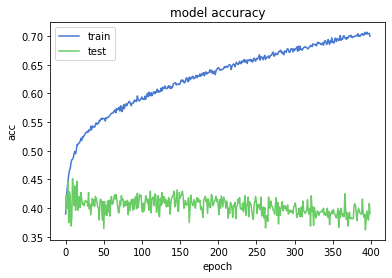

In [188]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [189]:
#save model
model_name = 'female_7_10_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ioann\saved_models\female_7_10_Model.h5 


In [190]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [191]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/Users/ioann/saved_models/female_7_10_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 39.06%


In [127]:
male_df=(all_df.loc[all_df['gender'] != 'F'])

male_df=male_df.fillna(0)
male_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,p,M,01.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,p,M,03.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,p,M,05.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,p,M,07.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,p,M,09.wav
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,0.409593,-0.970139,-0.998077,-0.801911,-1.194514,-1.572553,-0.679407,p,M,11.wav
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,0.218809,0.430849,0.554459,-0.558221,-1.556306,-1.882601,-0.562863,p,M,13.wav
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,-0.381267,-0.498064,0.580211,-0.288043,1.125915,0.291572,0.333098,p,M,15.wav
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,-0.431788,-0.993862,-1.745499,-0.998088,-1.758631,-1.363380,-2.398707,p,M,17.wav
18,-723.215910,80.465438,8.933278,21.701921,4.516072,10.858137,1.185063,0.157663,-8.158168,3.154788,...,1.425363,-0.862558,1.228814,-0.960936,-2.644739,-2.159275,-0.943426,p,M,19.wav


In [128]:
female_df=(all_df.loc[all_df['gender'] != 'M'])

female_df=female_df.fillna(0)
female_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
1,-653.169017,58.028073,-12.581209,11.818785,-7.681562,-0.617142,-8.337758,-5.823571,-6.547591,1.458057,...,3.708506,2.790020,2.201920,-1.021457,0.819200,-0.277811,0.207586,p,F,02.wav
3,-698.721214,47.088487,-11.333611,12.963090,-8.005652,-1.252229,-10.009068,-9.434125,-10.318875,-0.864674,...,0.958173,2.574661,1.877765,1.608618,0.222401,4.338524,4.266795,p,F,04.wav
5,-739.440873,55.755429,-23.246592,13.280397,-3.838021,-5.957225,-12.653000,-6.214706,-10.689208,3.398455,...,5.363243,4.332376,3.667531,1.550318,-0.558750,1.737009,3.253290,p,F,06.wav
7,-692.393582,68.048347,3.857427,26.590947,2.598323,6.667670,1.640871,-4.939541,-1.004390,1.792656,...,5.605745,5.896914,5.154771,4.143033,5.628289,4.912781,4.313900,p,F,08.wav
9,-574.430922,56.297725,-3.995249,9.307219,0.660650,0.722855,-10.766332,-3.891049,-7.494775,1.972640,...,3.372160,5.965045,2.542946,2.380176,1.891932,1.244445,3.589855,p,F,10.wav
11,-686.793732,63.759015,-5.019265,14.655203,-2.392172,-0.812546,-5.175949,-6.032188,-13.602619,-1.257705,...,4.932687,5.131727,3.666039,4.504458,1.554605,0.302437,-2.583656,p,F,12.wav
13,-765.338586,47.169830,1.476838,15.077700,-10.482029,-1.461810,-8.149069,-4.225049,-7.926242,0.051971,...,0.504372,1.259402,2.089944,3.679059,2.809832,1.927483,1.177062,p,F,14.wav
15,-663.830633,61.380003,2.275193,12.700737,-4.215593,-4.703434,-11.695962,-3.269569,-8.981364,-0.019918,...,-0.209263,-0.497776,0.500730,1.943027,2.300725,2.240043,1.939023,p,F,16.wav
17,-754.981614,59.807533,0.850680,15.180320,-4.610334,-0.571079,-6.452572,-9.619606,-11.002419,2.098613,...,-1.853533,-1.035654,0.965440,4.182645,7.387866,10.678265,10.405077,p,F,18.wav
19,-719.650165,40.265067,-10.677992,12.497934,-10.565180,-2.727621,-11.100496,-7.746538,-8.434710,-1.384802,...,2.236037,2.297235,3.286657,2.094471,1.377533,-1.344257,-1.004930,p,F,20.wav


In [176]:
test=(female_df.loc[female_df['session'] == 'Ses01'])
test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-509.126997,181.965860,-48.599549,31.576114,32.012172,-21.222346,18.036352,4.219425,-12.454106,13.210400,...,1.556140,5.038047,2.334538,2.539351,5.077994,1.888022,0.402842,p,F,Ses01
1,-516.757101,166.037926,-13.698110,7.455778,24.127481,-5.943733,8.448324,6.310700,-8.912027,6.515647,...,-1.689963,-0.042121,2.508860,2.382482,2.270472,0.708341,-1.324735,p,F,Ses01
2,-535.808389,197.637881,-35.971572,16.028582,27.252961,-17.289227,12.078187,6.596235,-9.104317,9.304528,...,-0.231600,2.007883,1.608188,2.511622,3.101419,-0.276906,-1.303641,p,F,Ses01
3,-499.505437,173.583604,-26.196286,18.929305,35.394134,-10.336557,5.948212,3.568846,-12.046869,7.196558,...,0.806051,1.458800,3.587927,3.186033,1.861609,-0.167564,-0.764474,oth,F,Ses01
4,-430.813999,159.862295,-15.155569,11.889576,36.357437,1.025977,0.410147,-2.455916,-13.638808,-3.154461,...,1.396090,0.352647,0.841803,2.117443,2.855314,1.949633,1.237270,oth,F,Ses01
5,-386.503557,153.880057,-8.654504,11.462919,17.005921,-13.288454,3.486613,2.020962,-12.496160,-4.236066,...,1.138751,2.050575,1.679837,1.086065,1.729483,1.243465,1.516248,p,F,Ses01
6,-338.679136,167.576578,-23.725968,-4.789725,25.580598,-6.741570,-4.581353,2.351062,-8.508468,-5.835905,...,0.781537,2.358782,3.684598,3.777222,3.235100,1.707252,1.858535,n,F,Ses01
7,-411.708022,166.322311,-27.537525,5.647182,26.333488,-7.406942,5.228053,0.618157,-13.344606,0.691763,...,-0.830246,0.461917,0.633769,0.435840,0.628173,0.029110,-0.212034,n,F,Ses01
8,-364.805749,181.675440,-37.499601,5.804351,33.771206,-14.981616,-6.293604,2.465651,-8.561474,-1.129350,...,-3.290352,-0.378126,0.940950,1.865115,1.188642,-0.756106,0.850033,n,F,Ses01
9,-438.489636,160.395622,-24.566140,4.215405,23.486020,-8.647269,5.627794,4.042671,-10.475144,3.386079,...,-0.594847,0.921930,2.700348,3.346706,1.956133,0.429507,1.637339,n,F,Ses01


In [177]:
train_1=(female_df.loc[female_df['session']!='Ses01'])
train=pd.concat([male_df, train_1], axis=0)
train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,label,gender,session
0,-700.398878,58.630210,-3.025852,16.040243,4.248529,3.869935,-6.381717,-0.188634,-13.735003,-0.319723,...,-2.522663,-2.507449,-2.250499,-0.381507,-2.481059,-2.791022,-2.244866,p,M,01.wav
2,-617.052327,60.103365,-5.984258,13.886286,1.120427,0.511750,-14.841357,-4.016369,-5.575839,-6.309851,...,0.331097,0.531833,-1.621018,-2.158077,-2.502774,-0.676132,2.089097,p,M,03.wav
4,-715.922663,71.976798,4.457525,18.602500,8.404048,3.621956,-1.974365,0.022674,-2.678083,4.232804,...,0.210004,0.667769,1.918957,0.174543,-1.768463,-1.512281,-0.253280,p,M,05.wav
6,-653.982540,77.230163,1.074312,23.132712,5.029030,2.561855,-10.727559,-3.295055,-1.869739,-0.463441,...,-1.358684,-2.281433,-3.152291,-5.220386,-3.469335,-1.696725,-0.342364,p,M,07.wav
8,-741.353967,96.758128,16.994427,37.401855,17.461665,14.264806,1.034319,9.790047,3.433929,9.897499,...,0.077569,1.954016,0.924915,-0.342838,-1.029033,-1.741040,-0.339235,p,M,09.wav
10,-734.559104,66.724170,19.973302,24.432135,8.267443,10.193674,3.384751,5.832733,-2.836397,4.247270,...,0.409593,-0.970139,-0.998077,-0.801911,-1.194514,-1.572553,-0.679407,p,M,11.wav
12,-737.222784,68.615129,-0.249202,14.366146,6.971780,4.769932,-3.964833,0.740859,-6.925254,3.283133,...,0.218809,0.430849,0.554459,-0.558221,-1.556306,-1.882601,-0.562863,p,M,13.wav
14,-638.686598,72.511378,-5.997497,15.943515,7.175803,1.197456,-1.932479,1.161894,-6.393956,1.198193,...,-0.381267,-0.498064,0.580211,-0.288043,1.125915,0.291572,0.333098,p,M,15.wav
16,-646.566034,78.240240,5.812849,23.272988,13.461742,11.165088,6.540210,-2.067871,-7.179390,9.426169,...,-0.431788,-0.993862,-1.745499,-0.998088,-1.758631,-1.363380,-2.398707,p,M,17.wav
18,-723.215910,80.465438,8.933278,21.701921,4.516072,10.858137,1.185063,0.157663,-8.158168,3.154788,...,1.425363,-0.862558,1.228814,-0.960936,-2.644739,-2.159275,-0.943426,p,M,19.wav


In [192]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

873/873 [==============================] - ETA:  - ETA:  - 0s 244us/step


In [193]:
preds1=preds.argmax(axis=1)
preds1

array([2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

In [194]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

In [195]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,p
1,n
2,p
3,p
4,p
5,n
6,n
7,oth
8,n
9,n


In [196]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [197]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,p
1,p
2,p
3,oth
4,oth
5,p
6,n
7,n
8,n
9,n


In [198]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,p,p
1,p,n
2,p,p
3,oth,p
4,oth,p
5,p,n
6,n,n
7,n,oth
8,n,n
9,n,n


In [199]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(actualvalues, predictions)

array([[146,  50, 141],
       [ 78,  27, 113],
       [106,  44, 168]], dtype=int64)

In [200]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
n,337
oth,218
p,318


In [201]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
n,330
oth,121
p,422


In [202]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [203]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

39.06071019473082

In [204]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[146,  50, 141],
       [ 78,  27, 113],
       [106,  44, 168]], dtype=int64)

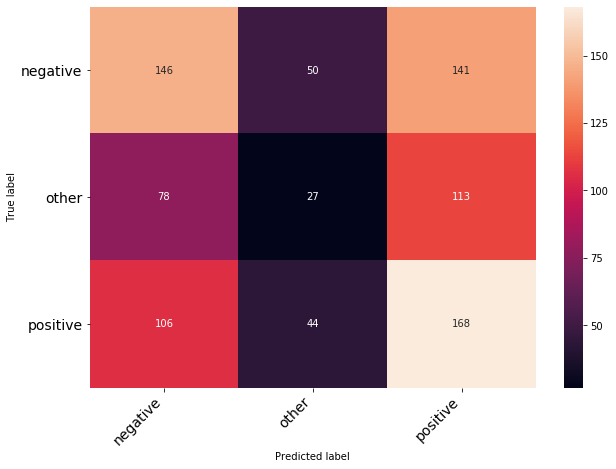

In [205]:
import seaborn as sns;
class_names = ["negative", "other", "positive"]


print_confusion_matrix( c , class_names)